In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 19 21:30:00 2023

@author: ugoob
"""

#!/usr/bin/tufts_env python
"""
--------------------------------------------------------------------------
Created November 20, 2023 for GESP-Py library
"""
__author__ = "Ugochukwu O. Ugwu"
__copyright__ = "Copyright 2023, GESP-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Ugochukwu O. Ugwu"
__email__ = "Ugochukwu.Ugwu@tufts.edu; uugobinnah@gmail.com"

%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,balanced_accuracy_score
import random
from sklearn import svm
from kneefinder import KneeFinder
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from gsvp_py.solvers.gsvp import *
from gsvp_py.solvers.Qplot_feat_jacc_acc import *
from gsvp_py.solvers.features import *
from gsvp_py.solvers.metric import computeavgjac
from gsvp_py.solvers.classifiers import OutputAcc, WNPSVMpredict,compute_spec_recall,myelbow
from gsvp_py.solvers.getting_data import getdata
from gsvp_py.solvers.metric import computeavgjac
from gsvp_py.solvers.classifiers import classification, test_model
from gsvp_py.solvers.features import top_features
from gsvp_py.solvers.plots import myelbow

Nothing done.


Generate Data: Running "generators" takes datasets stored in a folder, generates training, validation, and test data, and stores them in a specified folder

In [2]:
from gsvp_py.solvers.Storing_data import generators
generators()

Here, we use the Breast Cancer validation data to illustrate that truncating weights at the elbow points can result in either an increase or decrease in balanced accuracy. Note that 'npsvm' uses all the sparse weights while 'elb_npsvm' uses the sparse weights truncated at a suitably defined elbow point. We experiment with q = 0.1 and q = 1 for both cases. For the "elb_npsvm", the top features is union of features selected by both weights for a given truncation index.

elb_npsvm
q := 0.1
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       1  Breast Cancer   0.898354     0.989691  0.807018   0.978723   

   TN  FP  FN  TP  
0  96   1  11  46  


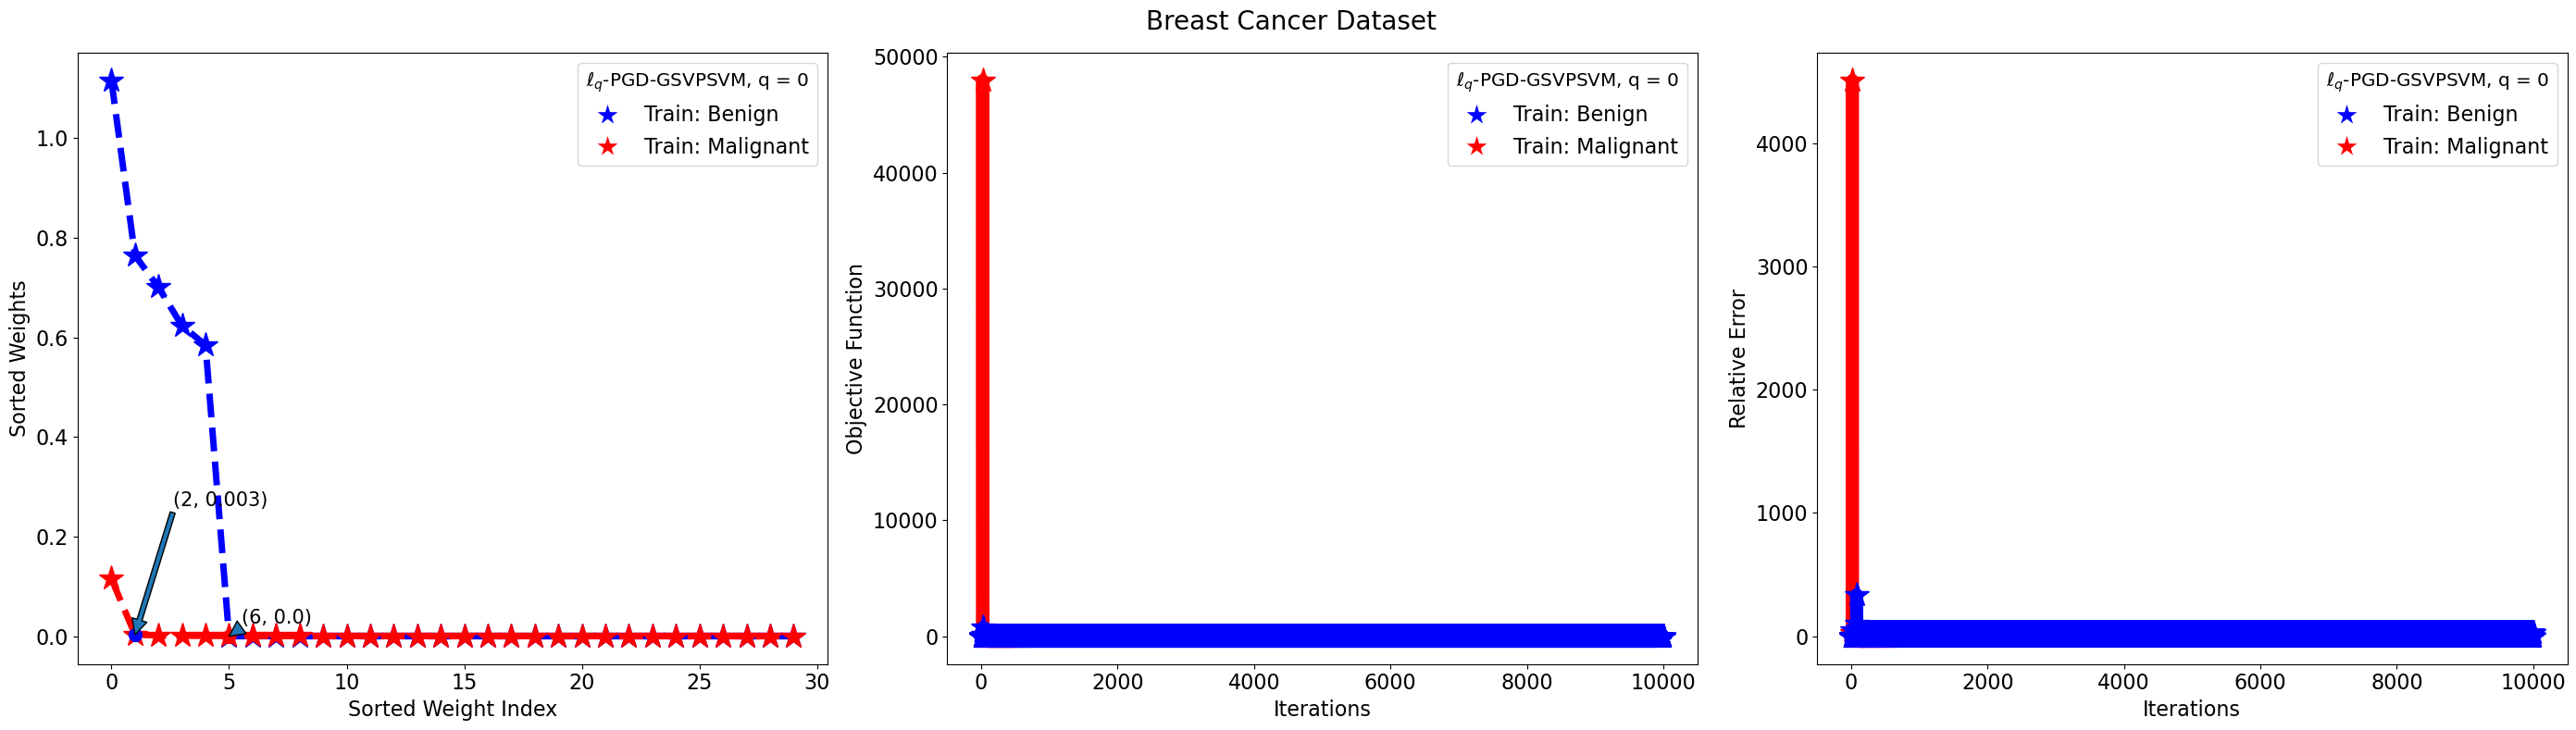

q := 1
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer   0.819407     0.989691  0.649123   0.973684   

   TN  FP  FN  TP  
0  96   1  20  37  


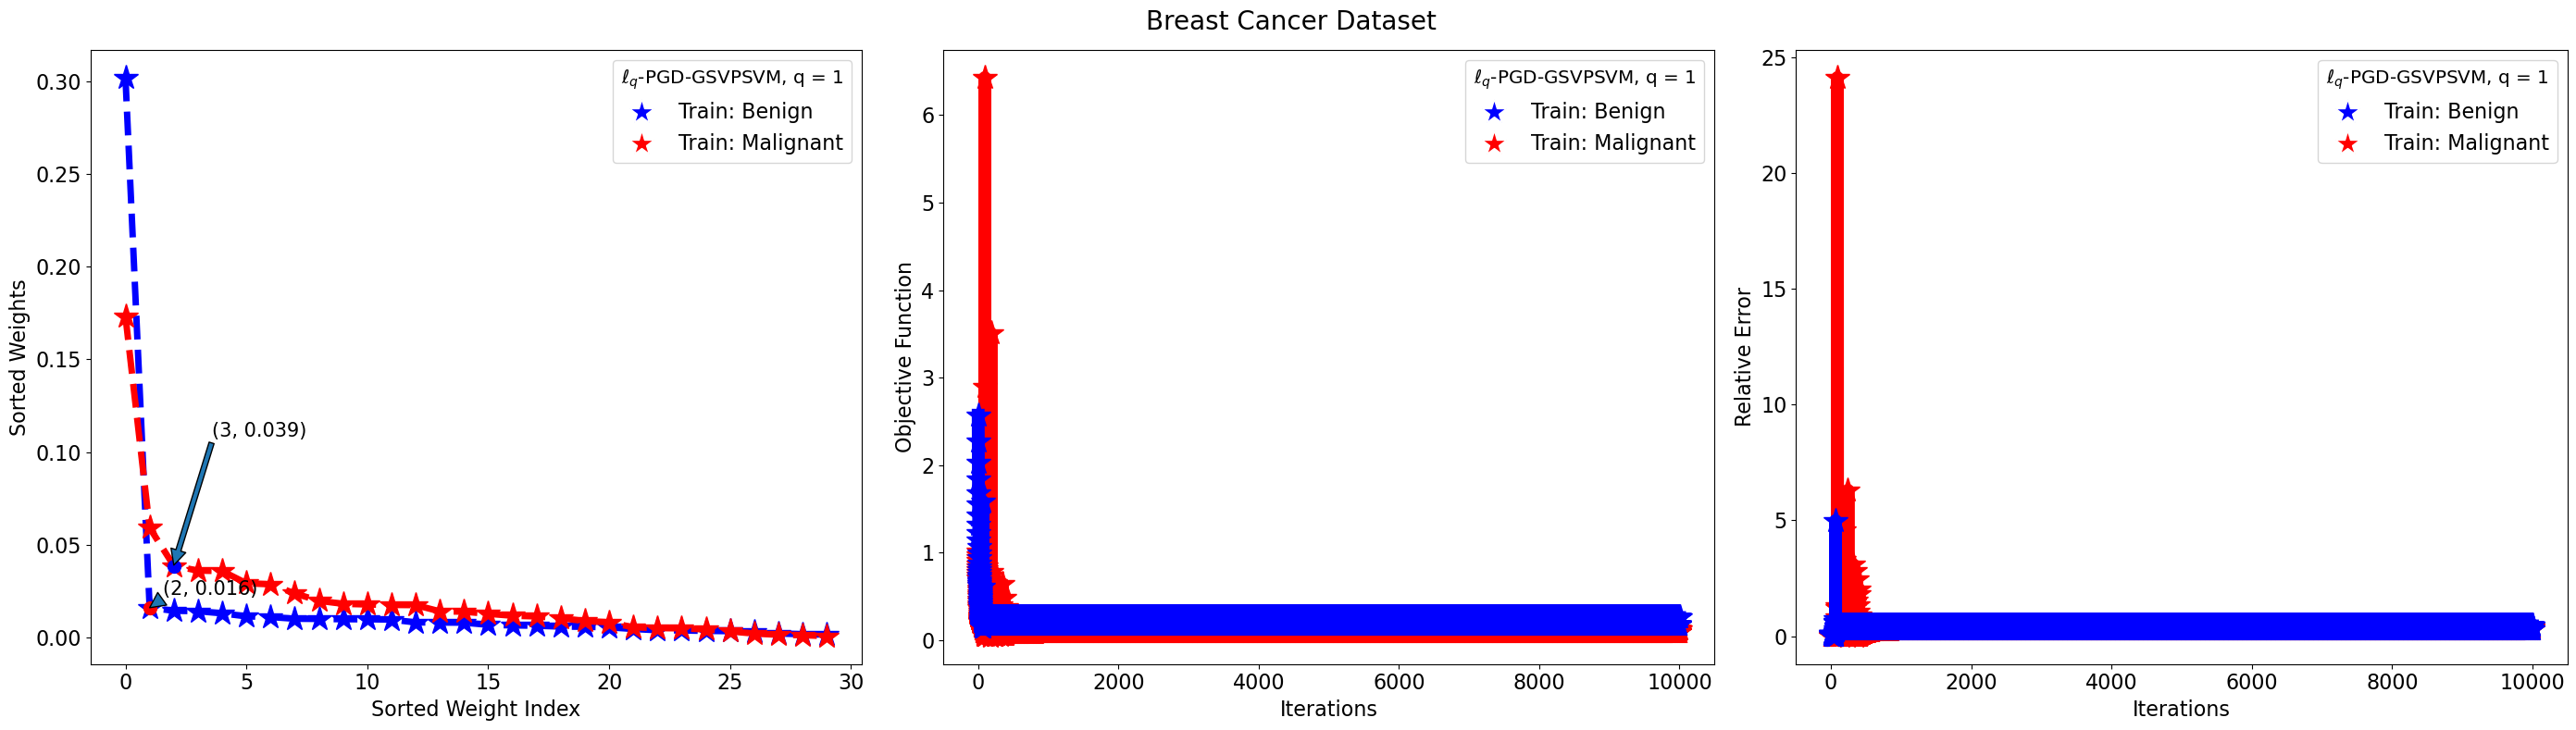

npsvm
q := 0.1
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       1  Breast Cancer   0.910743     0.979381  0.842105       0.96   

   TN  FP  FN  TP  
0  95   2   9  48  


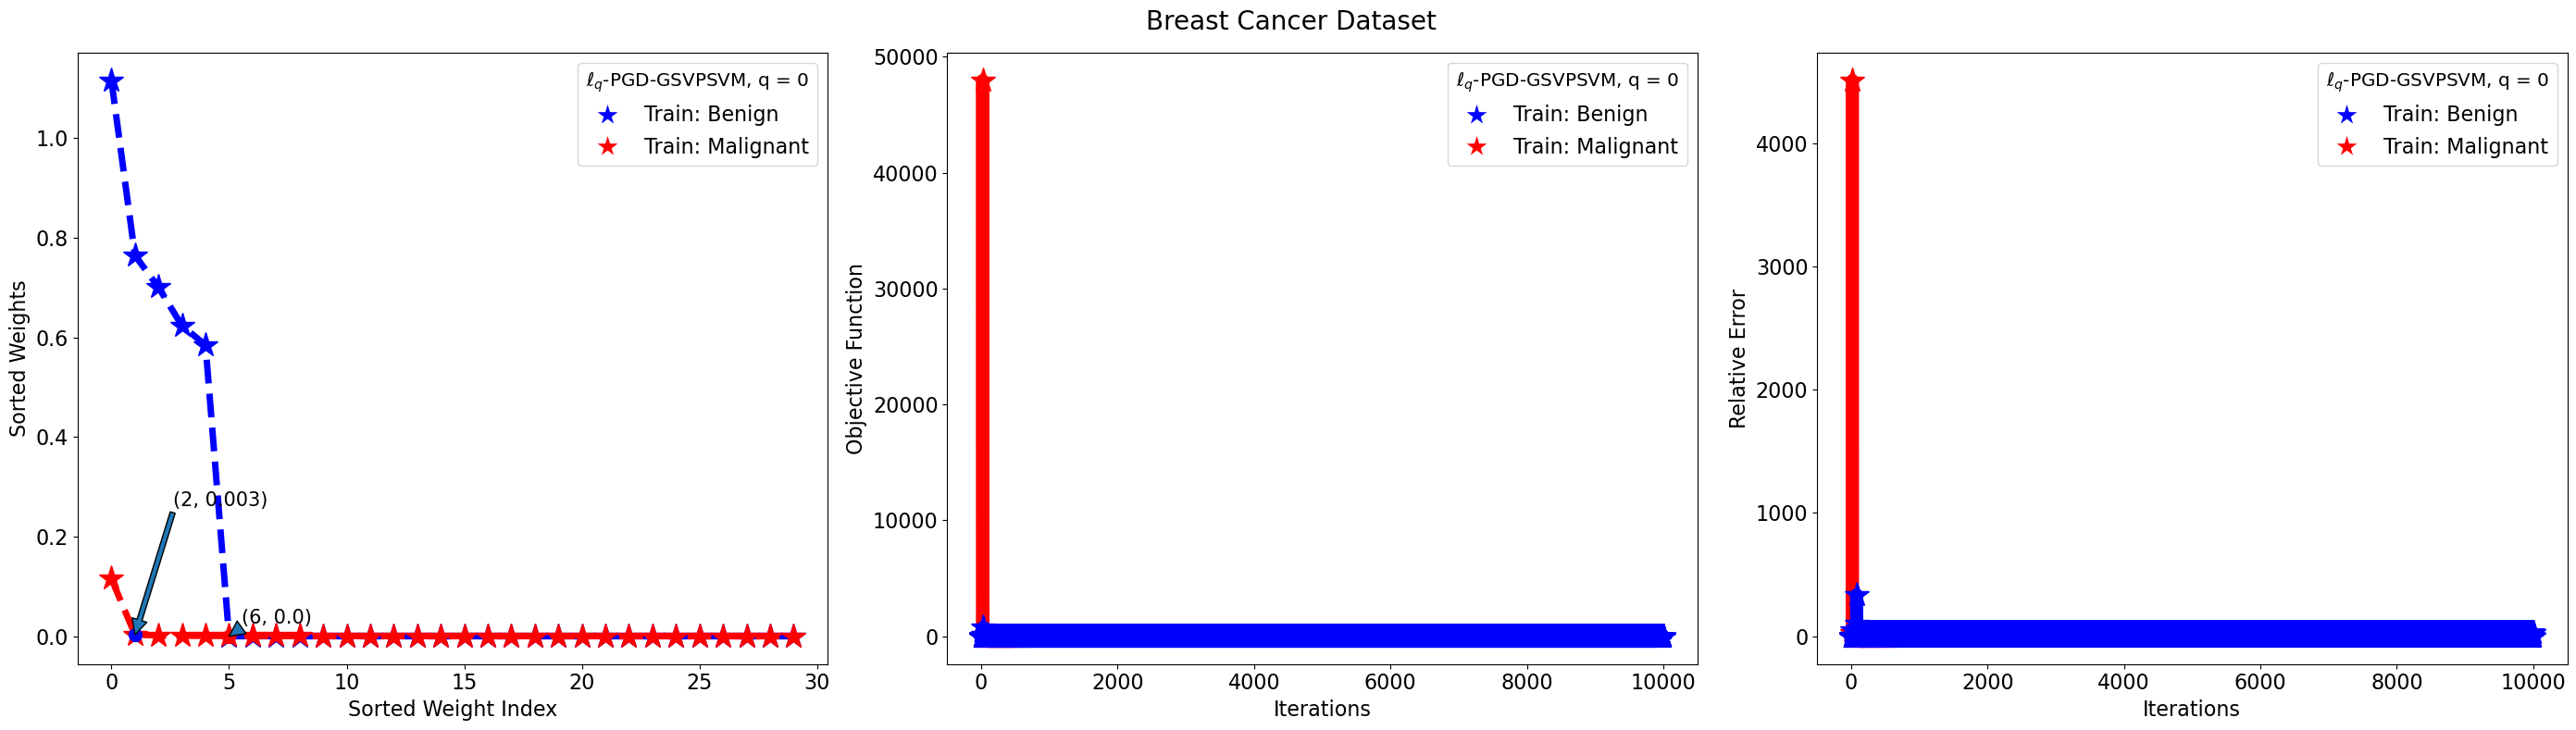

q := 1
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer    0.96853     0.989691  0.947368   0.981818   

   TN  FP  FN  TP  
0  96   1   3  54  


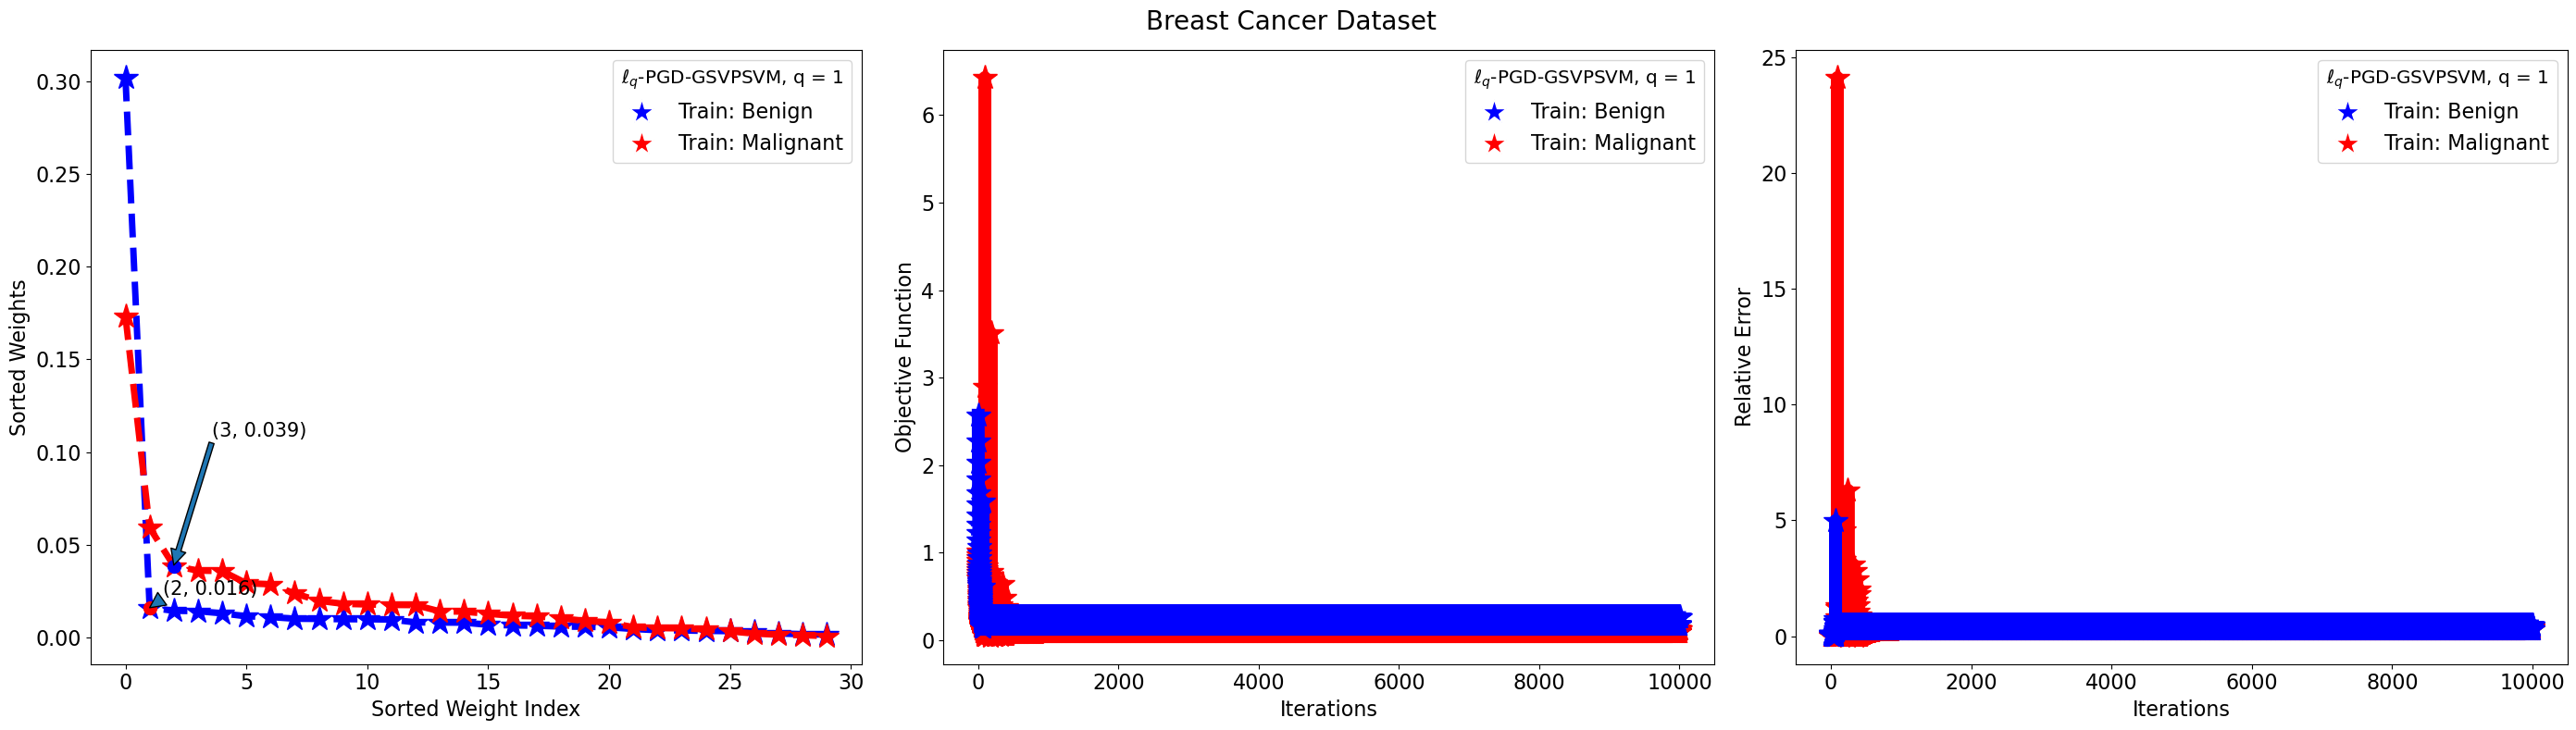

In [2]:
lambd = [(0.11120000000000001, 0.1112888888888889)]
step_size = [0.03162277660168379]
datum = ['Breast Cancer Dataset']
datra= ['Breast Cancer']
datum_list = ['breast_cancer']
listing = [{'x':'Benign','y':'Malignant'}]
var = ['elb_npsvm','npsvm']
q = [0.1,1]
for j in range(len(var)):
    print(var[j])
    for i in range(len(datum)):
        for qq in range(len(q)):
            print('q :=', q[qq])
            runs_list, _, _ = classification(datum[i], f'$\ell_q$-PGD-GSVPSVM, q = {qq}', var[j], 'lq1', lambd[i], 42, step_size[i], **{'q': qq, 'epsa': 10**(-2)})
            try:
                top_features(f'heading_{datum_list[i]}', runs_list,**listing[i])
            except FileNotFoundError:
                continue

Here, we examine the sensitivity of the solutions to $\epsilon$, for $q=0.1$ and $q=1$

elb_npsvm
q := 0.1
epsilon := 0.01
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       1  Breast Cancer   0.898354     0.989691  0.807018   0.978723   

   TN  FP  FN  TP  
0  96   1  11  46  


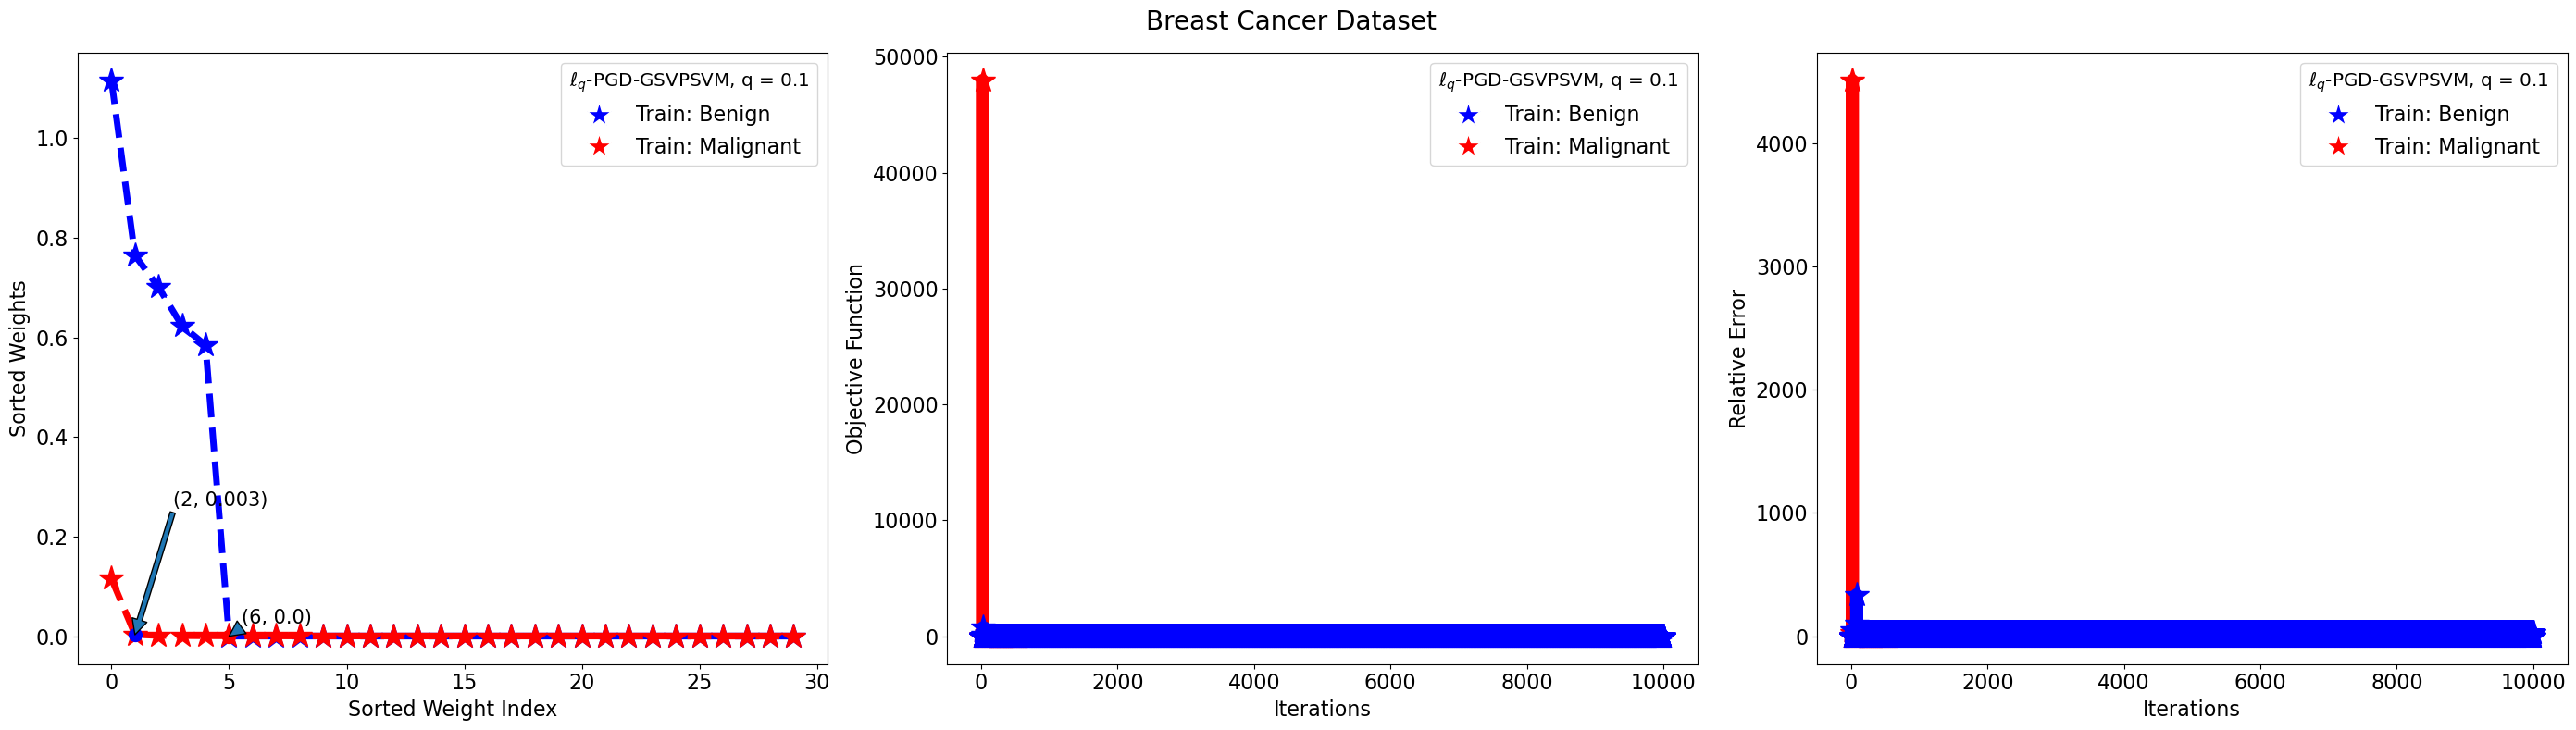

epsilon := 0.0031622776601683794
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer    0.80548     0.979381  0.631579   0.947368   

   TN  FP  FN  TP  
0  95   2  21  36  


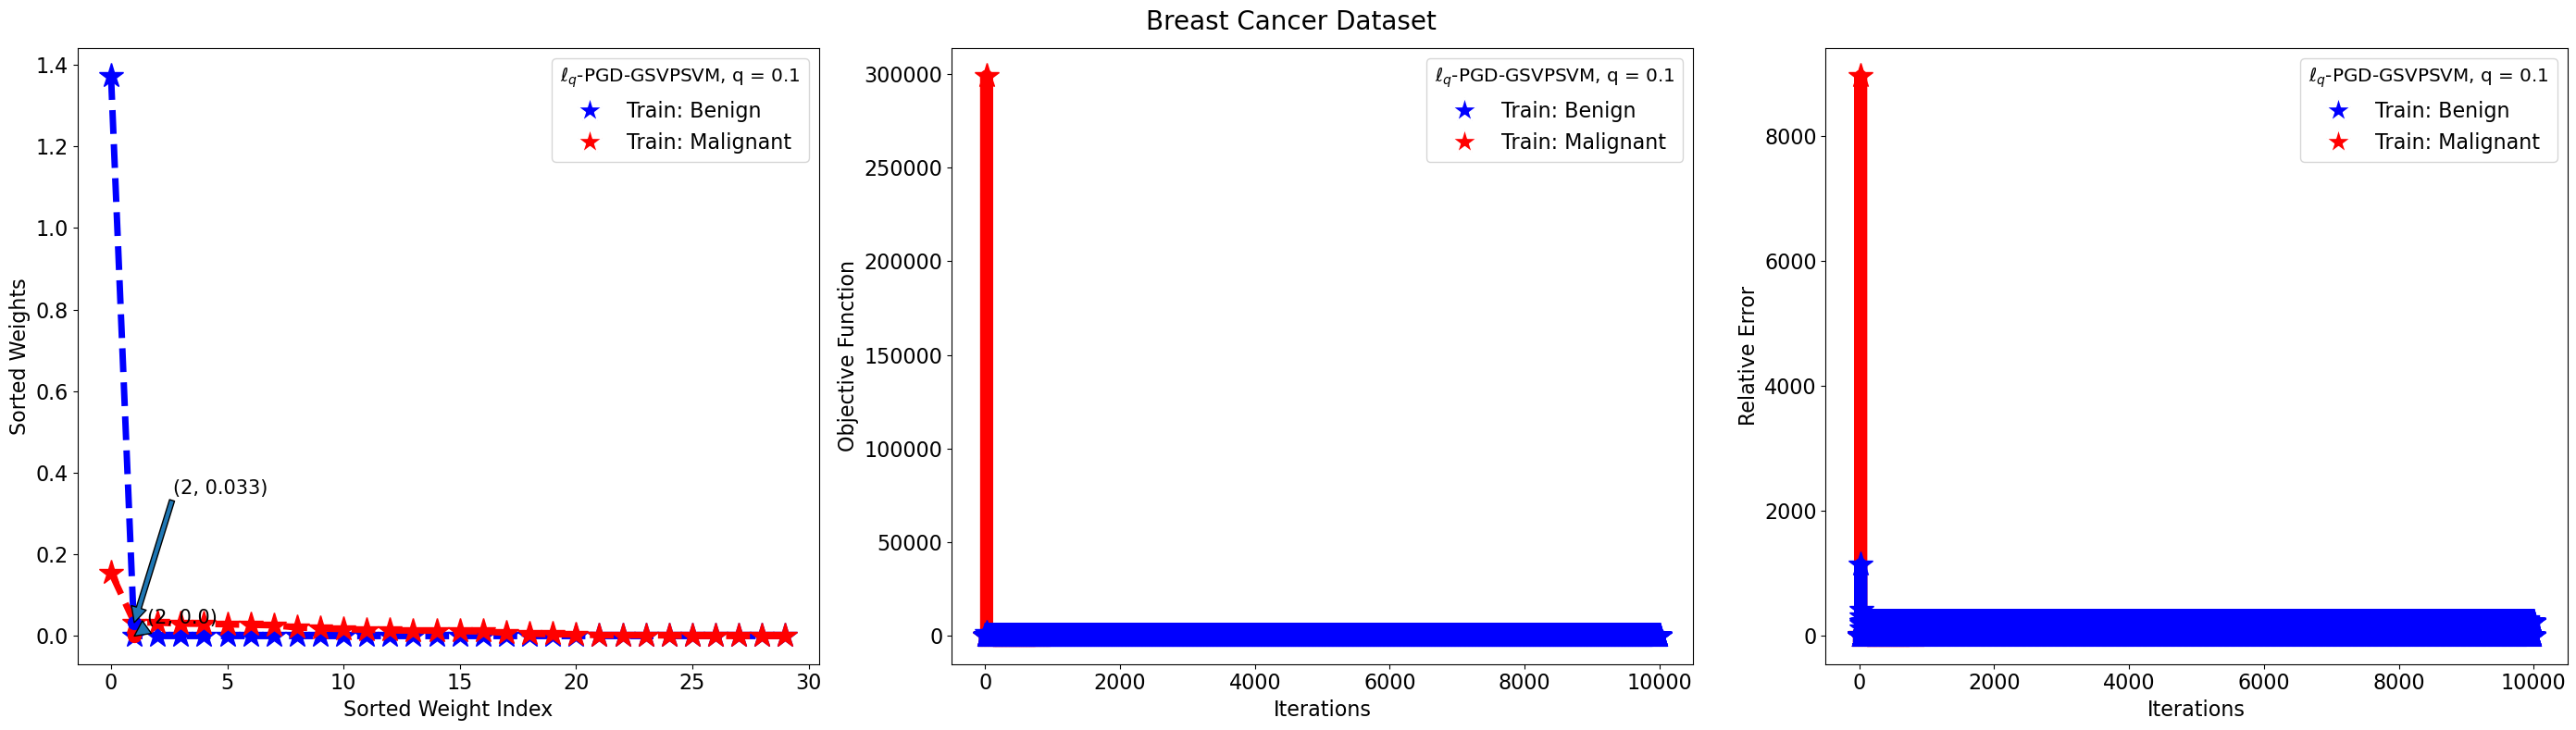

epsilon := 0.001
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       1  Breast Cancer   0.866884     0.979381  0.754386   0.955556   

   TN  FP  FN  TP  
0  95   2  14  43  


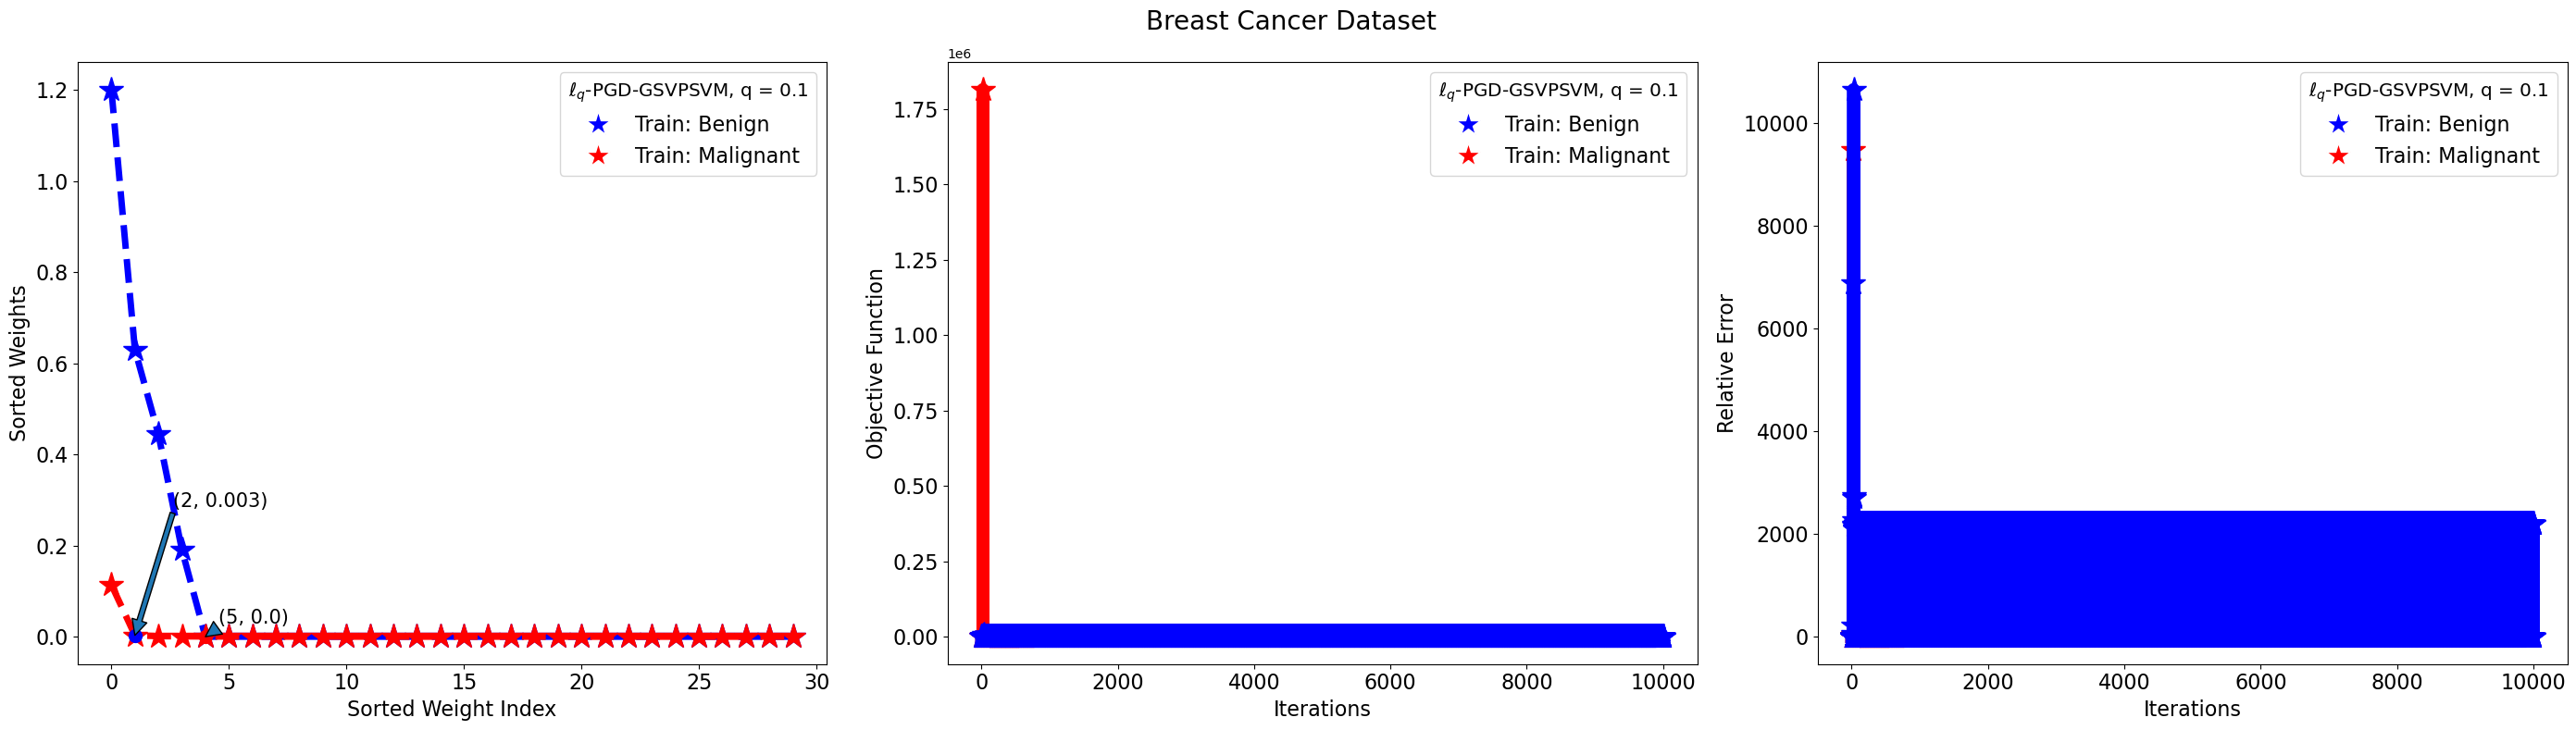

epsilon := 0.00031622776601683794
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer   0.891662     0.958763  0.824561   0.921569   

   TN  FP  FN  TP  
0  93   4  10  47  


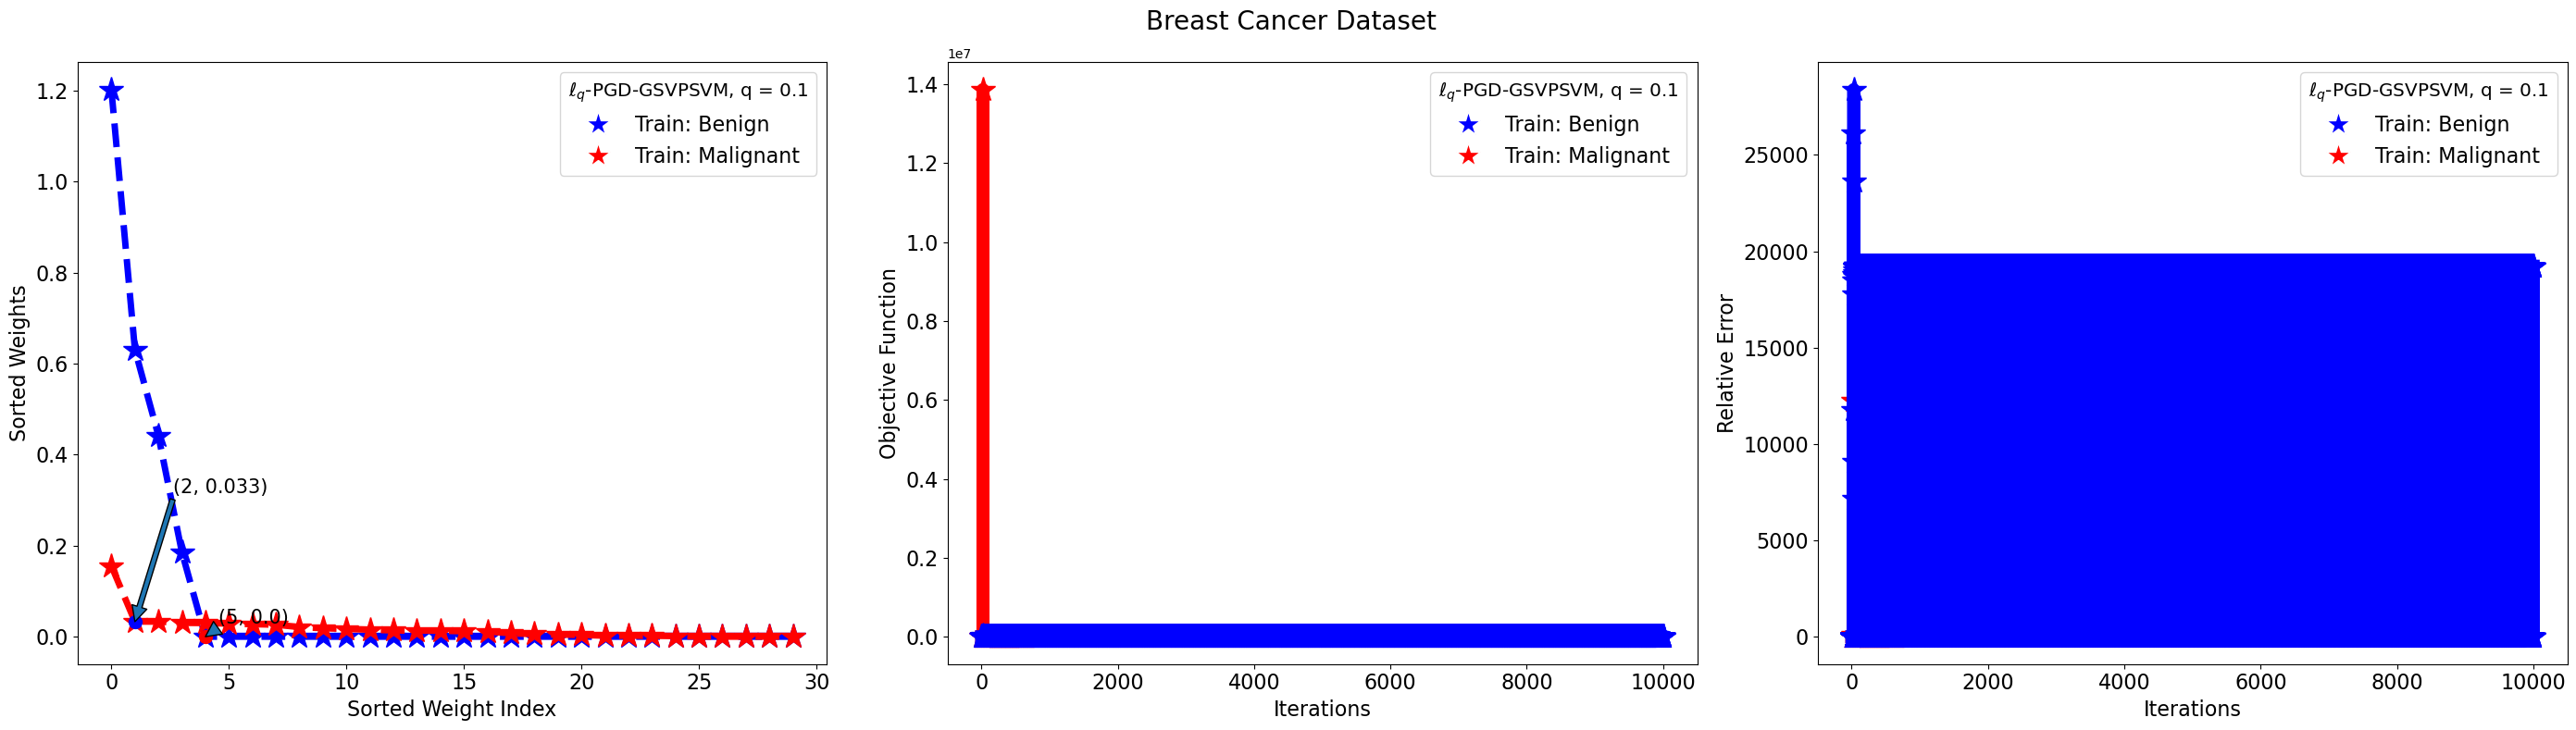

q := 1
epsilon := 0.01
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer   0.819407     0.989691  0.649123   0.973684   

   TN  FP  FN  TP  
0  96   1  20  37  


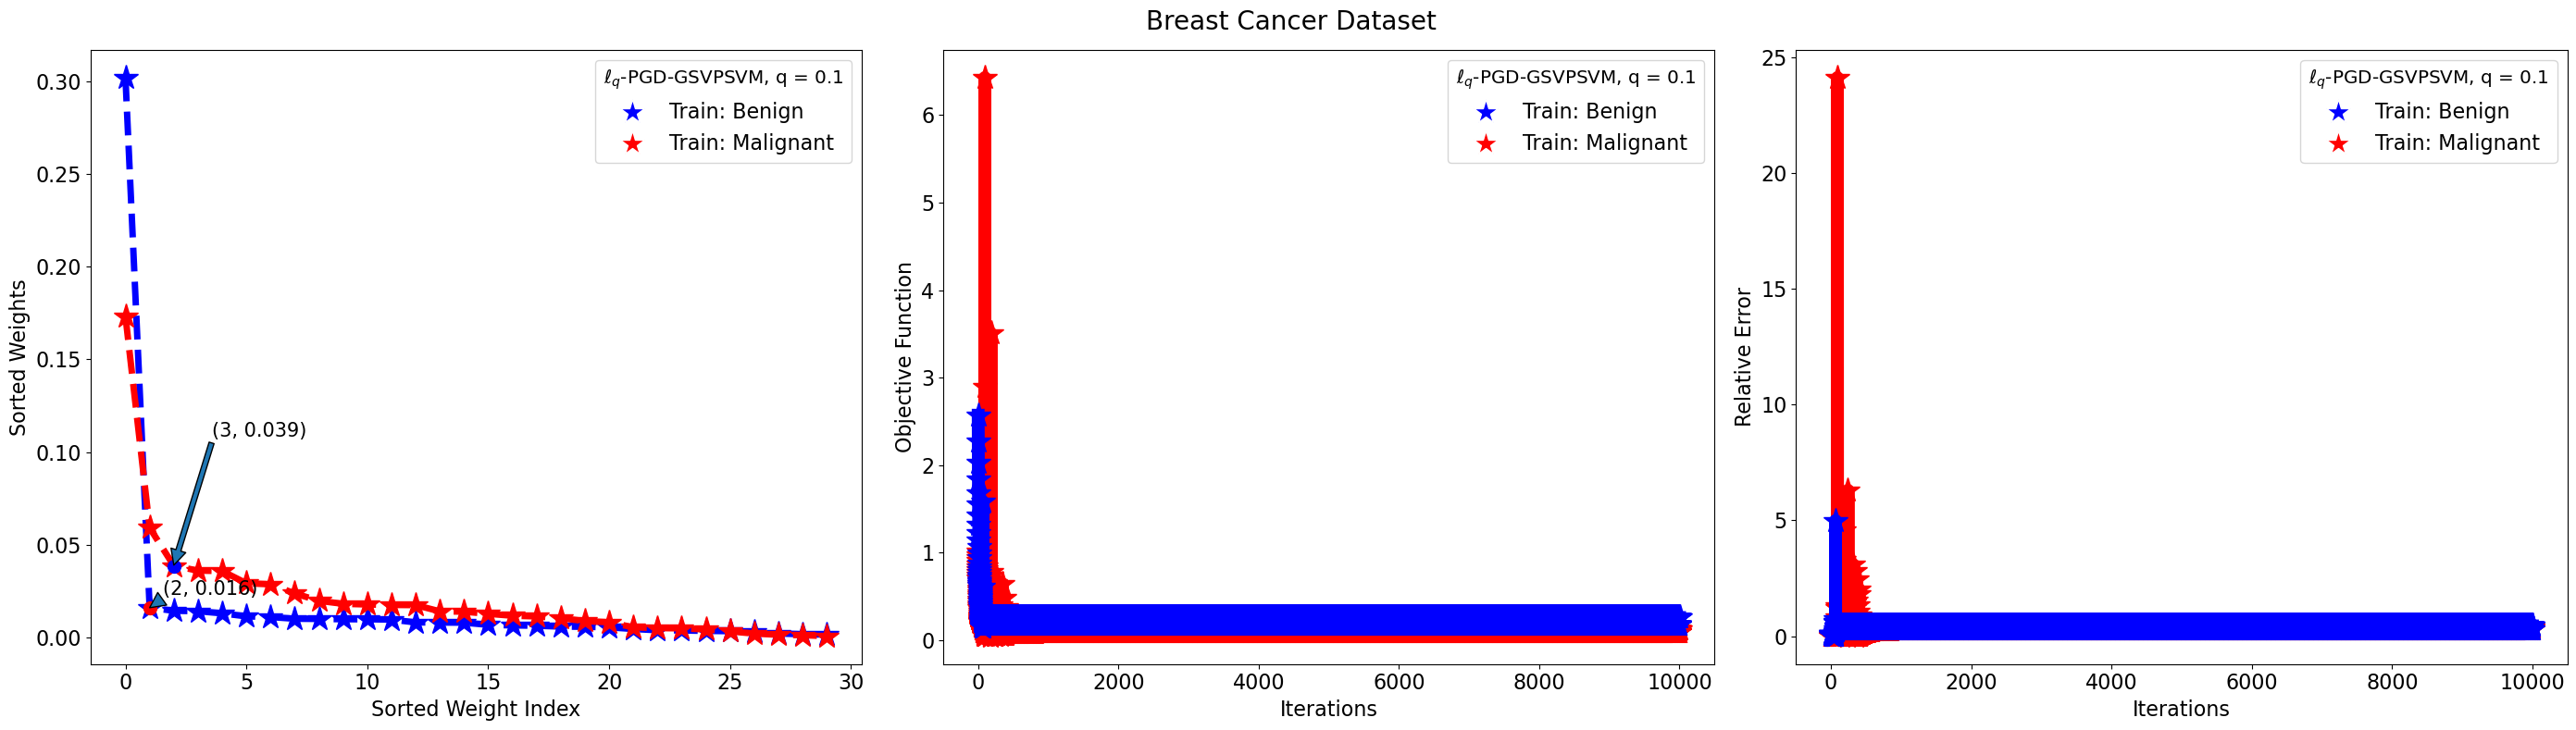

epsilon := 0.0031622776601683794
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer   0.791554     0.969072  0.614035   0.921053   

   TN  FP  FN  TP  
0  94   3  22  35  


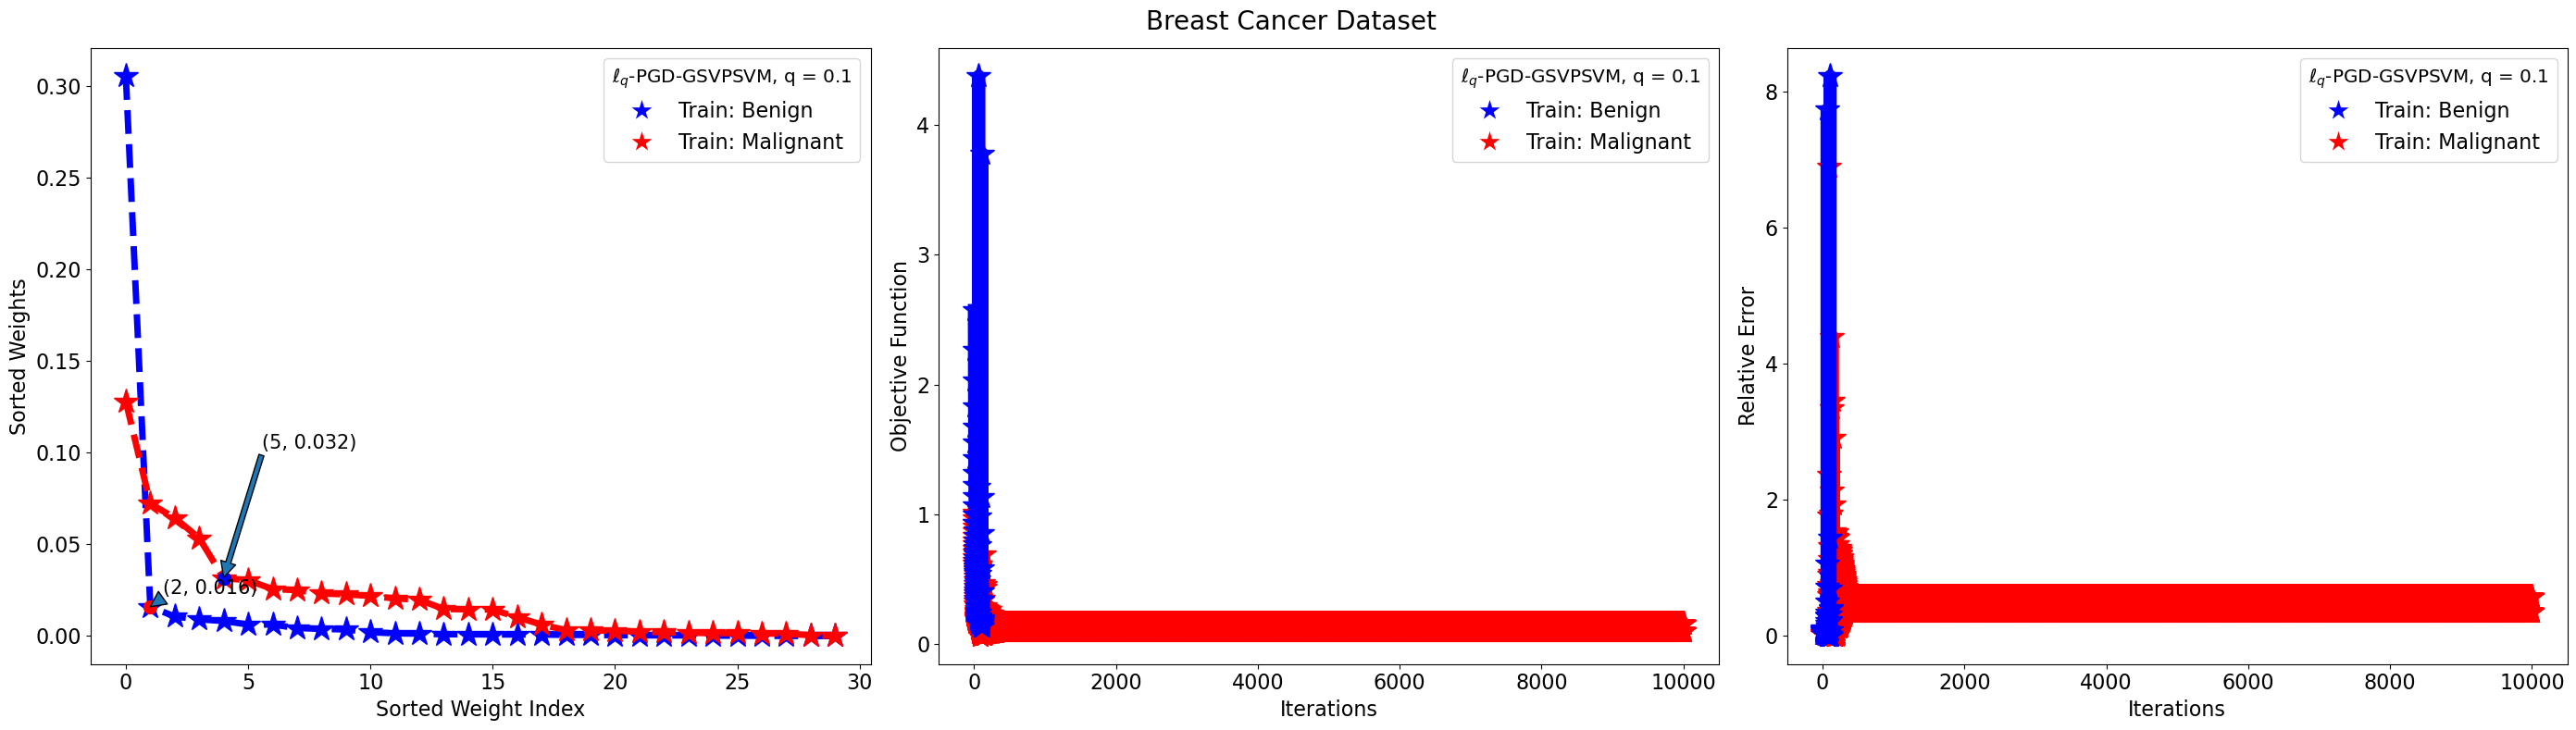

epsilon := 0.001
   Elbow  Common       Dataset   Bal. Acc.  Specificity   Recall  Precision  \
0      2       0  Breast Cancer   0.761621     0.979381  0.54386   0.939394   

   TN  FP  FN  TP  
0  95   2  26  31  


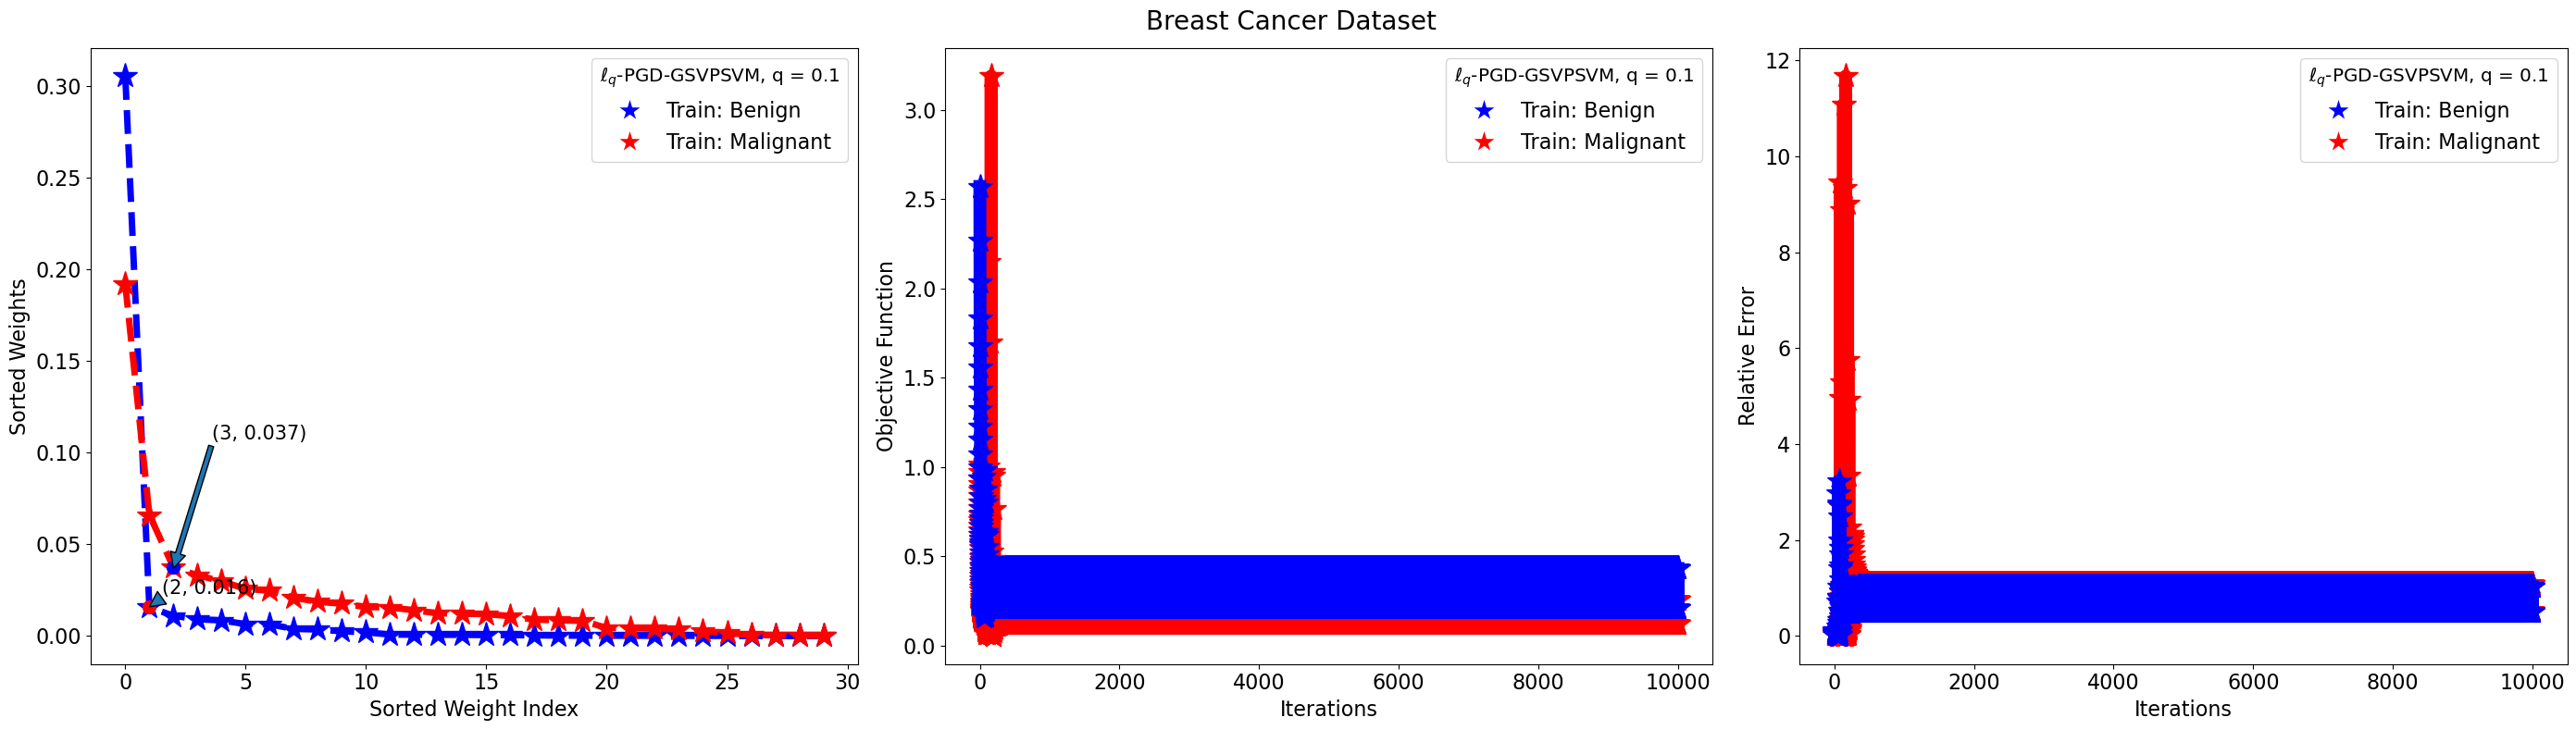

epsilon := 0.00031622776601683794
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer   0.836951     0.989691  0.684211      0.975   

   TN  FP  FN  TP  
0  96   1  18  39  


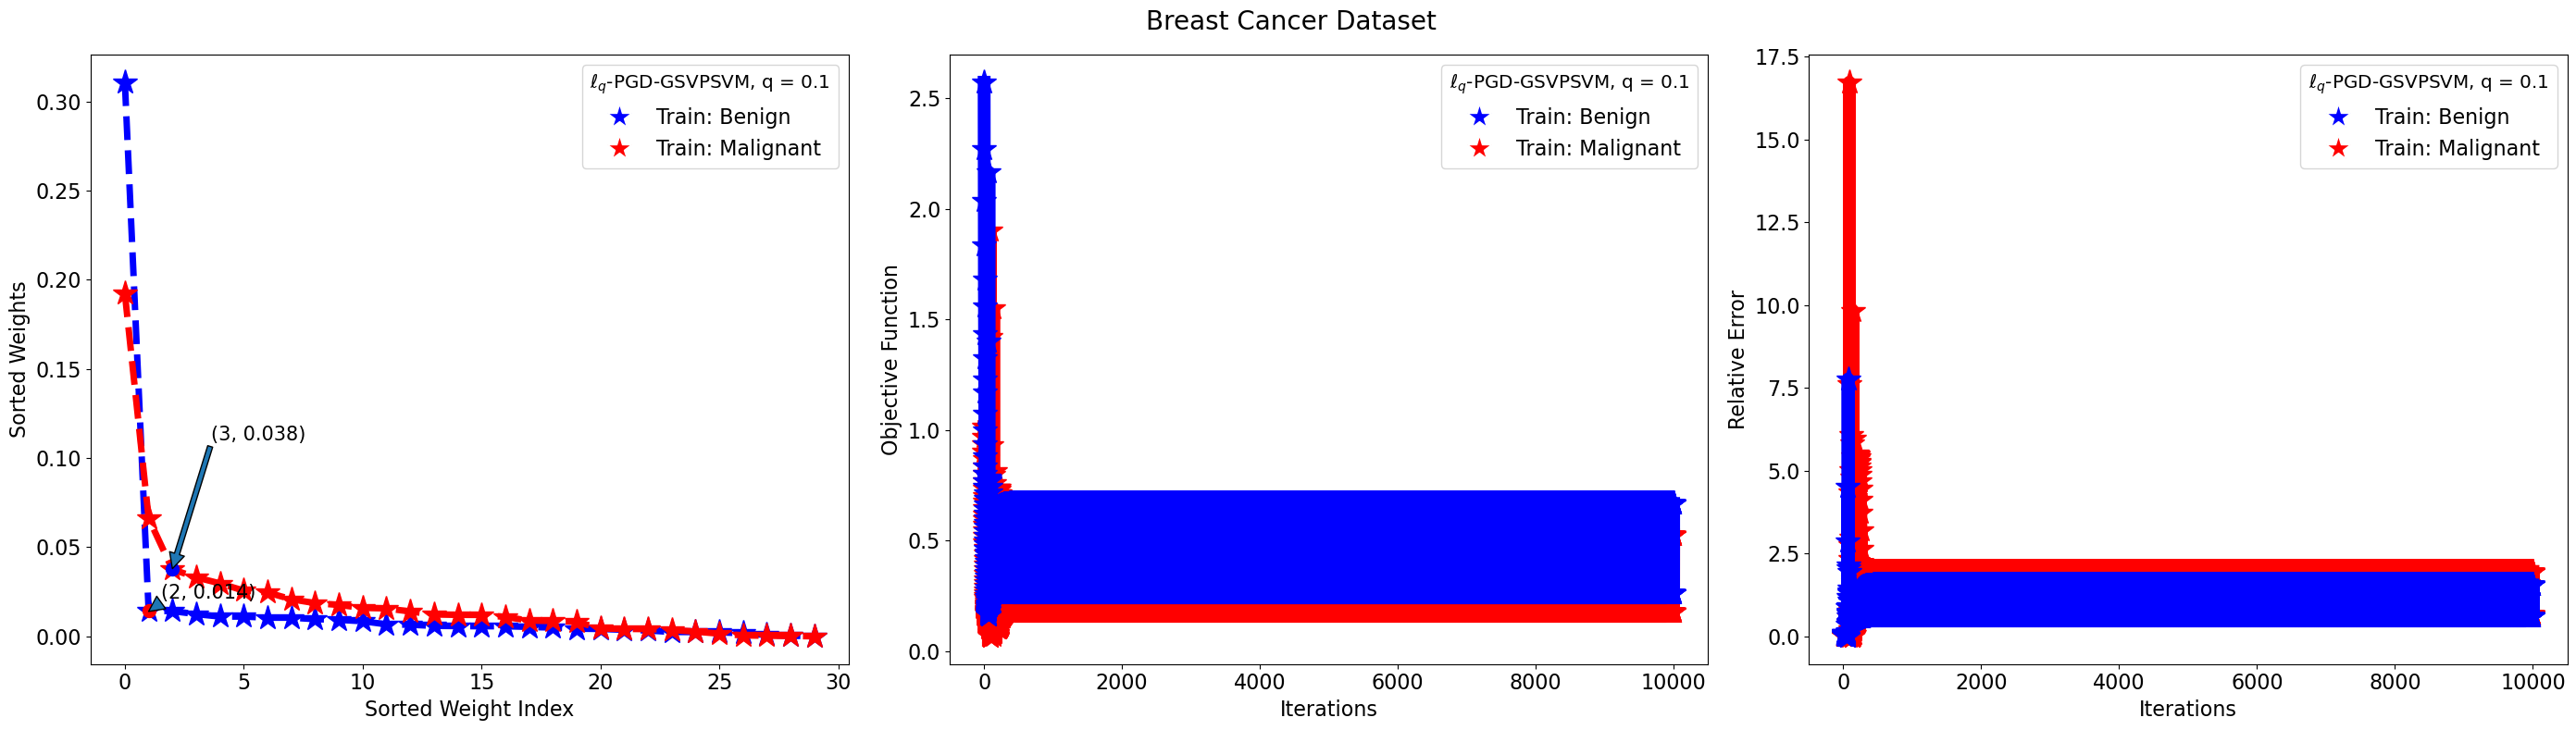

npsvm
q := 0.1
epsilon := 0.01
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       1  Breast Cancer   0.910743     0.979381  0.842105       0.96   

   TN  FP  FN  TP  
0  95   2   9  48  


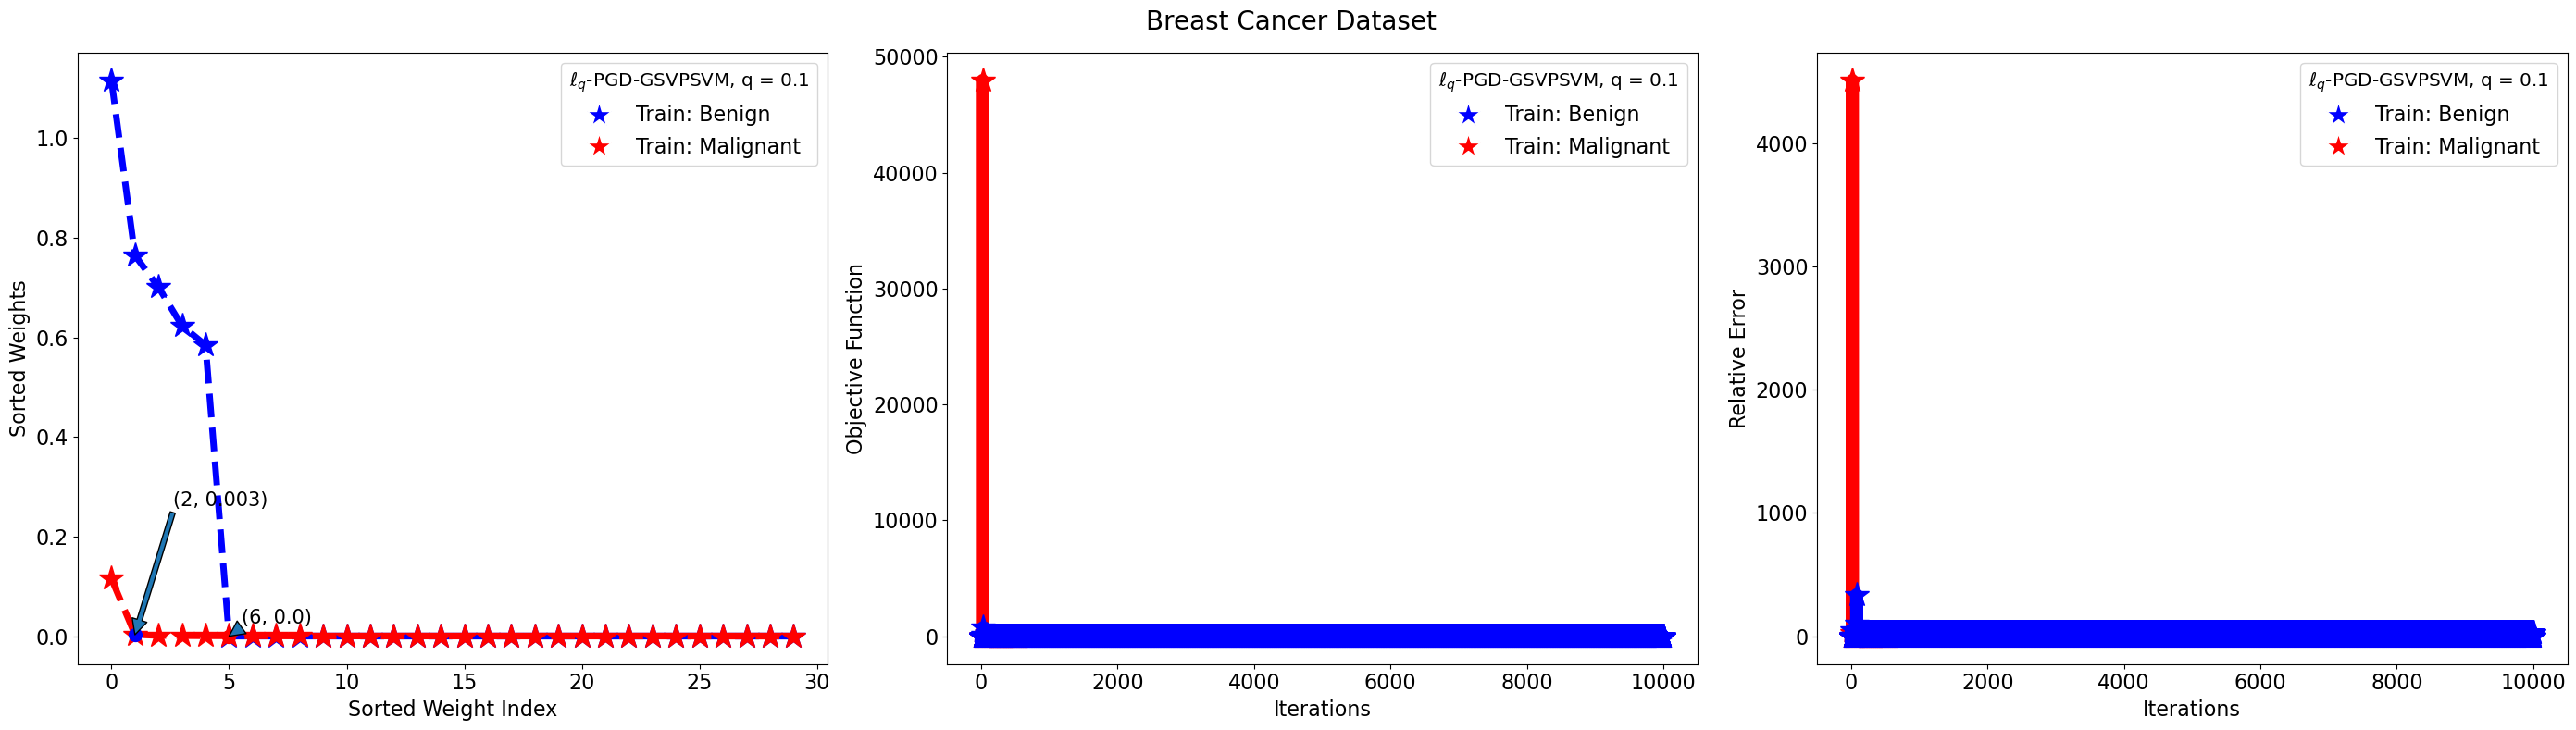

epsilon := 0.0031622776601683794
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer   0.905589     0.969072  0.842105   0.941176   

   TN  FP  FN  TP  
0  94   3   9  48  


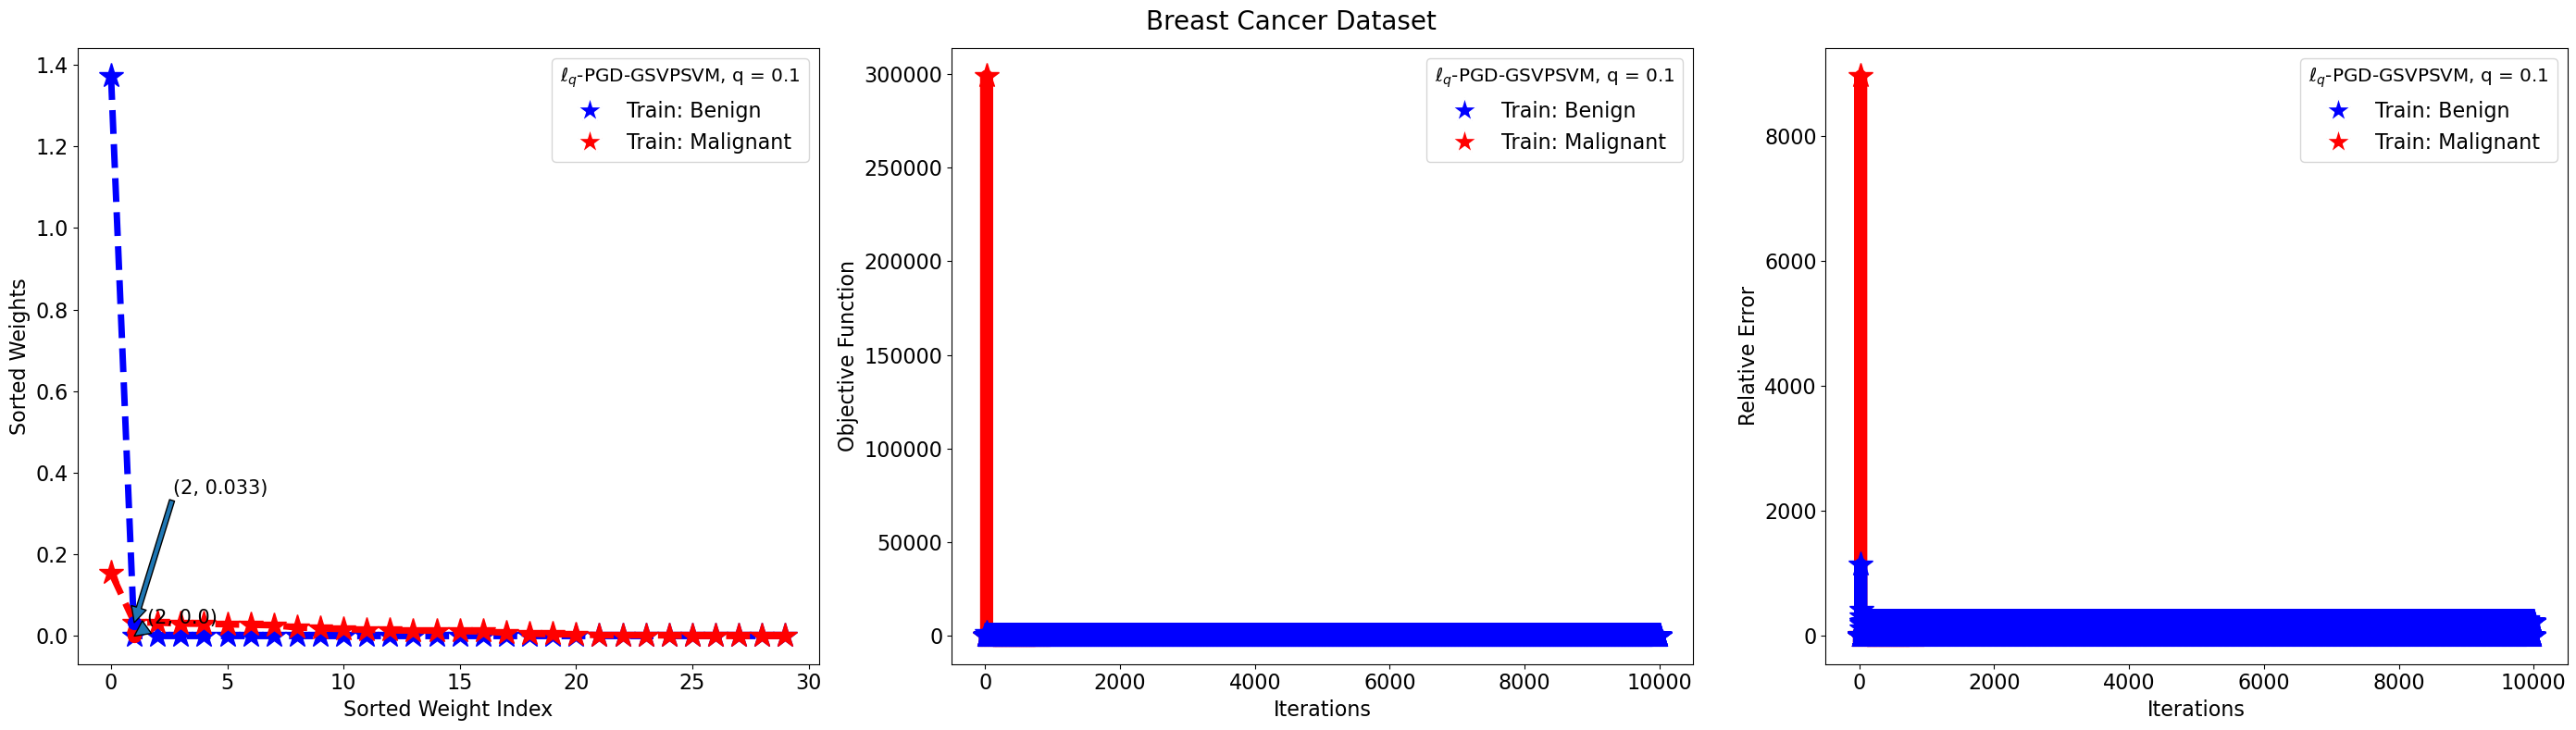

epsilon := 0.001
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       1  Breast Cancer   0.942214     0.989691  0.894737   0.980769   

   TN  FP  FN  TP  
0  96   1   6  51  


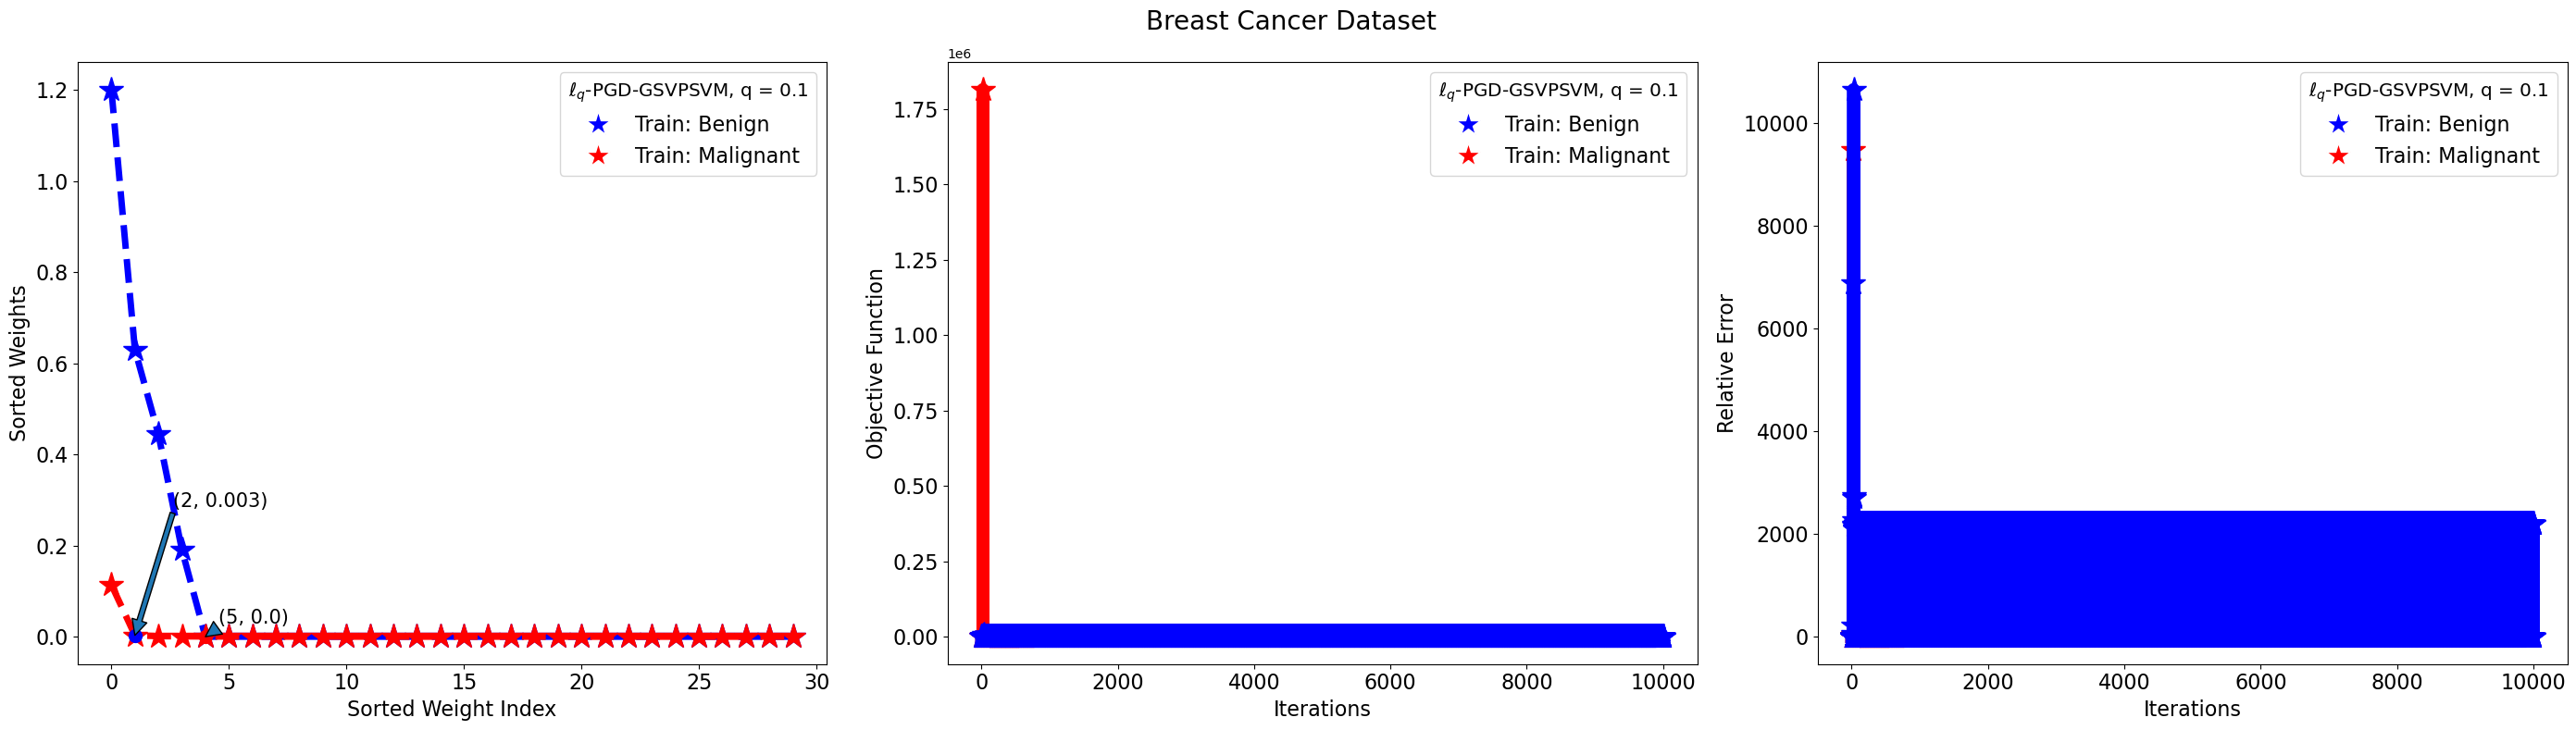

epsilon := 0.00031622776601683794
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer   0.916983     0.886598  0.947368   0.830769   

   TN  FP  FN  TP  
0  86  11   3  54  


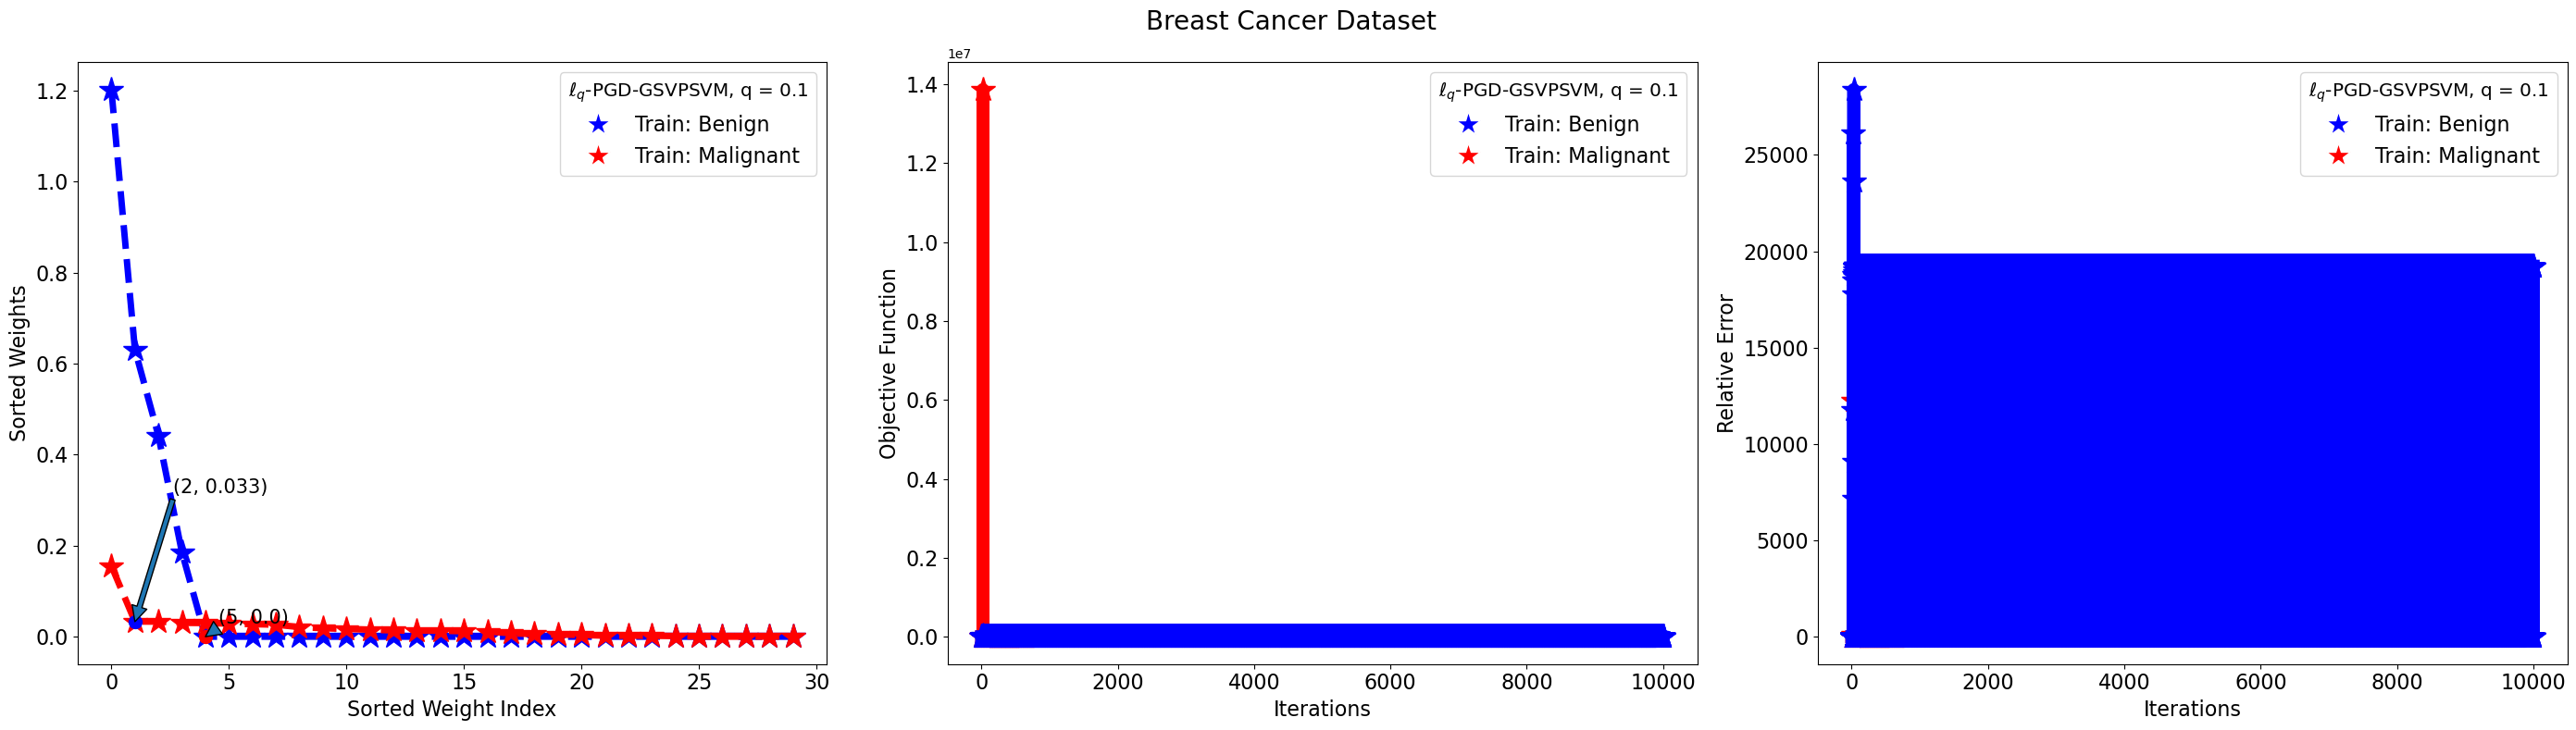

q := 1
epsilon := 0.01
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer    0.96853     0.989691  0.947368   0.981818   

   TN  FP  FN  TP  
0  96   1   3  54  


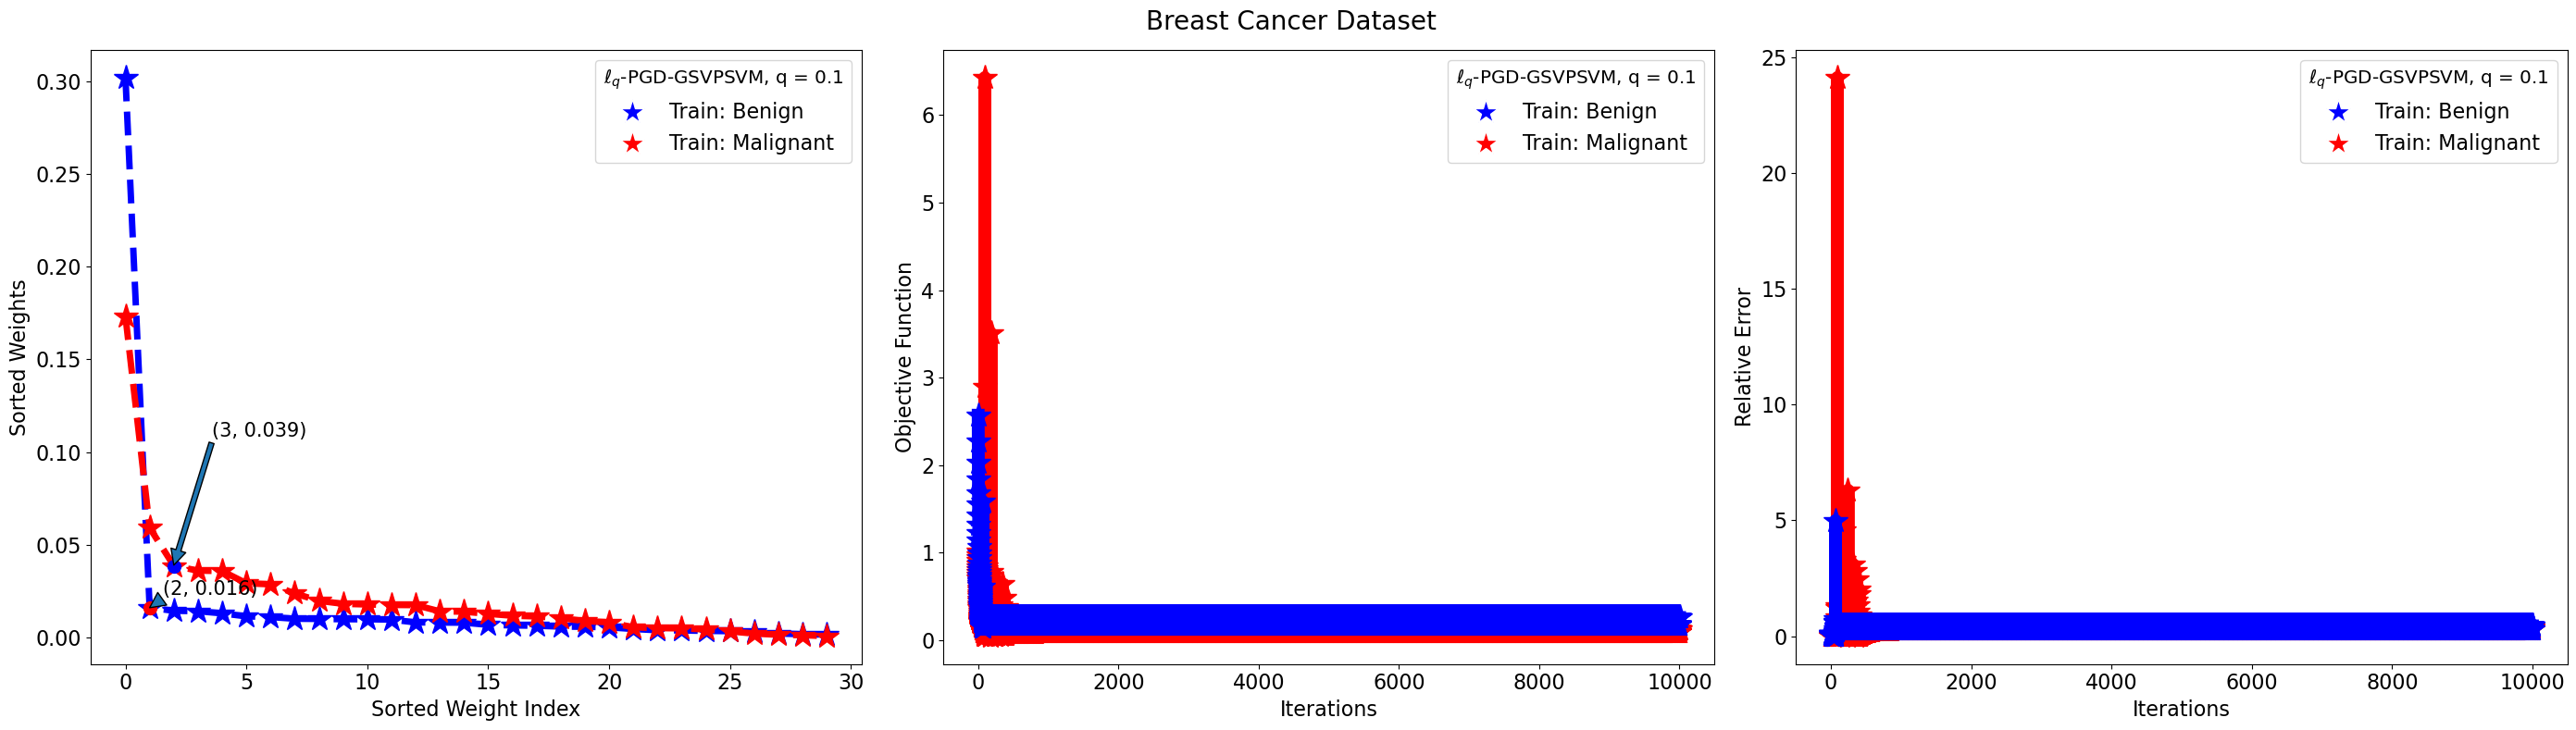

epsilon := 0.0031622776601683794
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer   0.905589     0.969072  0.842105   0.941176   

   TN  FP  FN  TP  
0  94   3   9  48  


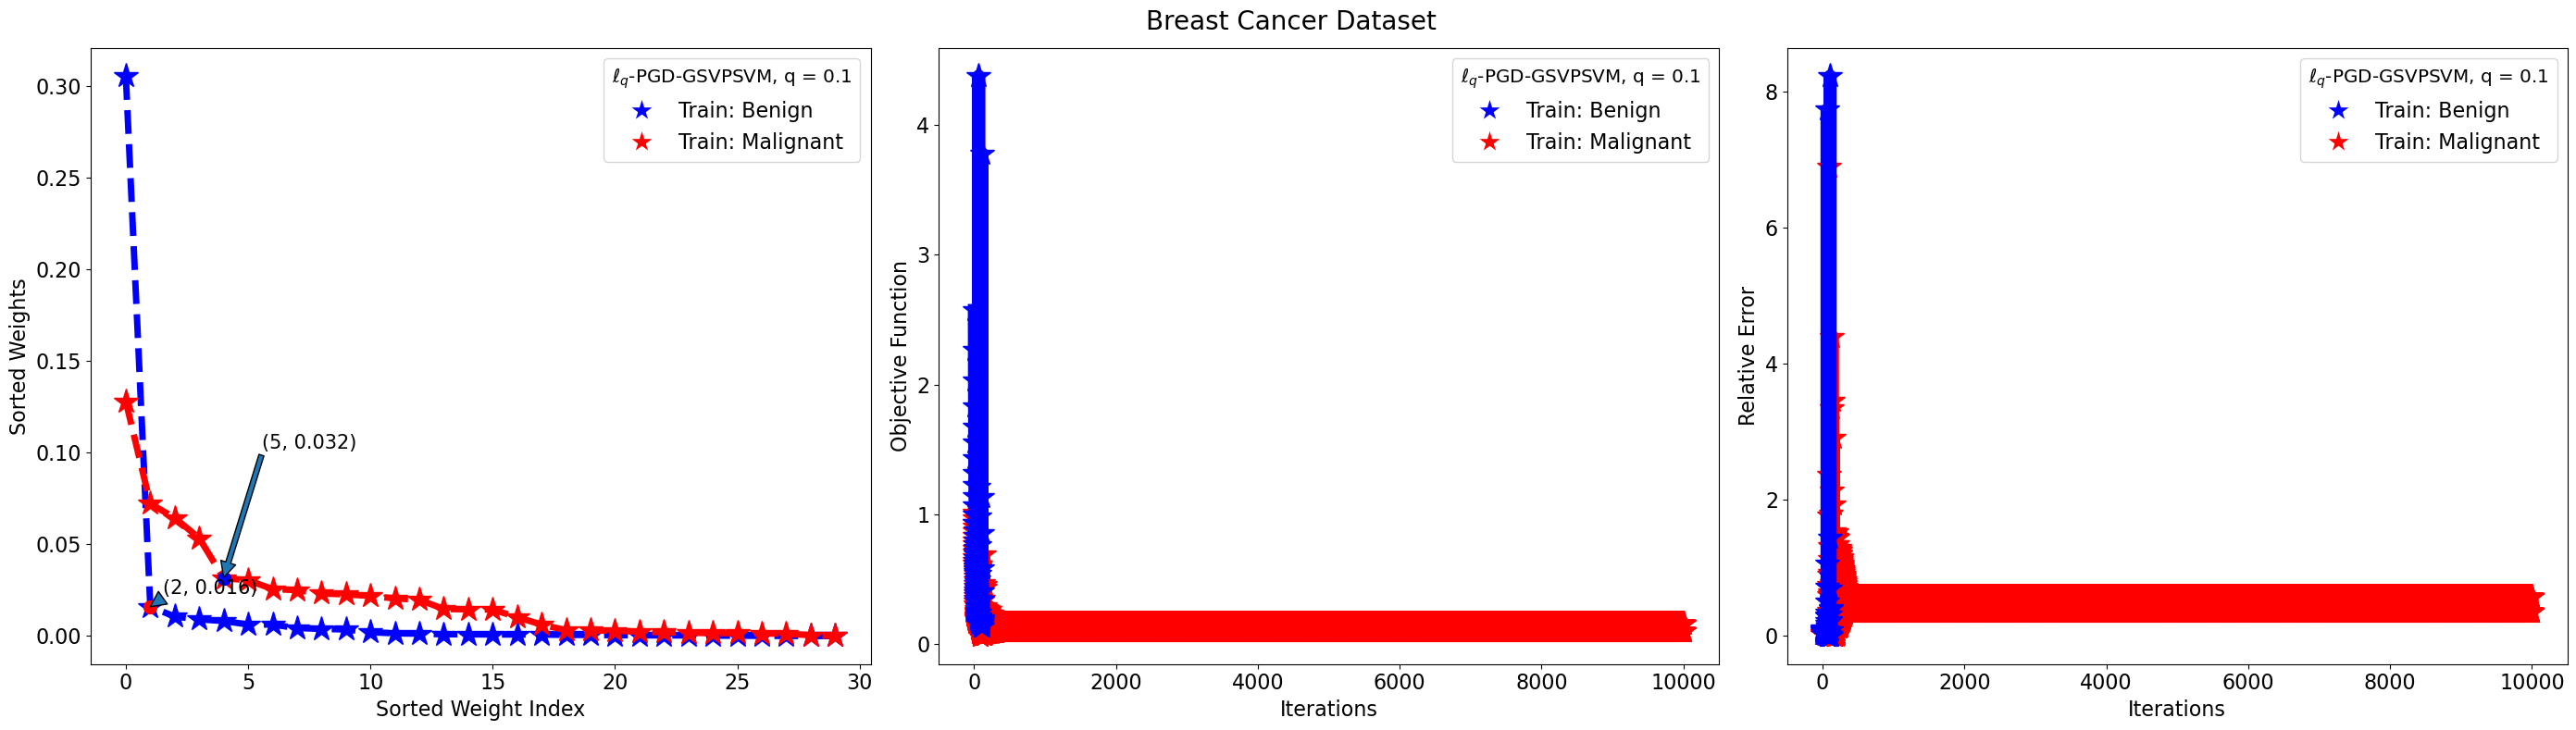

epsilon := 0.001
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer   0.917978     0.958763  0.877193   0.925926   

   TN  FP  FN  TP  
0  93   4   7  50  


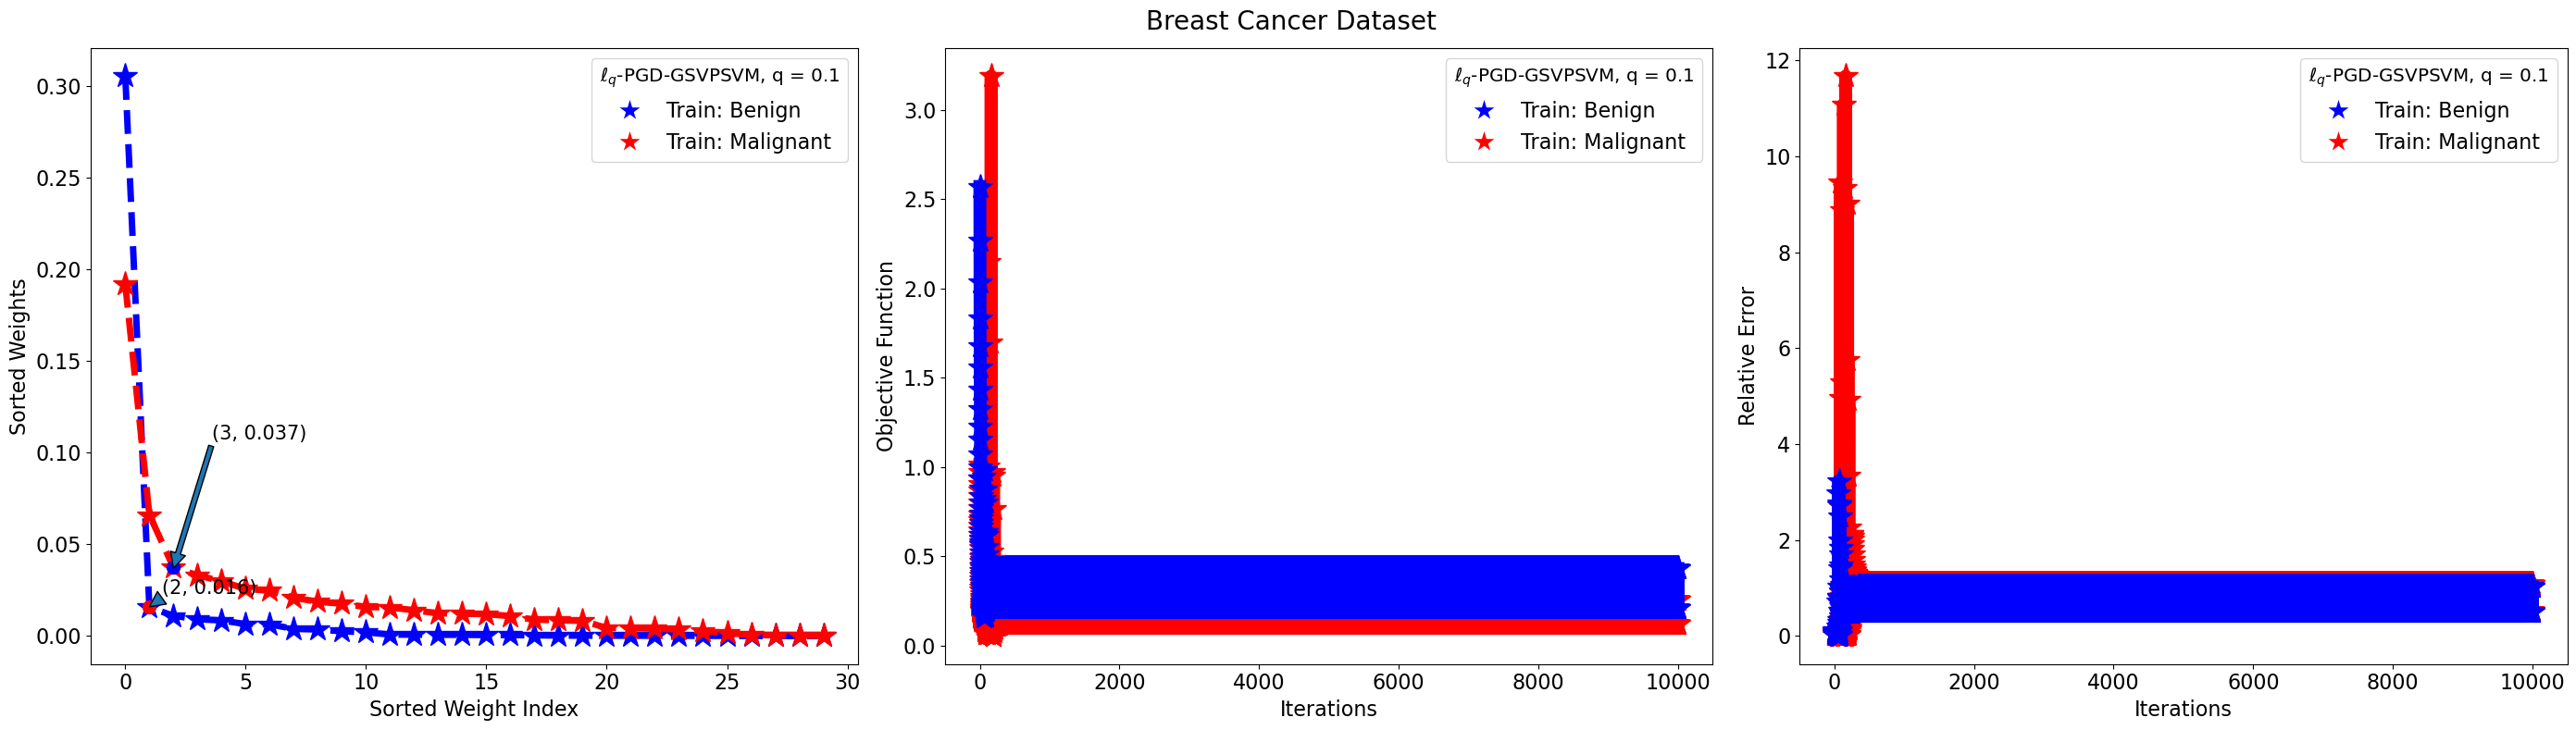

epsilon := 0.00031622776601683794
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer   0.959758     0.989691  0.929825   0.981481   

   TN  FP  FN  TP  
0  96   1   4  53  


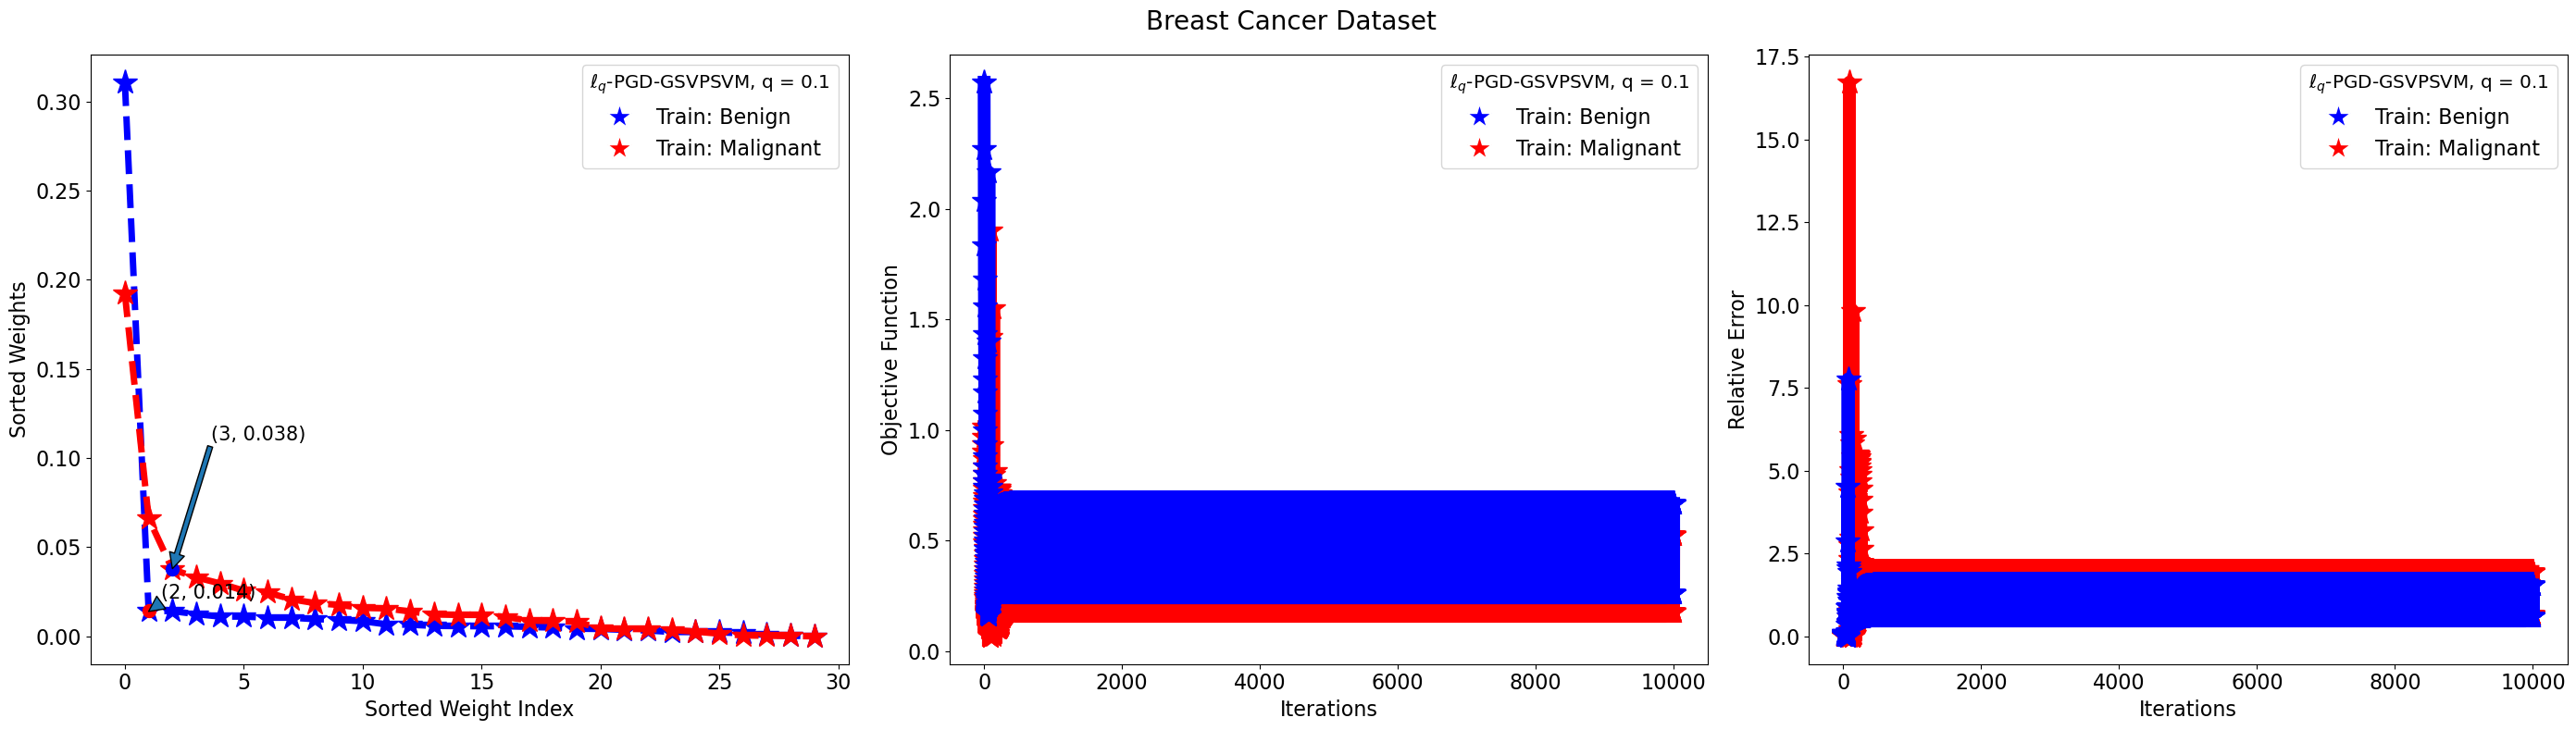

In [4]:
lambd = [(0.11120000000000001, 0.1112888888888889)]
step_size = [0.03162277660168379]
datum = ['Breast Cancer Dataset']
datum_list = ['breast_cancer']
listing = [{'x':'Benign','y':'Malignant'}]
var = ['elb_npsvm','npsvm']
q = [0.1,1]
for j in range(len(var)):
    print(var[j])
    for i in range(len(datum)):
        for qq in range(len(q)):
            print('q :=', q[qq])
            for k in [10**(-2),10**(-2.5),10**(-3),10**(-3.5)]:
                print('epsilon :=',k)
                runs_list, _, _ = classification(datum[i], '$\ell_q$-PGD-GSVPSVM, q = 0.1', var[j], 'lq1', lambd[i], 42, step_size[i], **{'q': qq, 'epsa': k})
                try:
                    top_features(f'heading_{datum_list[i]}', runs_list,**listing[i])
                except FileNotFoundError:
                    continue

Here, we illustrate with the Ovarian Cancer data that smaller values of q often result in sparser solutions, and by extension smaller number of features. The Jaccard Similarity Index (SMI) of 0.3849066717072391 shows that different $q$ can be expoited to select different features. Moreover, the ranking of the features common to different q values varies. Larger values of $q$ results in less sparser solutions.

q := 0.001
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0     82       0  Ovarian Cancer   0.806364         0.84  0.772727   0.894737   

   TN  FP  FN  TP  
0  21   4  10  34  


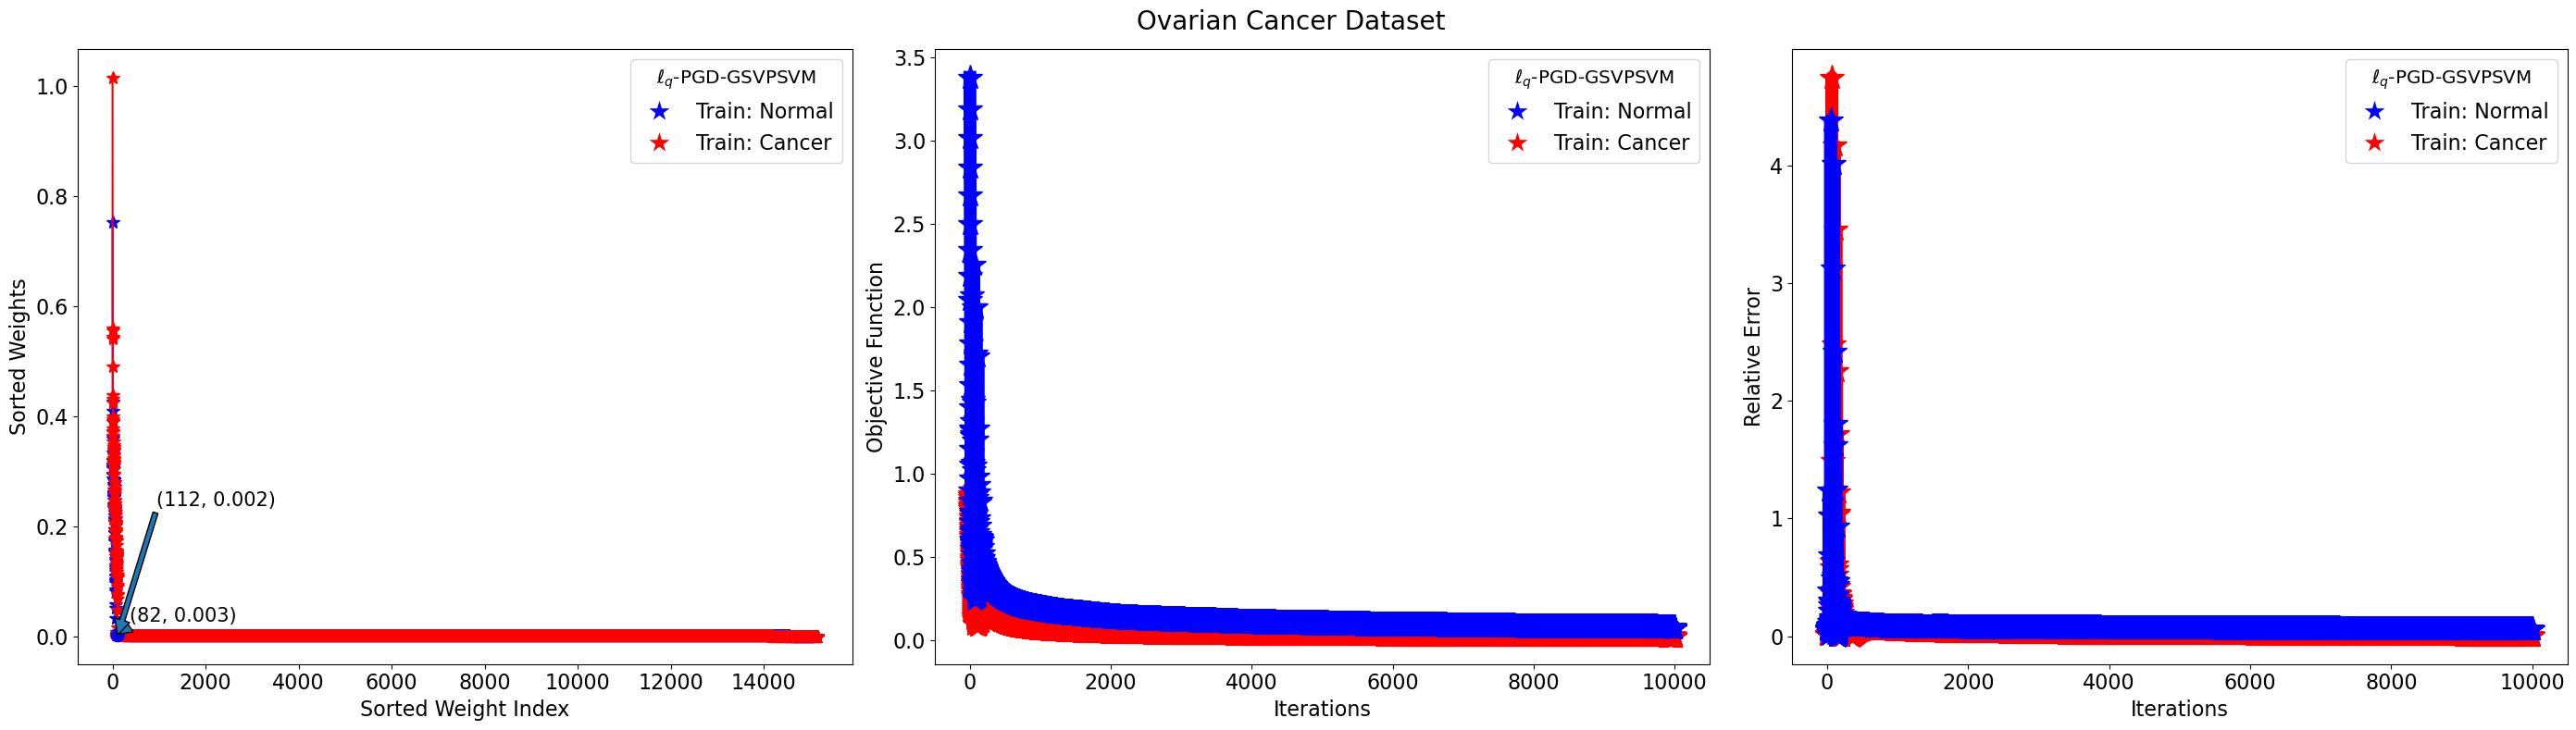

q := 0.01
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0     89       1  Ovarian Cancer   0.823636         0.92  0.727273   0.941176   

   TN  FP  FN  TP  
0  23   2  12  32  


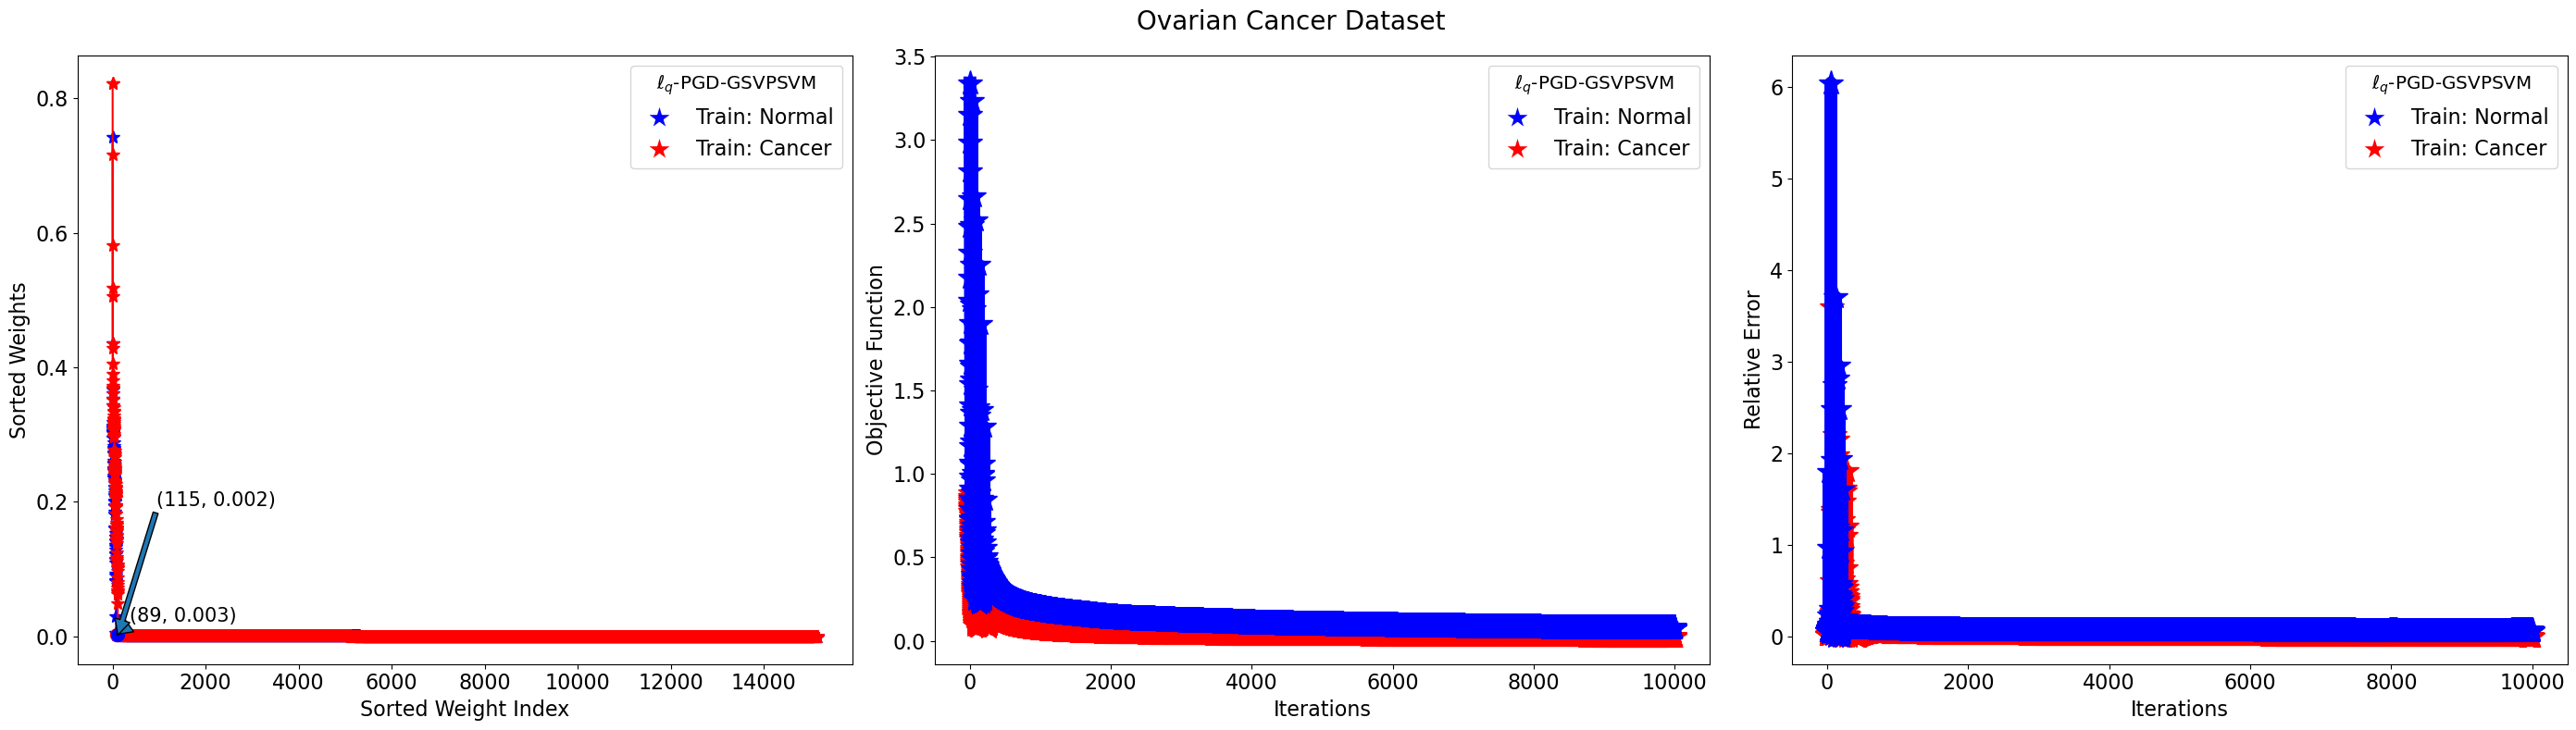

q := 0.1
condition satisfied
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0    139       5  Ovarian Cancer   0.680909         0.68  0.681818   0.789474   

   TN  FP  FN  TP  
0  17   8  14  30  


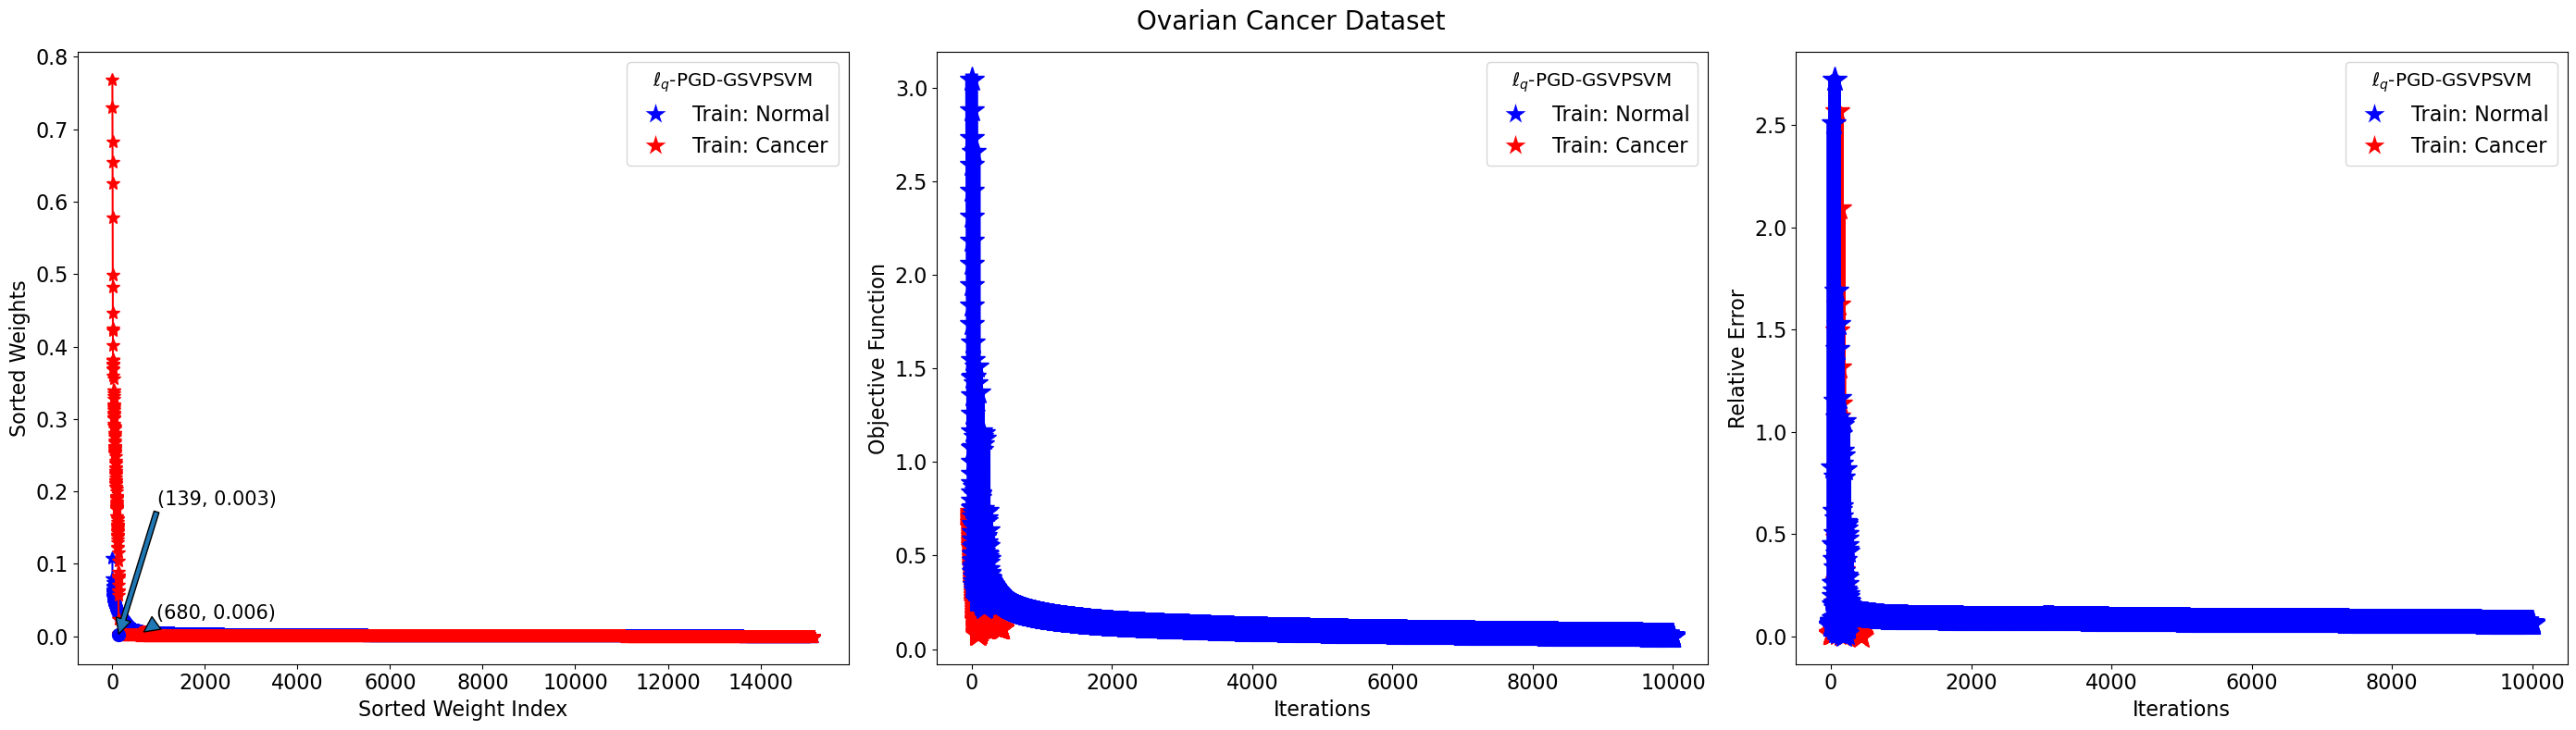

q := 0.2
condition satisfied
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0    183       6  Ovarian Cancer   0.740909          0.8  0.681818   0.857143   

   TN  FP  FN  TP  
0  20   5  14  30  


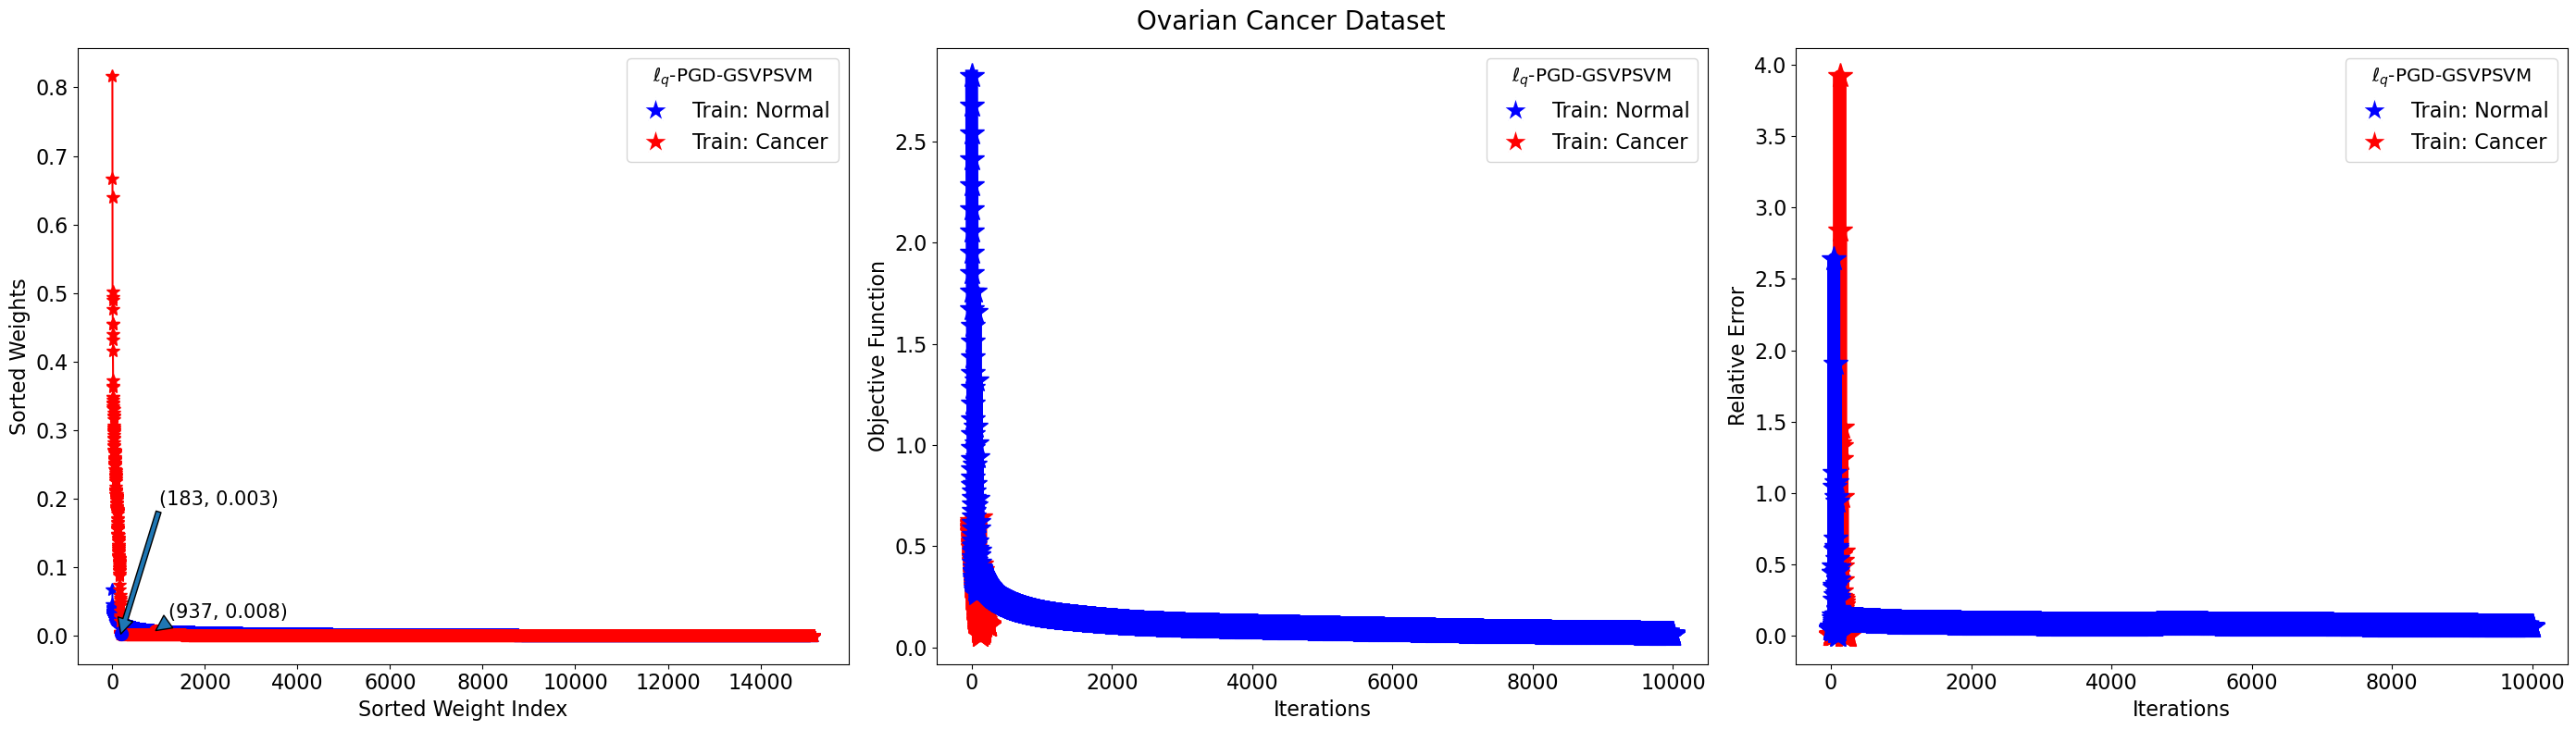

q := 0.3
condition satisfied
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0    235      11  Ovarian Cancer   0.823636         0.92  0.727273   0.941176   

   TN  FP  FN  TP  
0  23   2  12  32  


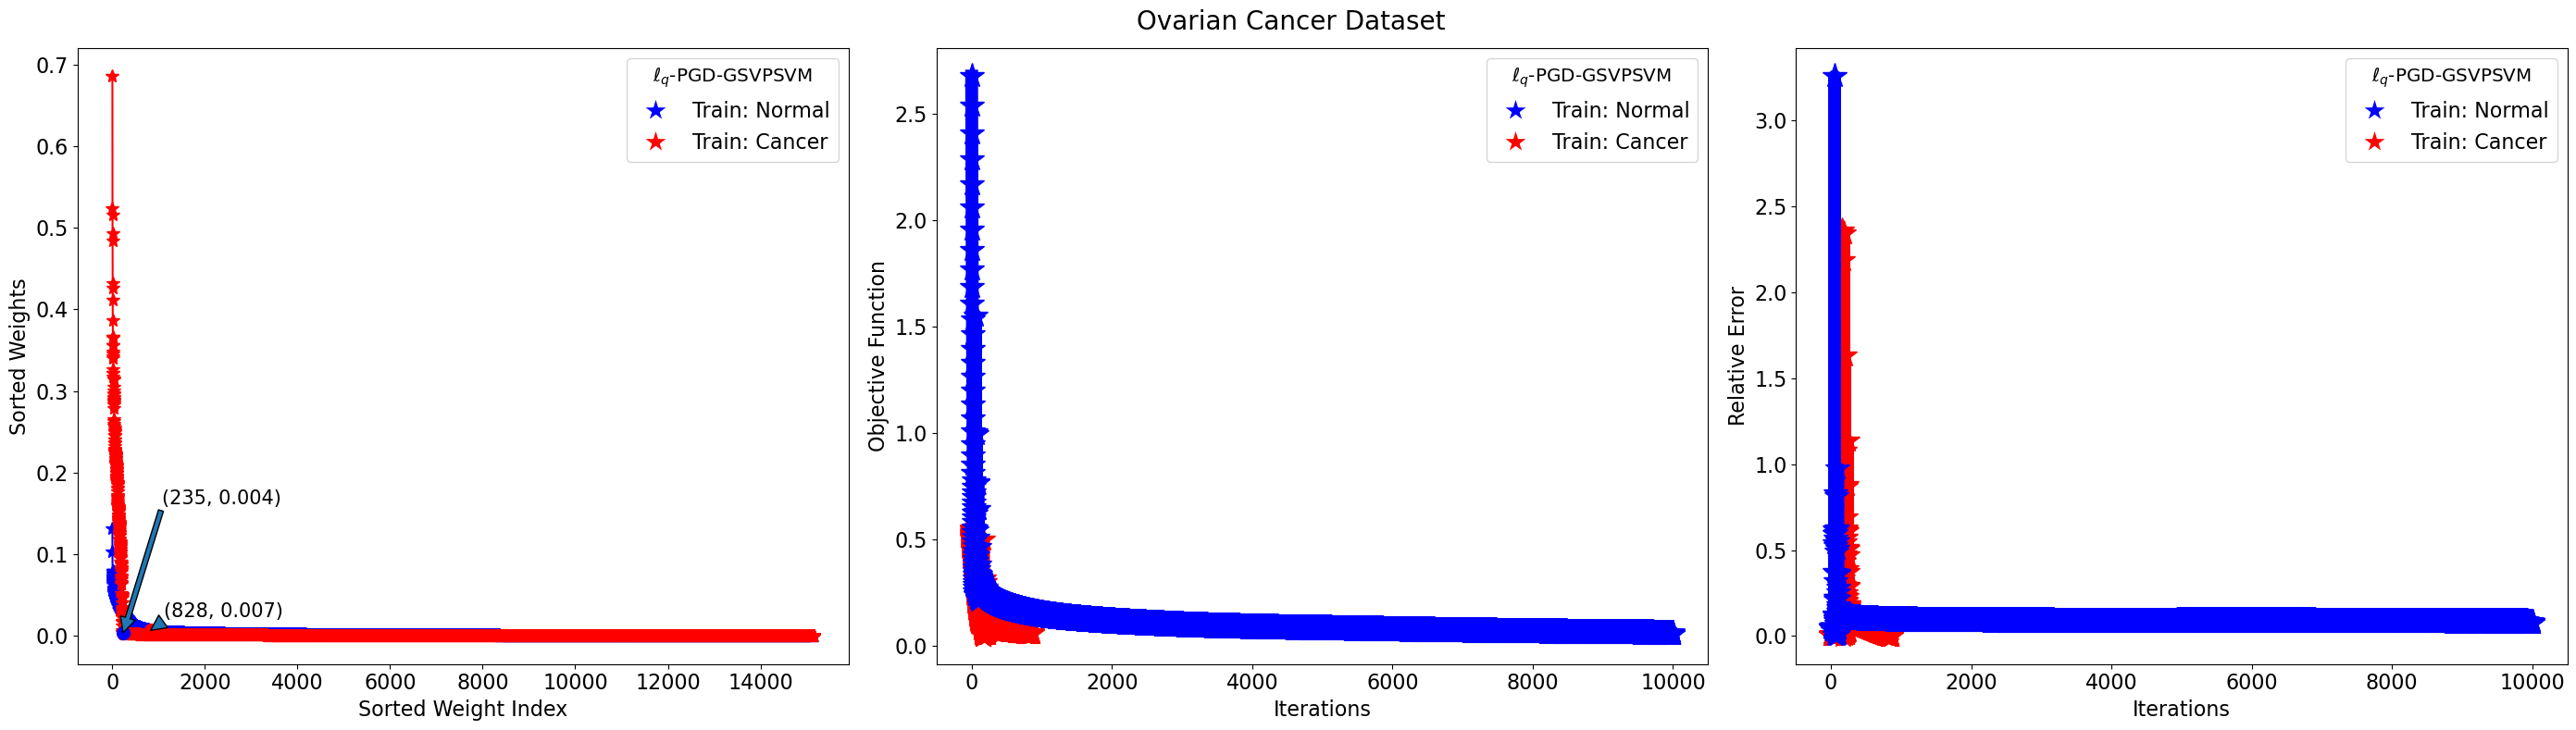

q := 0.4
condition satisfied
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0    319      19  Ovarian Cancer   0.769545         0.88  0.659091    0.90625   

   TN  FP  FN  TP  
0  22   3  15  29  


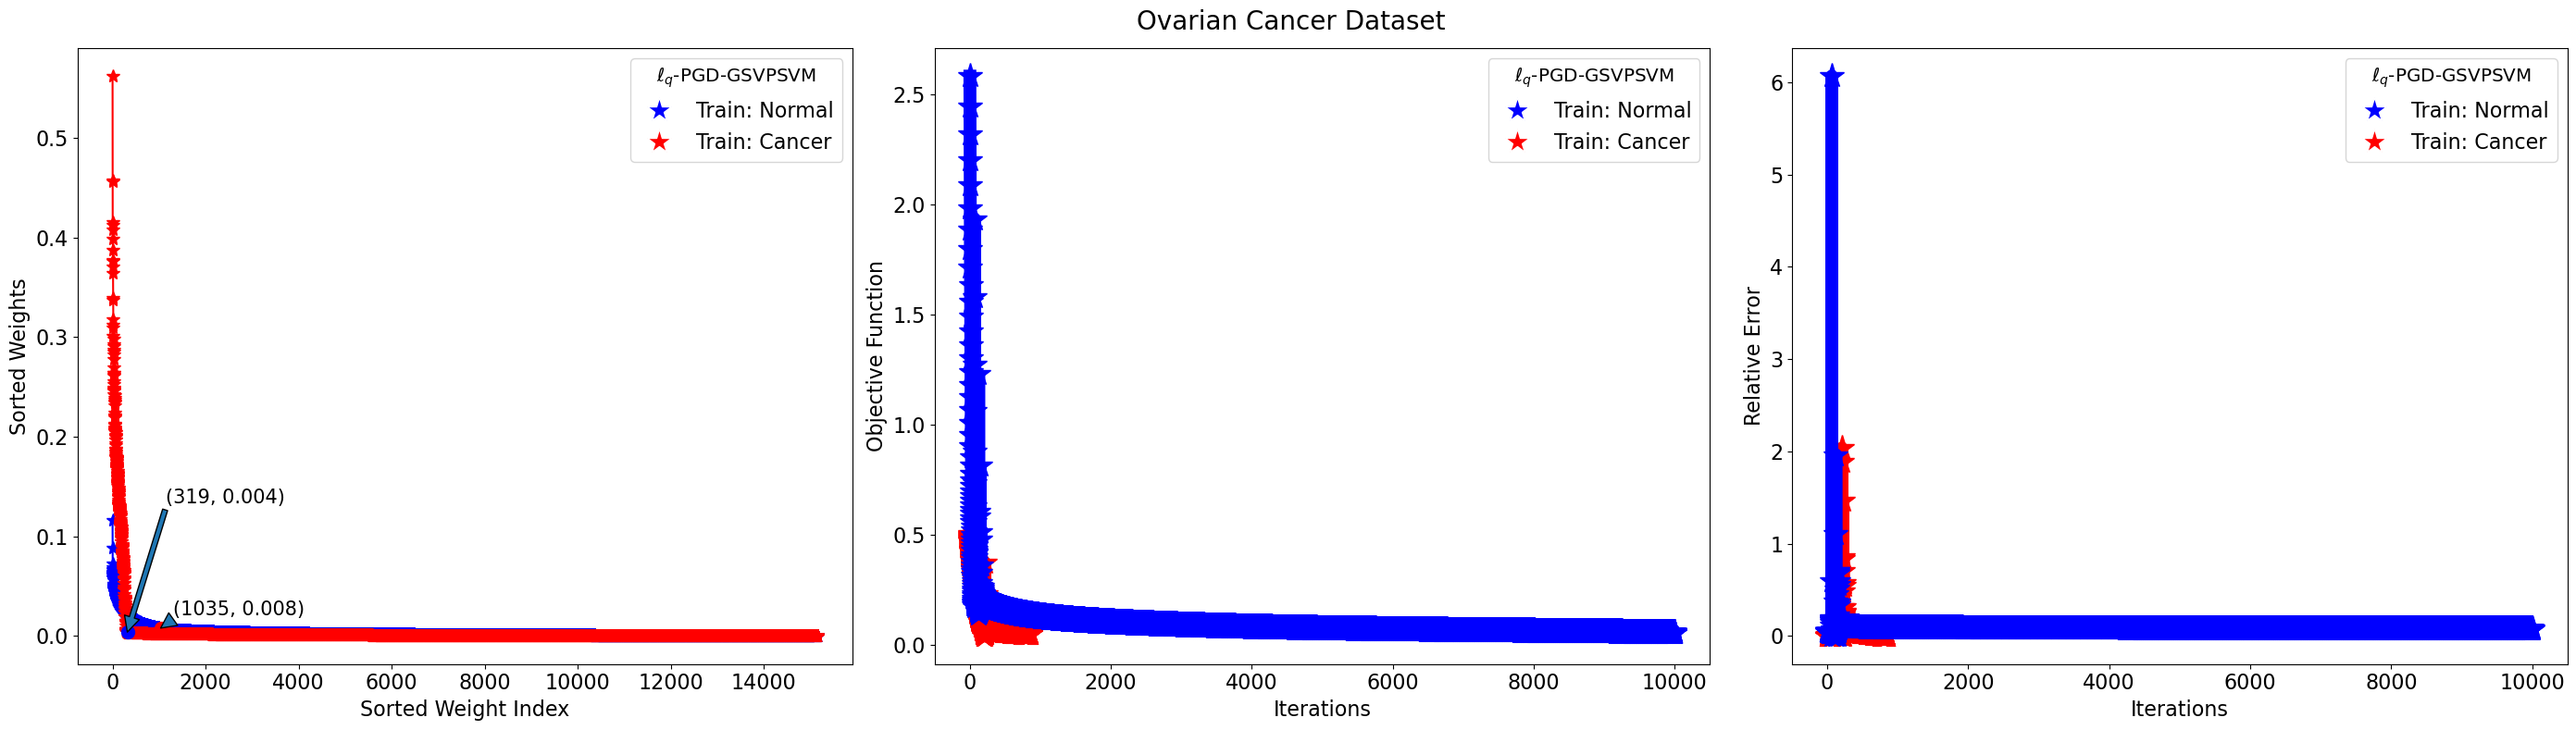

q := 0.5
condition satisfied
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0    402      30  Ovarian Cancer   0.792273         0.88  0.704545   0.911765   

   TN  FP  FN  TP  
0  22   3  13  31  


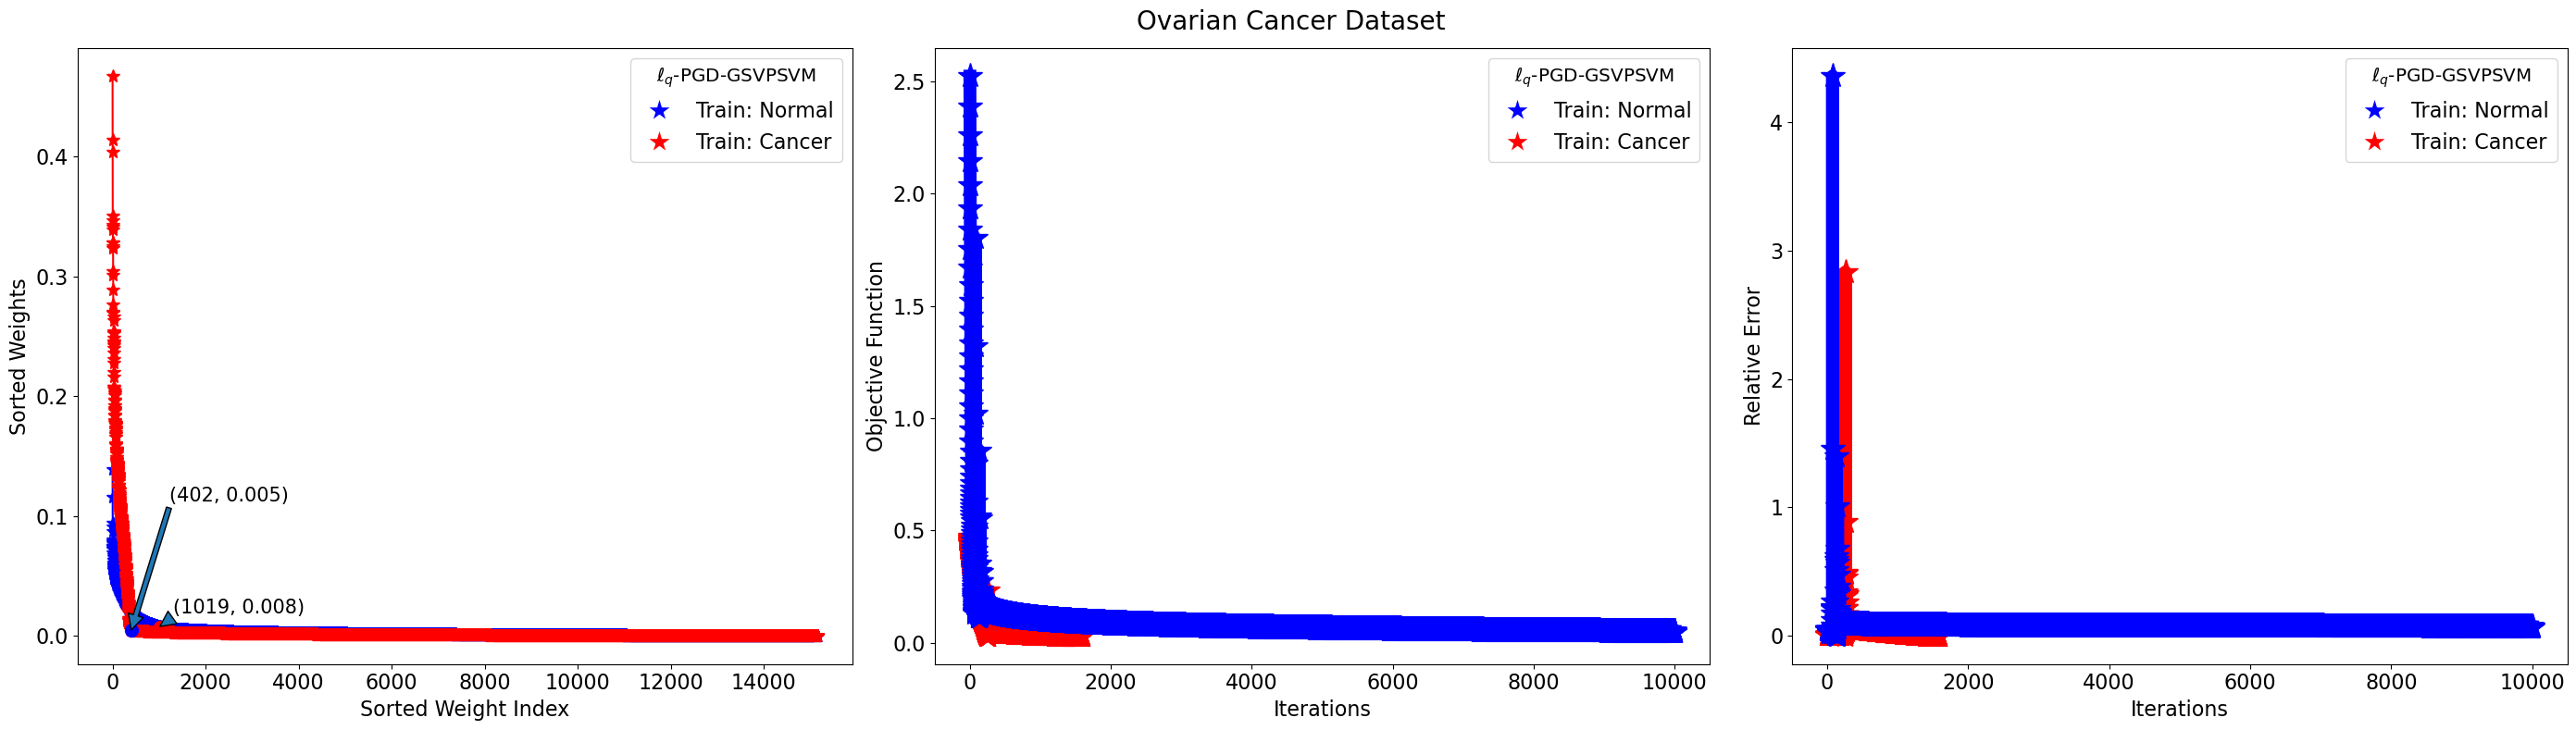

q := 0.6
condition satisfied
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0    547      53  Ovarian Cancer   0.809545         0.96  0.659091   0.966667   

   TN  FP  FN  TP  
0  24   1  15  29  


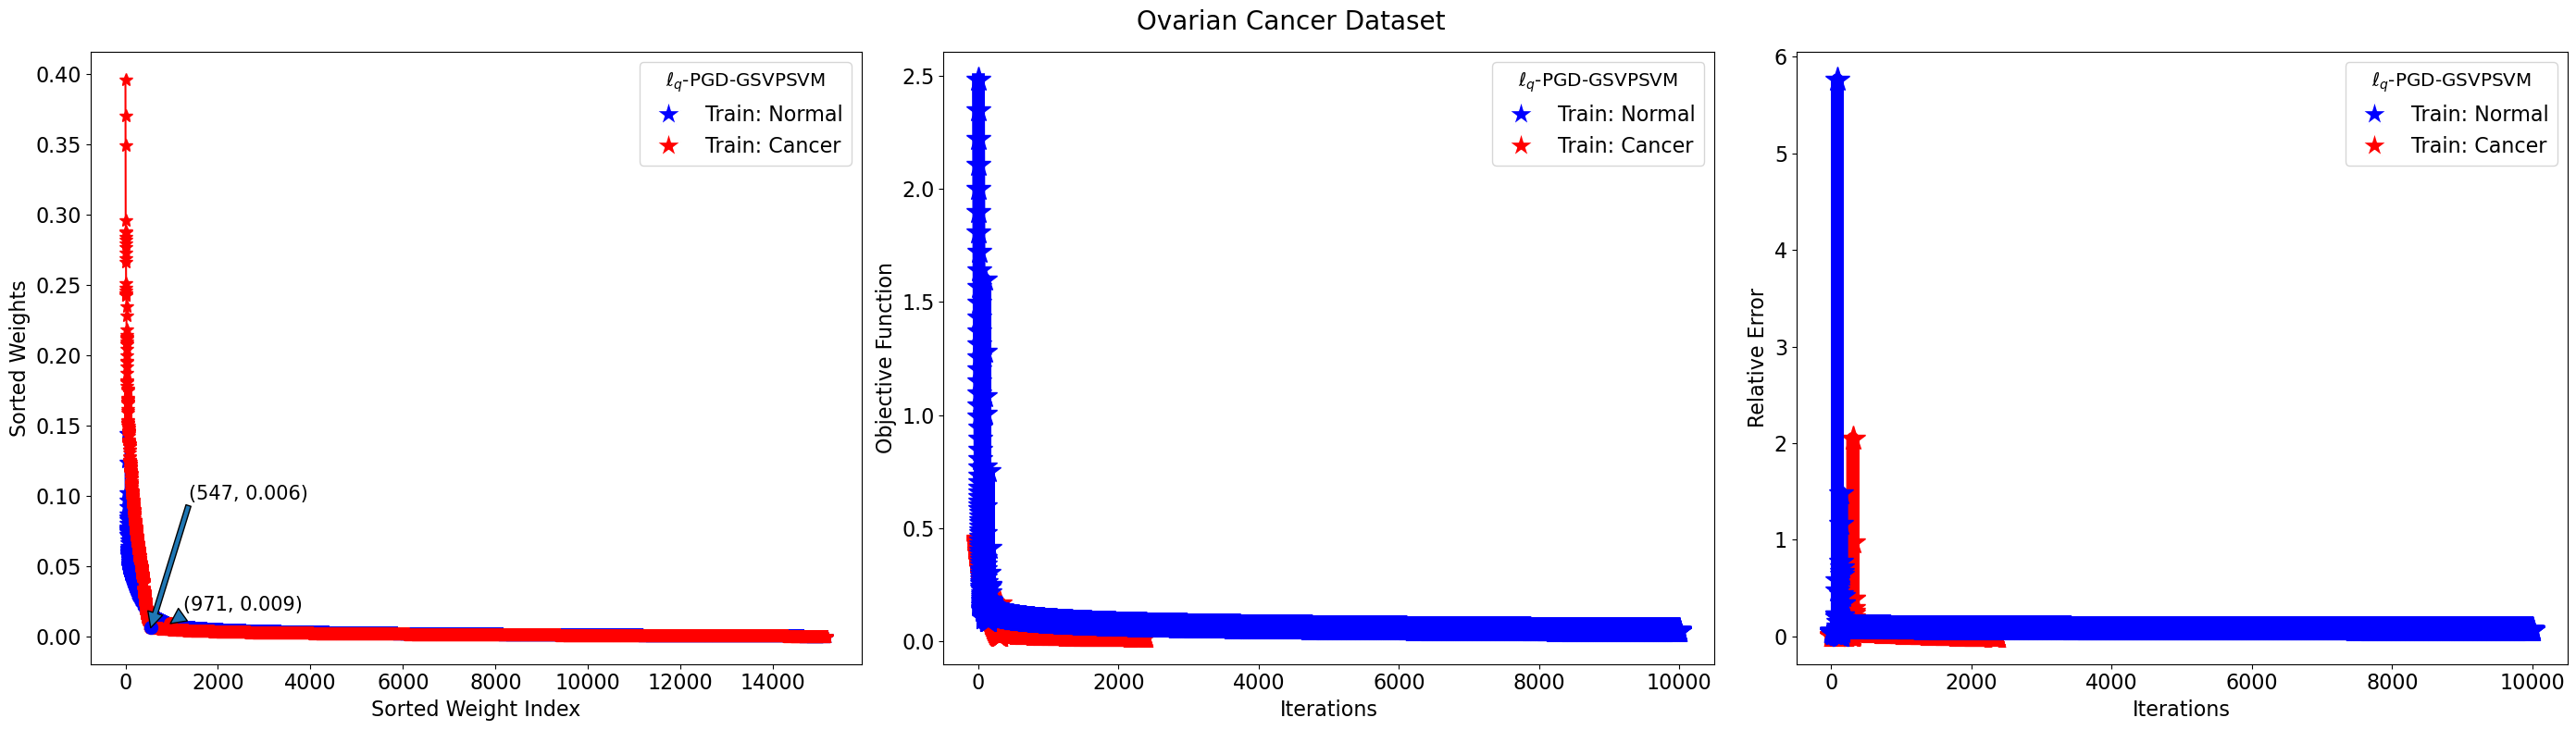

q := 0.7
condition satisfied
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0    750      67  Ovarian Cancer   0.832273         0.96  0.704545    0.96875   

   TN  FP  FN  TP  
0  24   1  13  31  


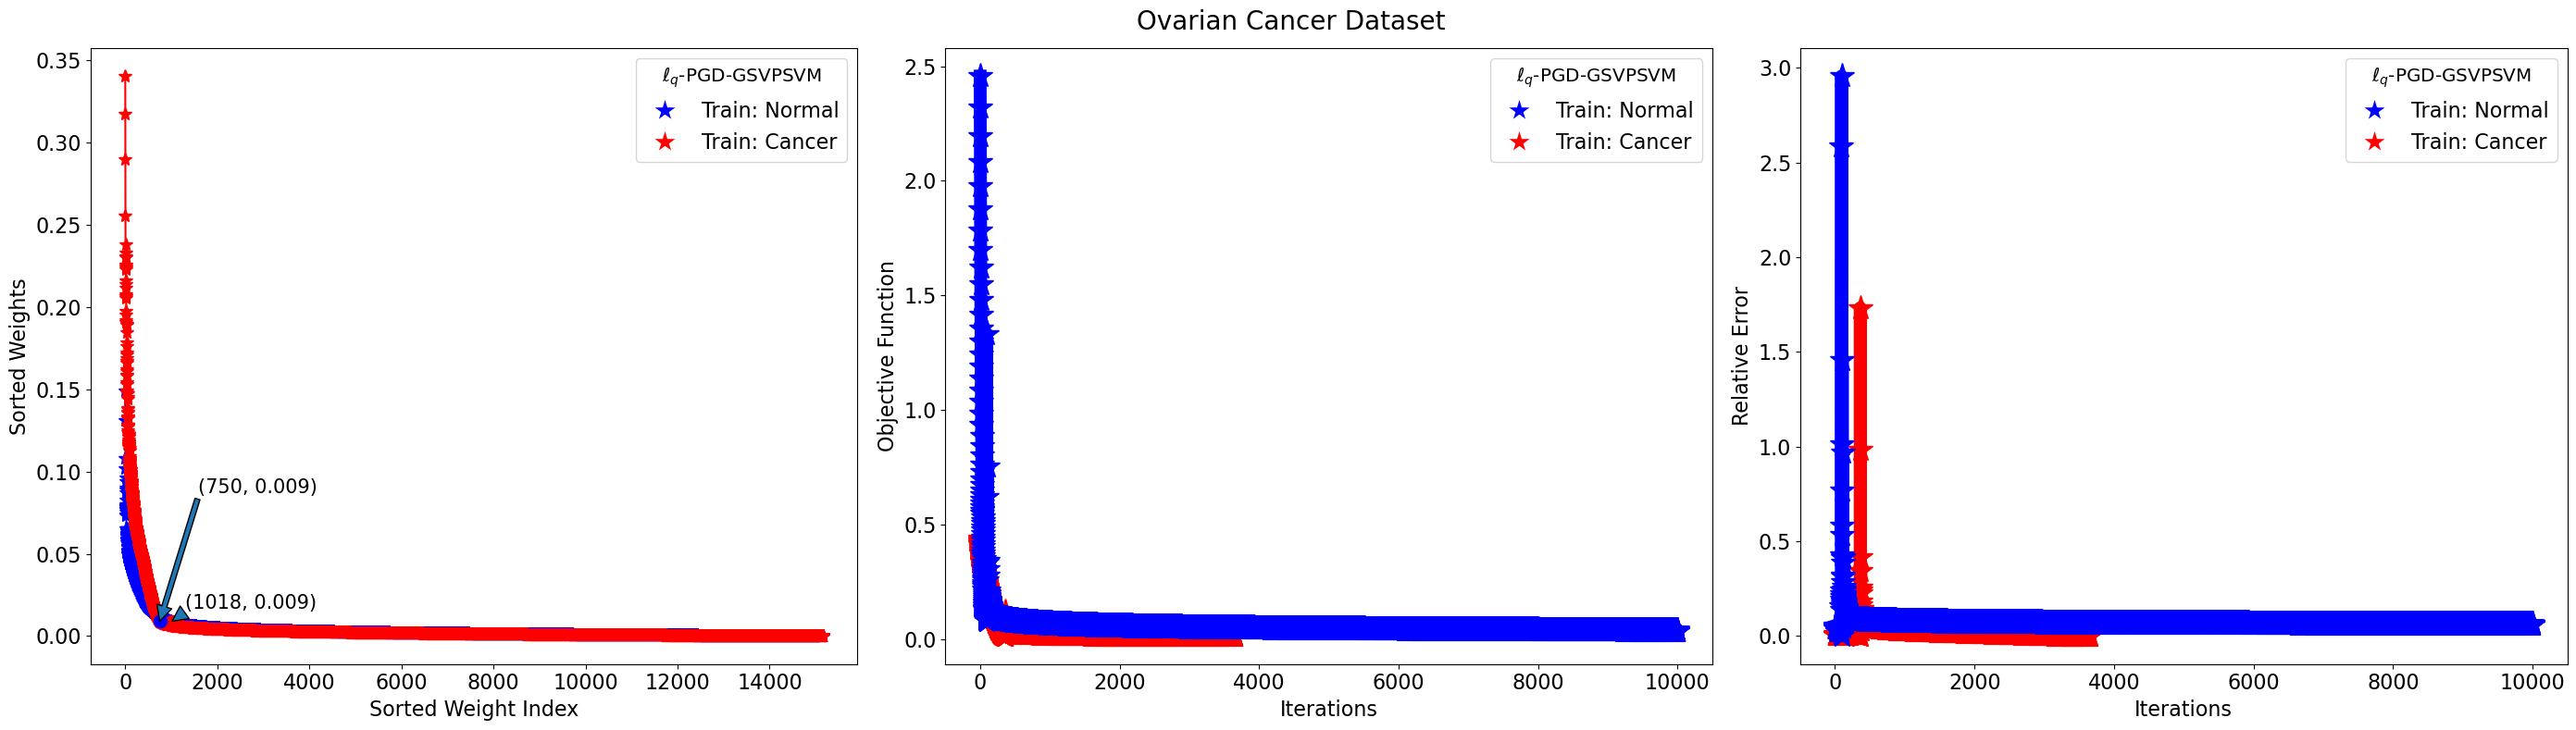

q := 0.8
condition satisfied
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0   1000     122  Ovarian Cancer   0.800909         0.92  0.681818     0.9375   

   TN  FP  FN  TP  
0  23   2  14  30  


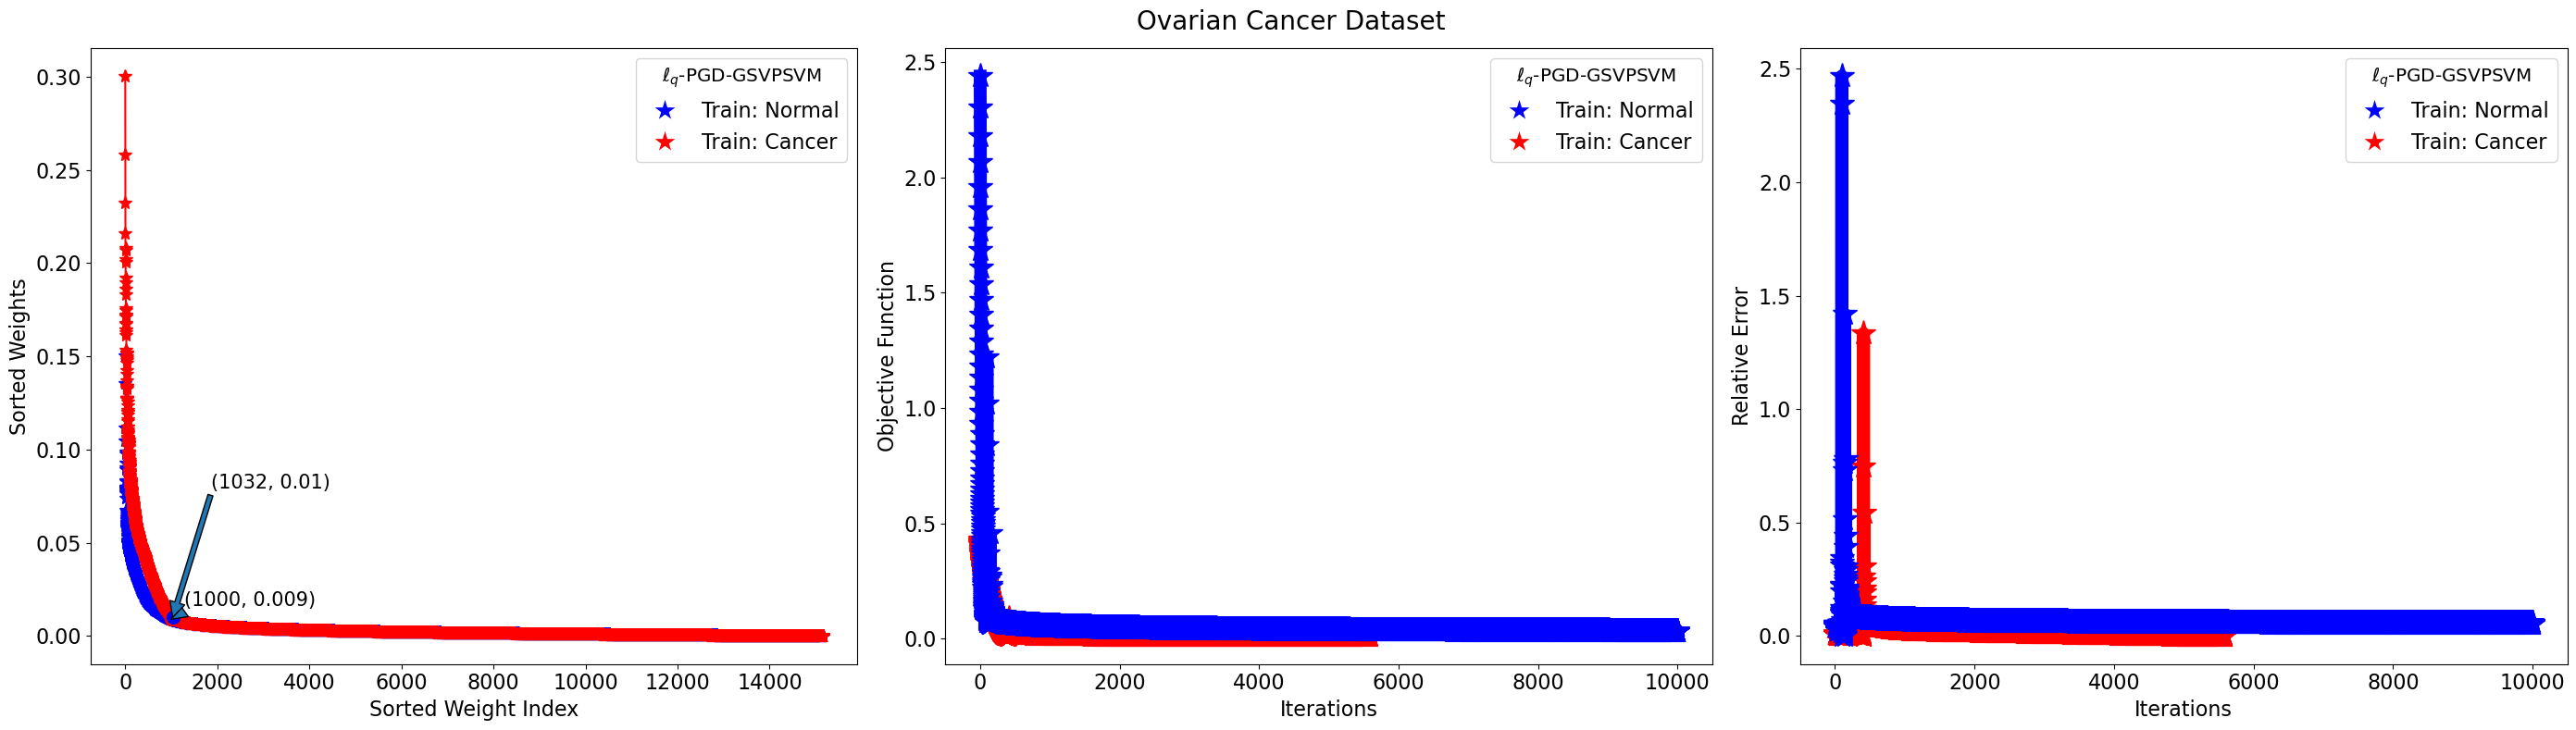

q := 0.9
condition satisfied
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0    996     128  Ovarian Cancer   0.852273          1.0  0.704545        1.0   

   TN  FP  FN  TP  
0  25   0  13  31  


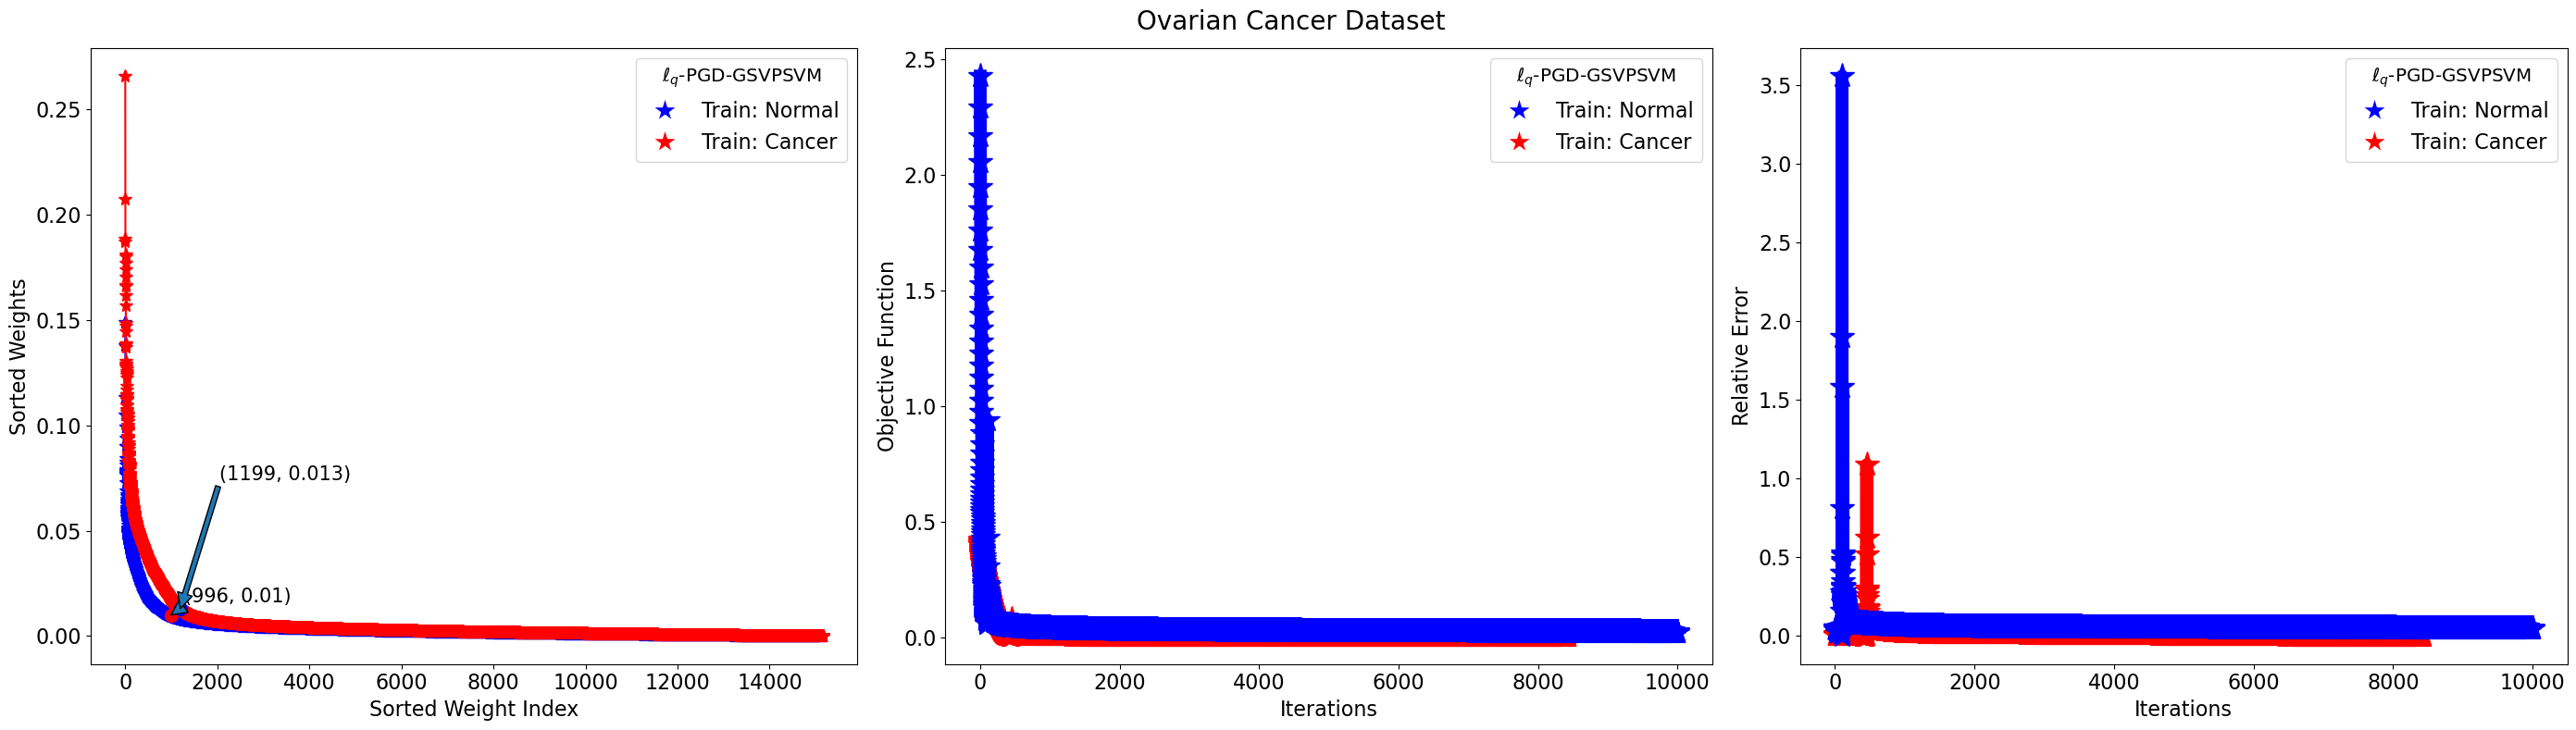

q := 1
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0   1062     152  Ovarian Cancer   0.832273         0.96  0.704545    0.96875   

   TN  FP  FN  TP  
0  24   1  13  31  


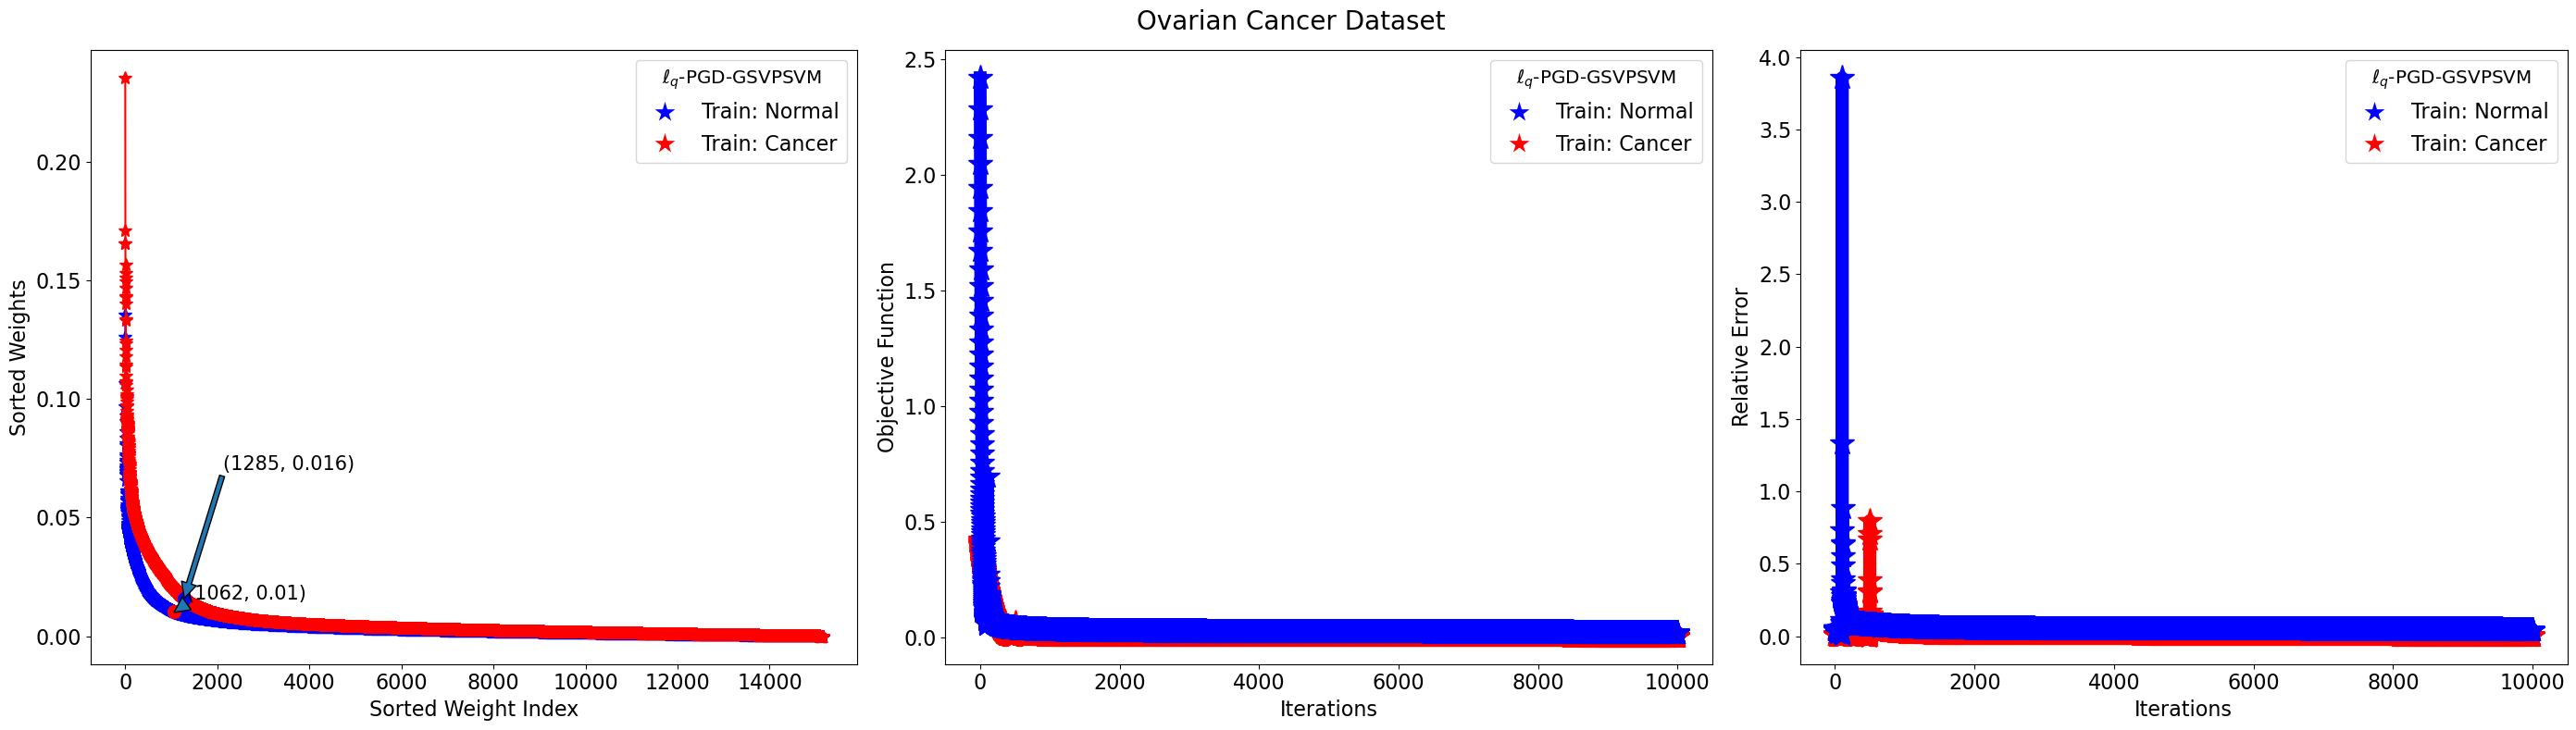

q := 1.5
   Elbow  Common        Dataset   Bal. Acc.  Specificity  Recall  Precision  \
0    885     131  Ovarian Cancer      0.855         0.96    0.75   0.970588   

   TN  FP  FN  TP  
0  24   1  11  33  


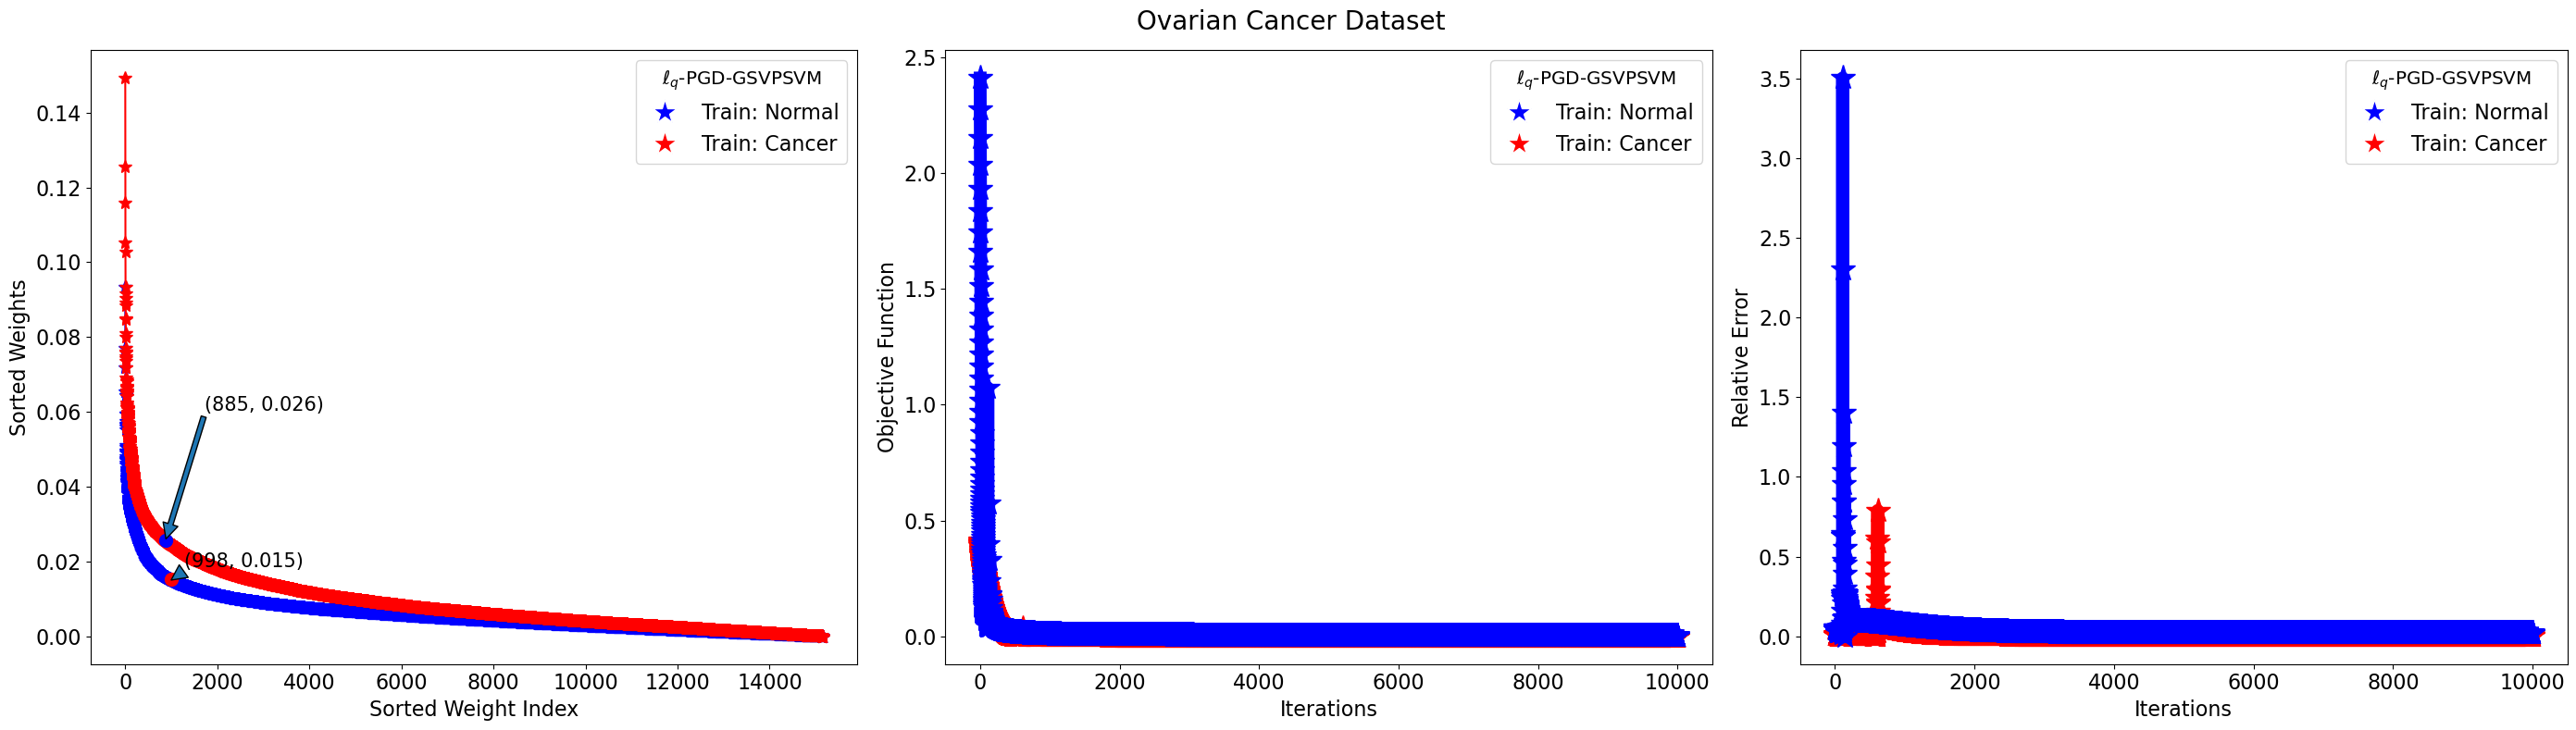

q := 2
   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0    936     151  Ovarian Cancer   0.832273         0.96  0.704545    0.96875   

   TN  FP  FN  TP  
0  24   1  13  31  


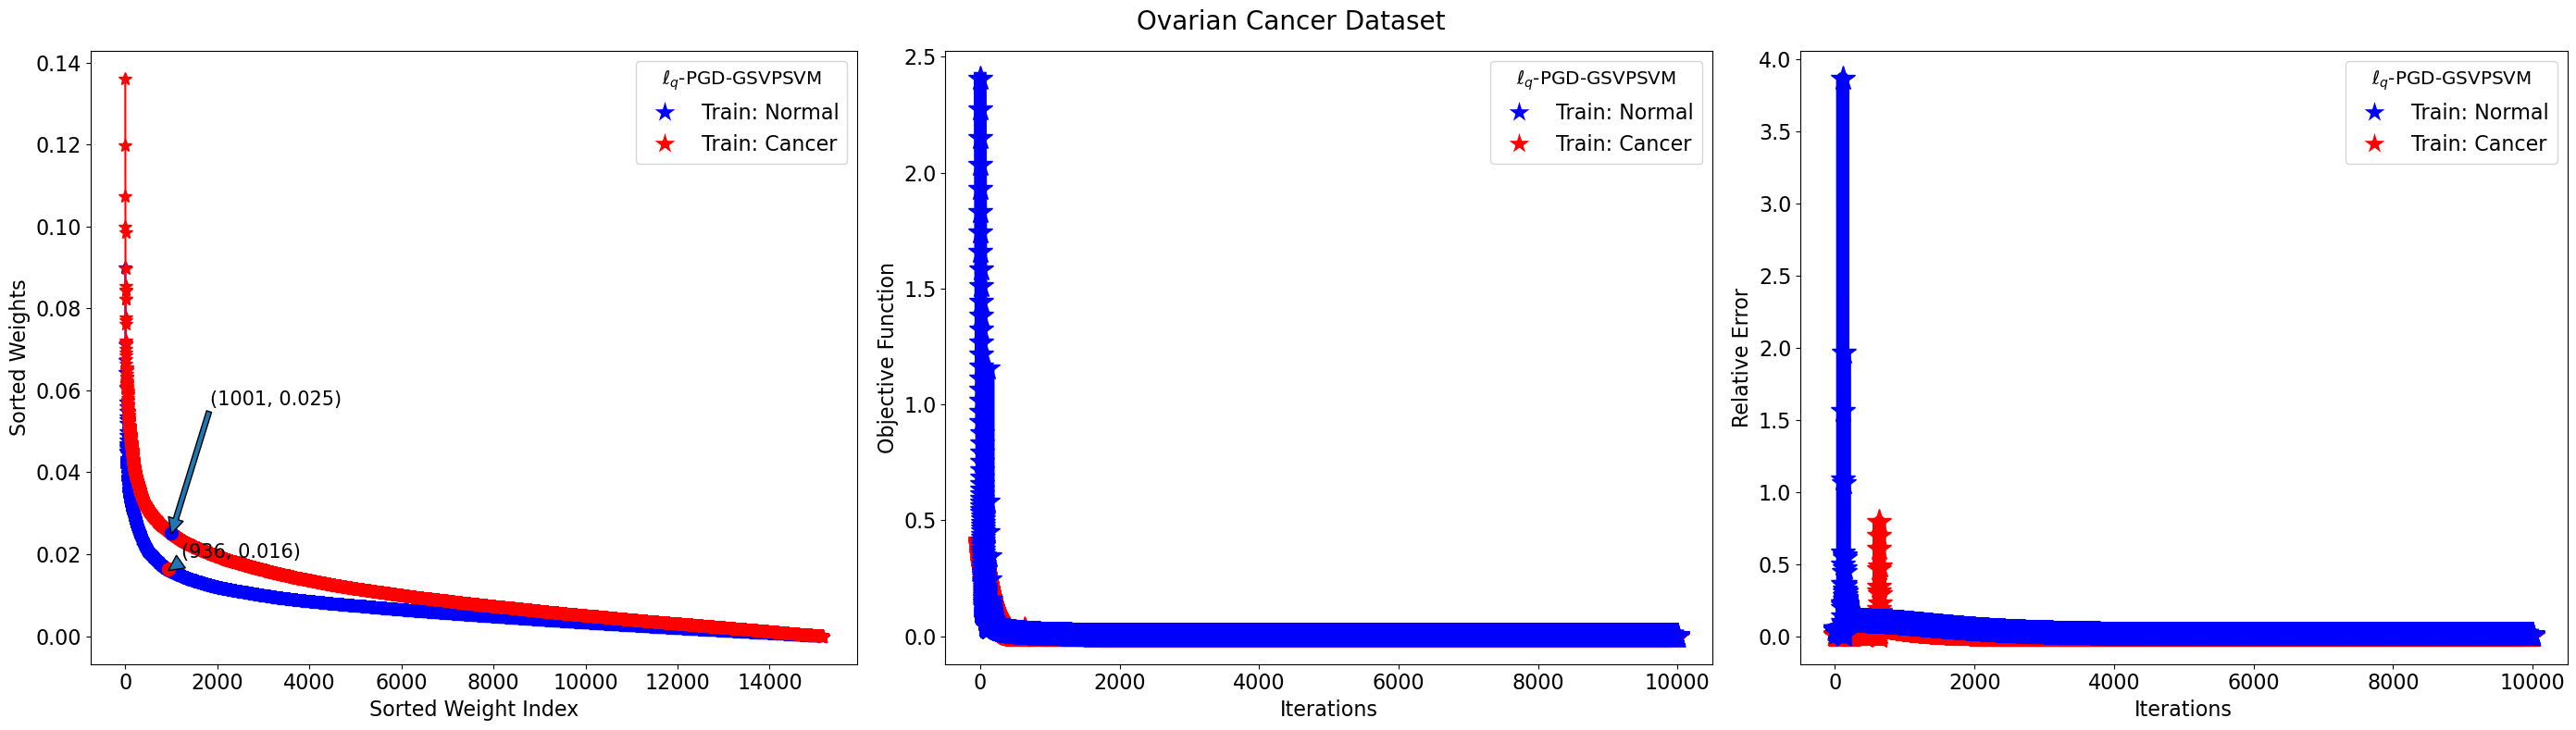

Jaccard Similarity Index for $q$ := 0.3849066717072391


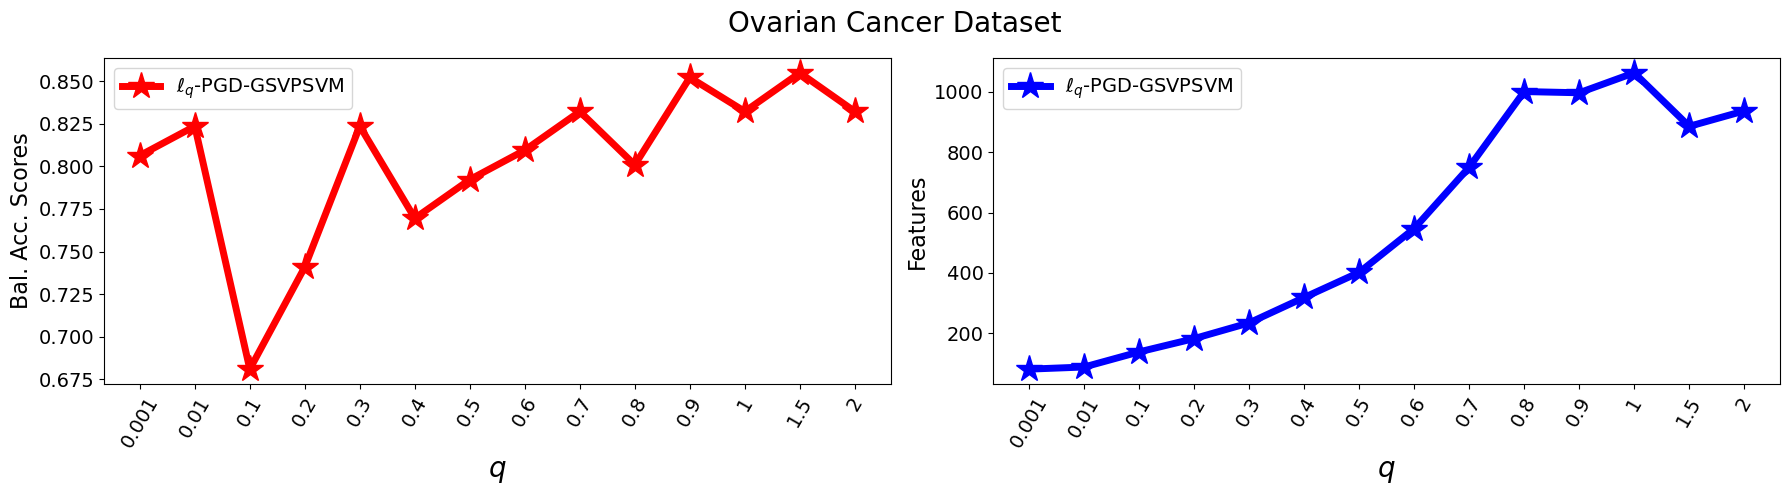

In [6]:
lambd = [(0.0001, 0.0002)]
step_size = [0.03162277660168379]
datum = ['Ovarian Cancer Dataset']
setq = [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2]
headings = 'Ovarian'
Lqplots(setq,'$\ell_q$-PGD-GSVPSVM',lambd[0],42,datum[0],'lq1','npsvm',headings,1e-2,step_size[0],**{'x':'Normal','y':'Cancer'})

Here, model is trained and validated. The reqularization parameters $\delta_1$ and $\delta_2$ are chosen via a grid search over an interval $[0.0001,1]$ and $[0.0002,1]$, respectively.
The step size $\alpha$ is selected from $[10^{-1},10^{-1.5},10^{-2},10^{-2.5},10^{-3},10^{-3.5}]$. The best parameters are expected to result in sparse solutions, a polynomially decreasing objective function values, and a non-oscillating relative error. We demonstrate with the Alpaca dataset, for $q=1$ and $q=0.1$, that the solutions can be sparse, yet exhibiting oscillating objective function values and relative errors.

condition satisfied
   Elbow  Common         Dataset   Bal. Acc.  Specificity    Recall  \
0    515      27  Alpaca MERS-CoV   0.807143          0.9  0.714286   

   Precision  TN  FP  FN  TP  
0   0.909091   9   1   4  10  


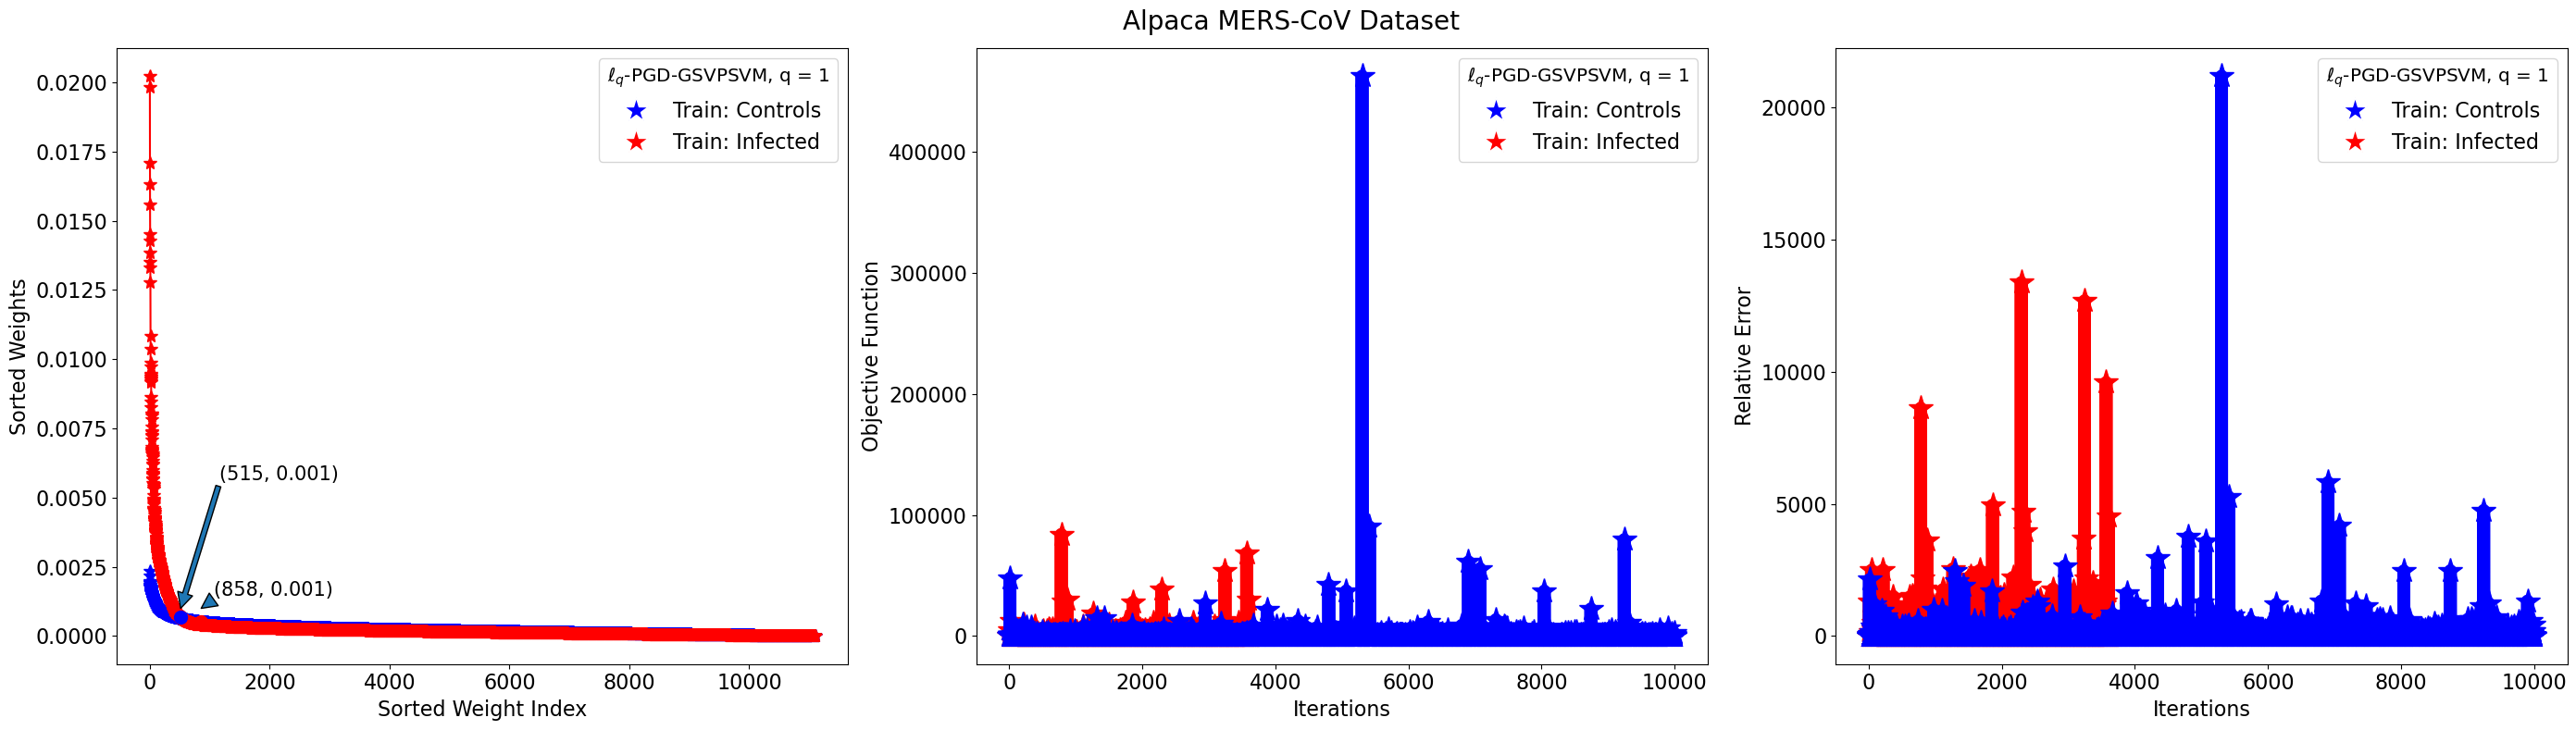

condition satisfied
condition satisfied
   Elbow  Common  Dataset   Bal. Acc.  Specificity    Recall  Precision   TN  \
0      2       2  Diabetes   0.742593     0.762963  0.722222   0.619048  103   

   FP  FN  TP  
0  32  20  52  


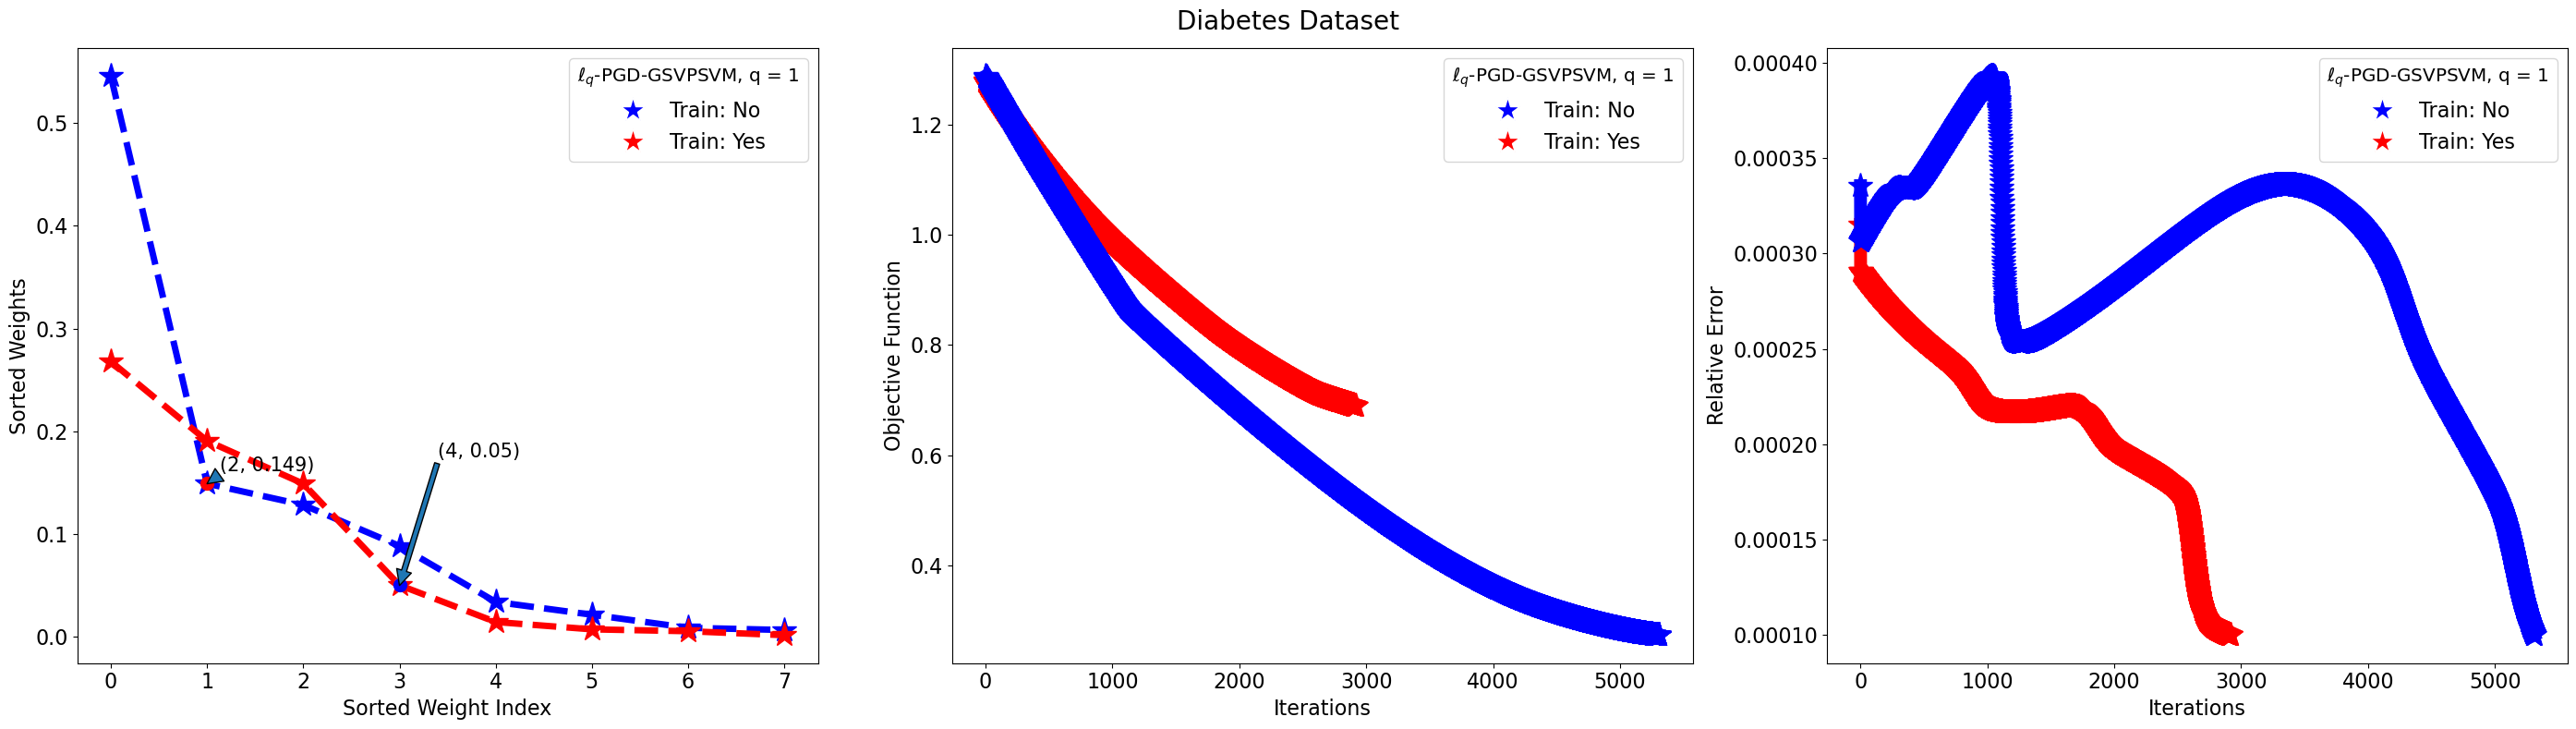

condition satisfied
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Heart Disease   0.800754     0.790698  0.810811   0.769231   

   TN  FP  FN  TP  
0  34   9   7  30  


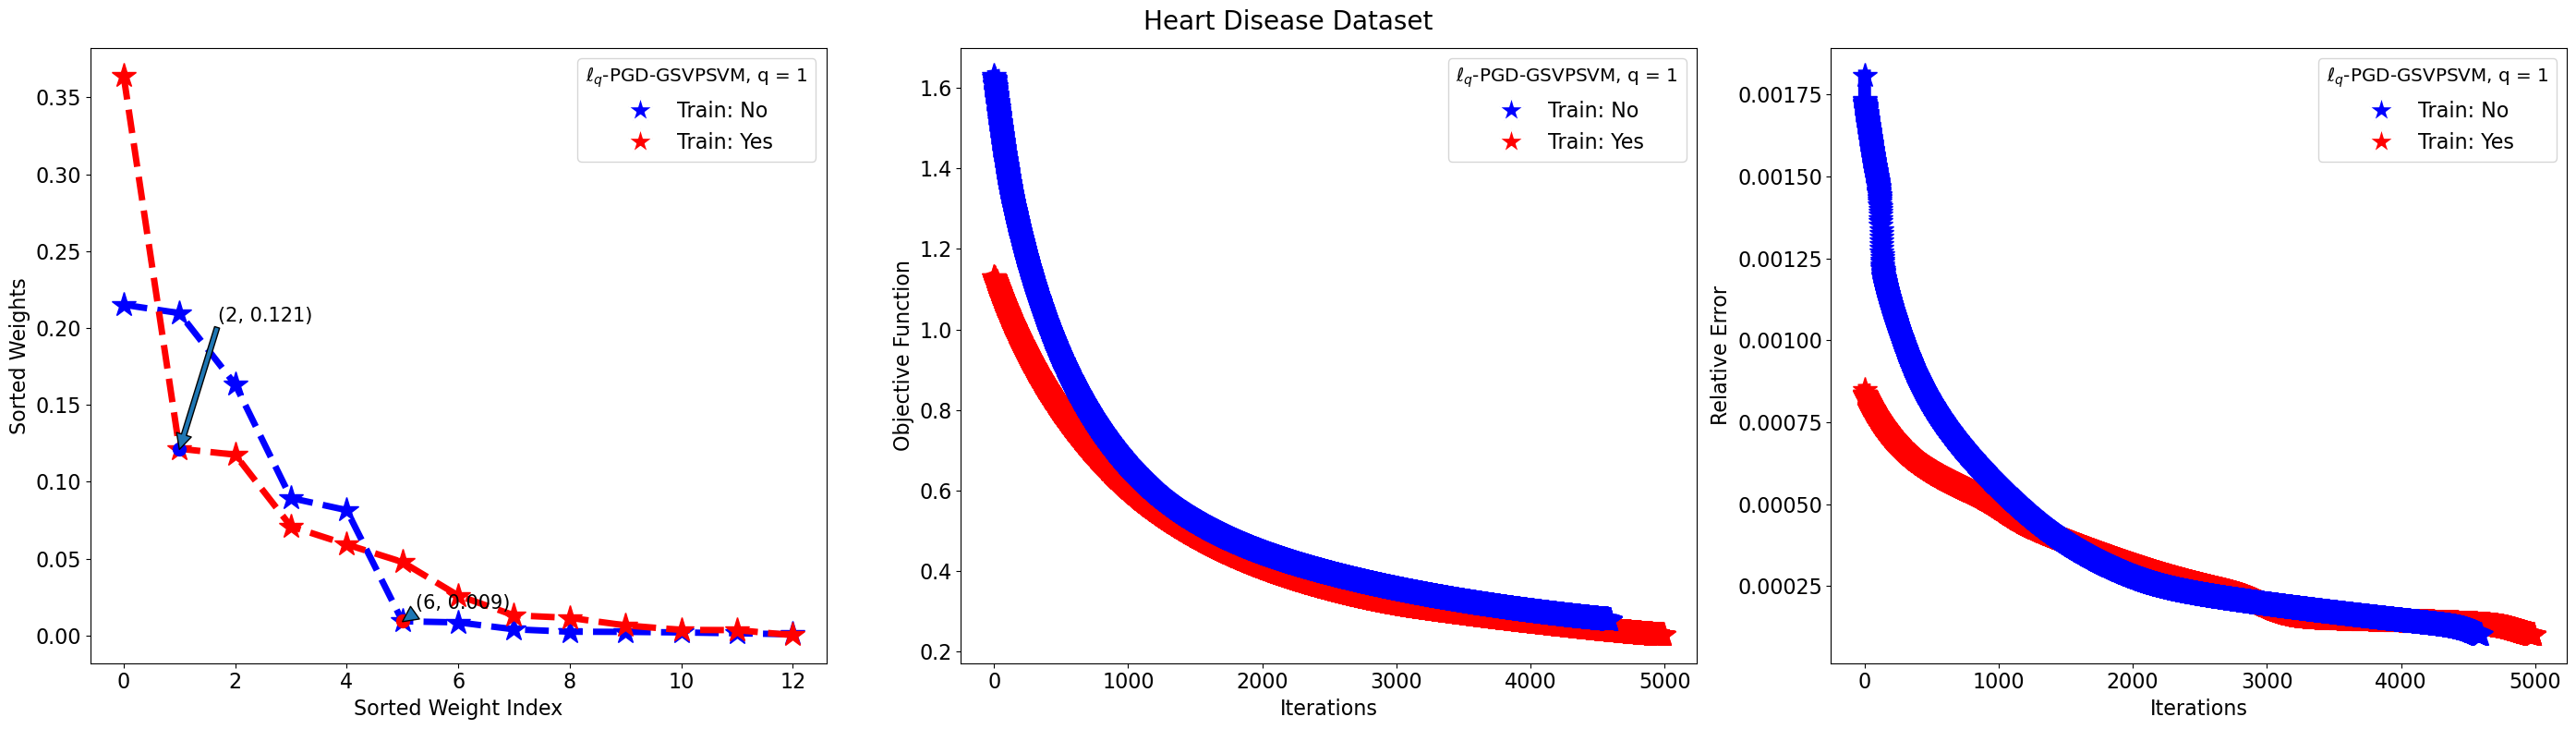

   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer    0.96853     0.989691  0.947368   0.981818   

   TN  FP  FN  TP  
0  96   1   3  54  


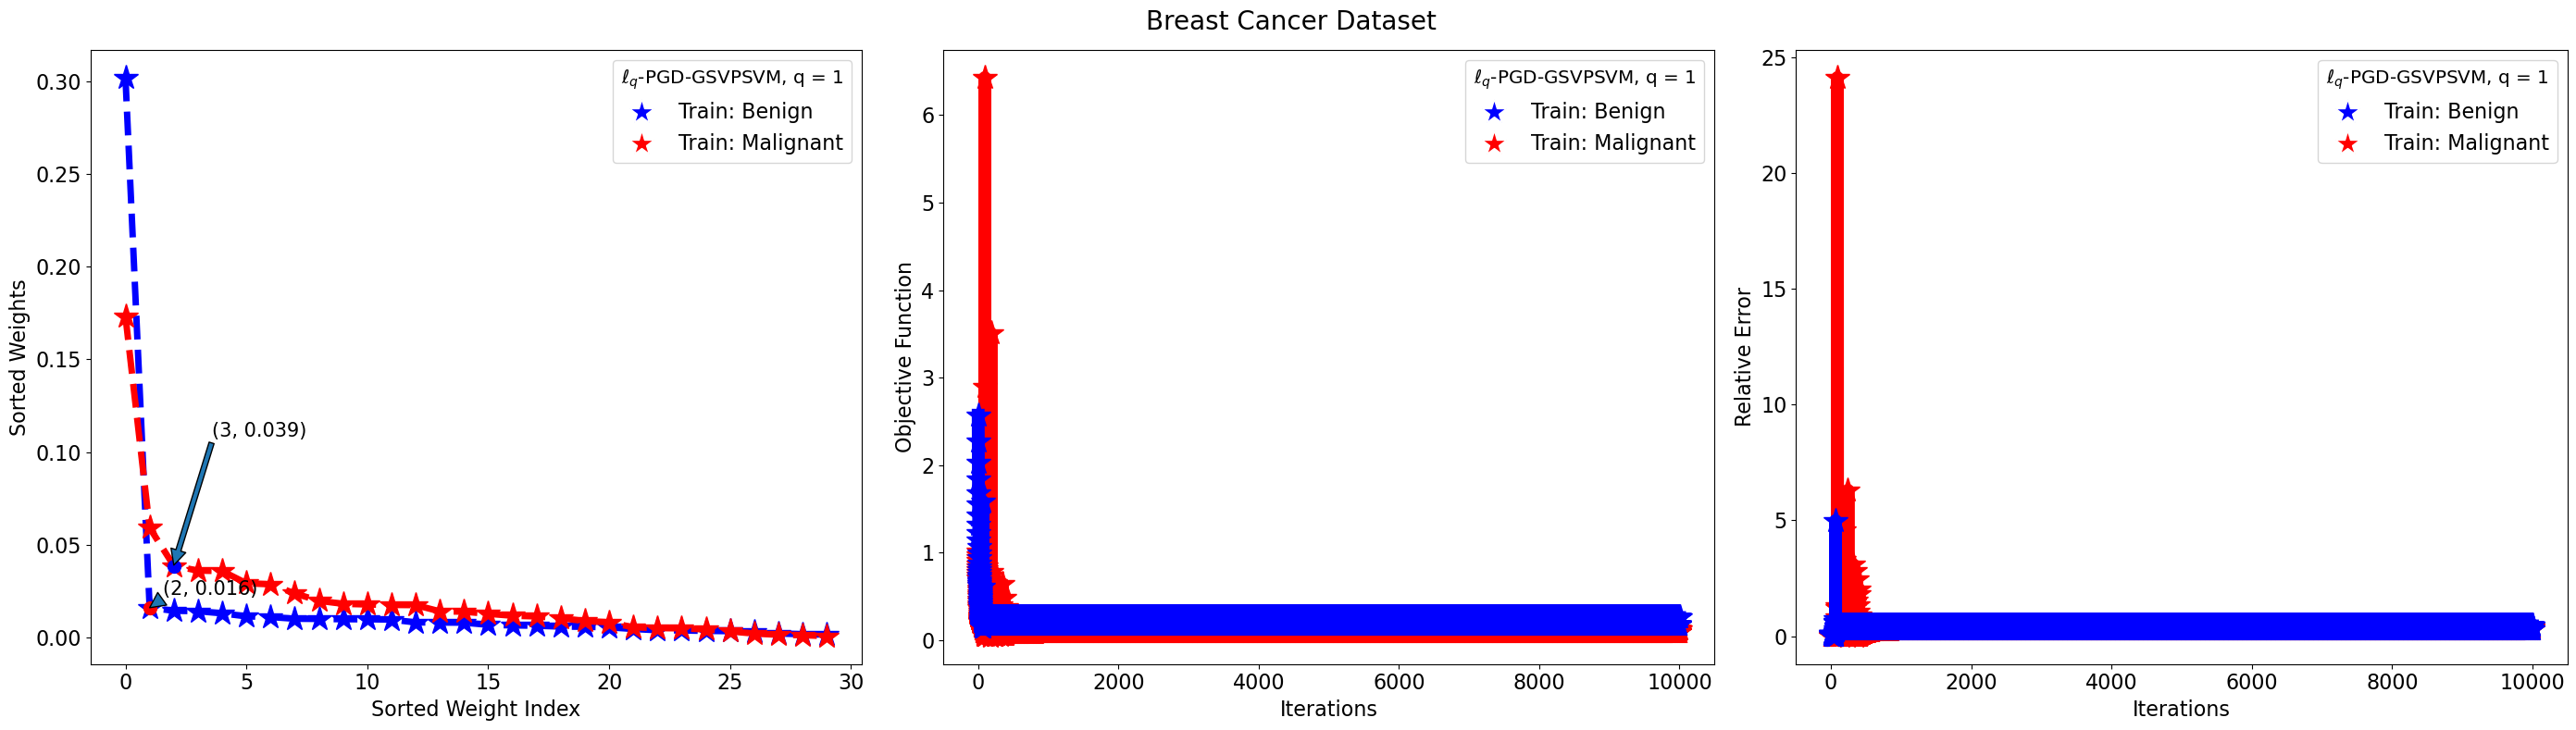

   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0   1062     152  Ovarian Cancer   0.832273         0.96  0.704545    0.96875   

   TN  FP  FN  TP  
0  24   1  13  31  


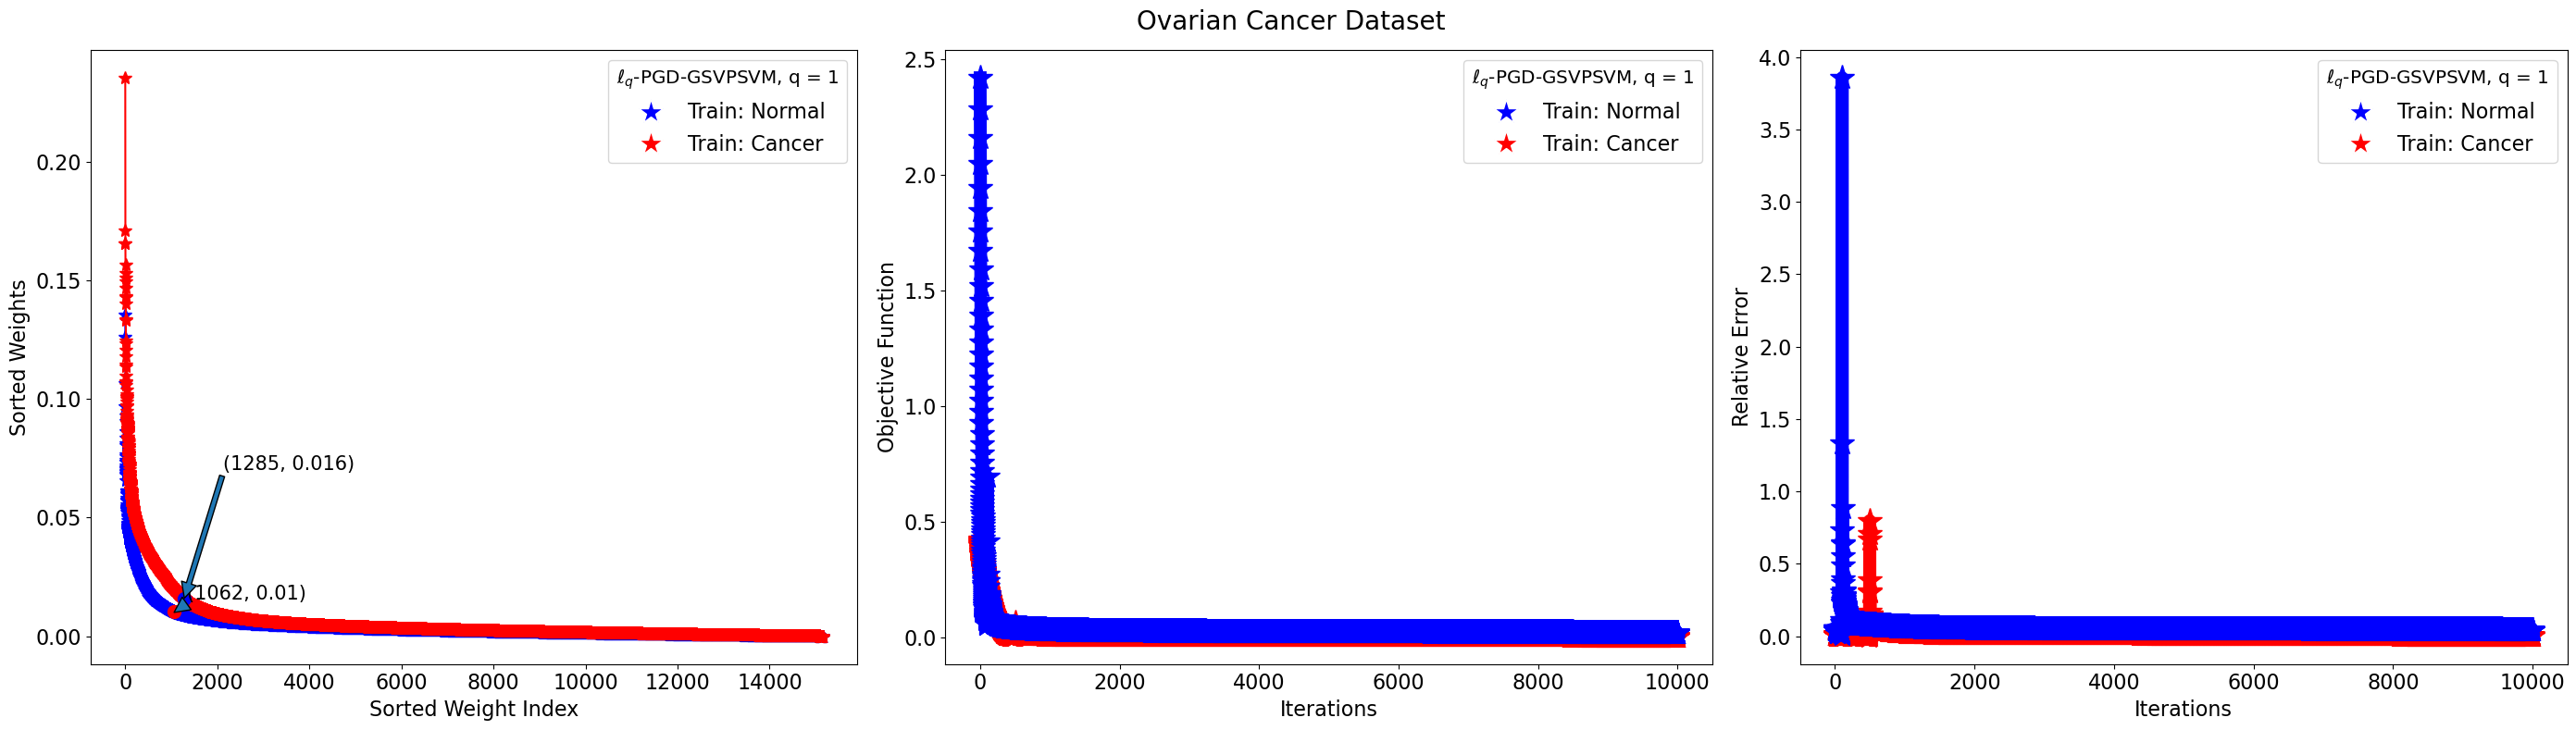

   Elbow  Common     Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0    132       0  Influenza I   0.926439     0.957143  0.895735   0.954545   

    TN  FP  FN   TP  
0  201   9  22  189  


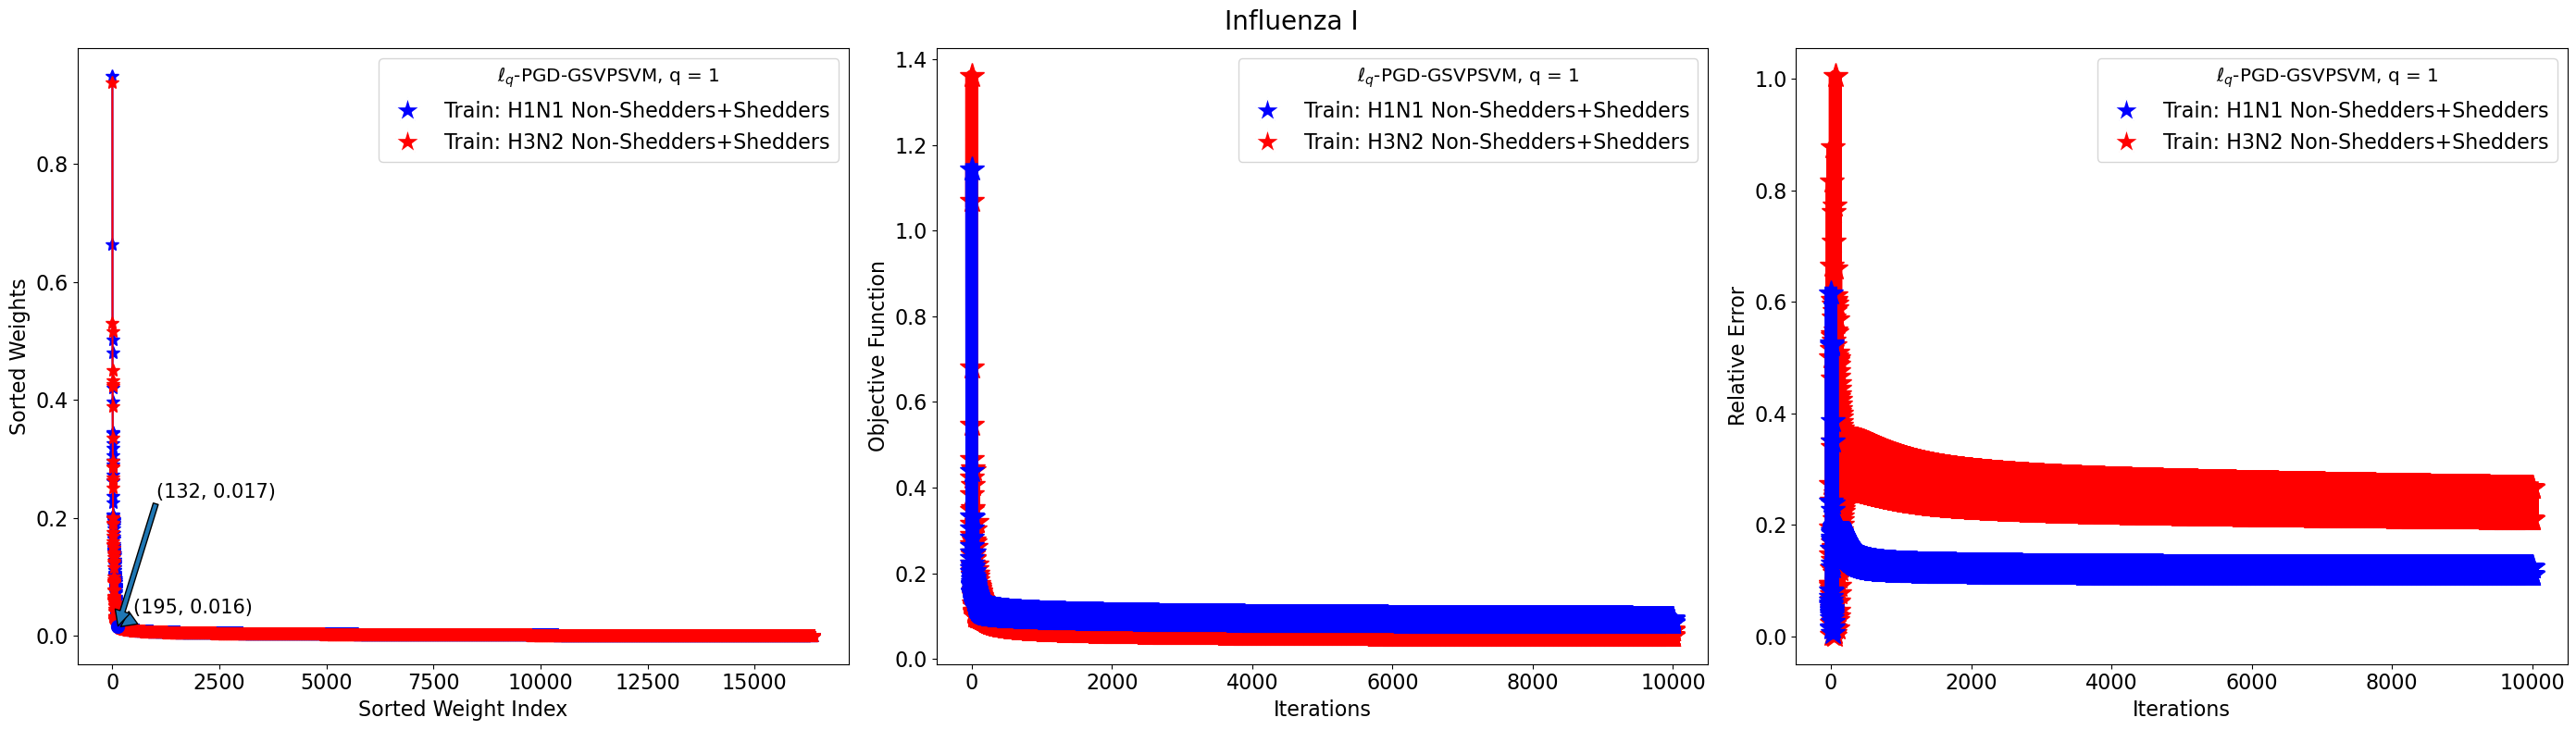

   Elbow  Common      Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0    318       2  Influenza II   0.802892     0.756044  0.849741   0.747153   

    TN   FP  FN   TP  
0  344  111  58  328  


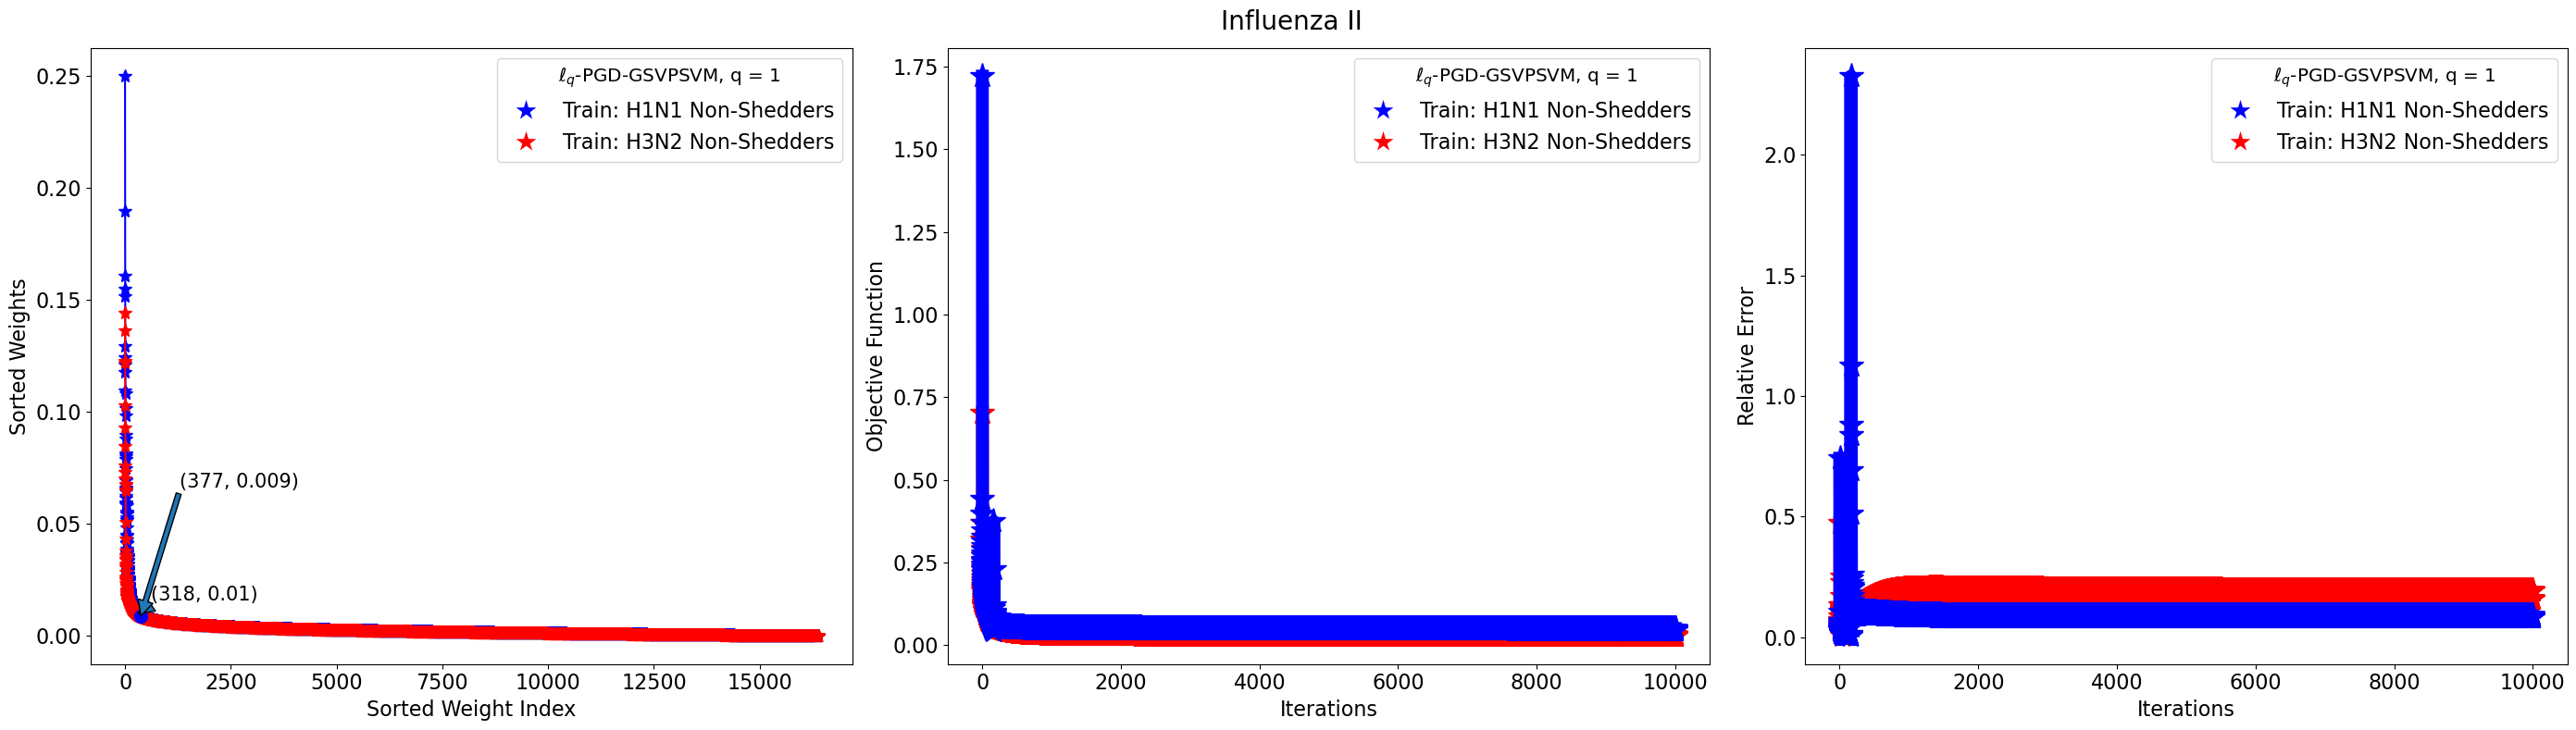

In [7]:
lambd = [(0.8889, 0.8889111111111111),(0.11120000000000001, 0.1112888888888889), (0.11120000000000001, 0.1112888888888889),
         (0.11120000000000001, 0.1112888888888889), (0.0001, 0.0002),(0.001, 0.002), (0.001, 0.002)]
step_size = [0.03162277660168379,0.00031622776601683794, 0.00031622776601683794, 0.03162277660168379, 0.03162277660168379,
             0.1, 0.03162277660168379]
datum = ['Alpaca Dataset','Diabetes Dataset', 'Heart Disease Dataset', 'Breast Cancer Dataset', 'Ovarian Cancer Dataset', 'Influenza I', 'Influenza II']
datum_list = ['Alpaca','diabetes', 'heart_cleveland', 'breast_cancer', 'Ovarian', 'Influenza_I', 'Influenza_II']
listing = [{'x':'control','y':'Infected'},{'x':'No','y':'Yes'},{'x':'No','y':'Yes'},{'x':'Benign','y':'Malignant'},{'x':'Normal','y':'Cancer'},{'x':'H1N1','y':'H3N2'},{'x':'H1N1','y':'H3N2'}]

for i in range(len(datum)):
    runs_list, _, _ = classification(datum[i], '$\ell_q$-PGD-GSVPSVM, q = 1', 'npsvm', 'lq1', lambd[i], 42, step_size[i], **{'q': 1, 'epsa': 1e-2})
    try:
        top_features(f'heading_{datum_list[i]}', runs_list,**listing[i])
    except FileNotFoundError:
        continue

Until now, all experiements are carried out on the training and validation sets. Now we apply the trained and validated models to sequestered datasets to examine their performance.

In [9]:
datum = ['Alpaca Dataset','Diabetes Dataset', 'Heart Disease Dataset', 'Breast Cancer Dataset', 'Ovarian Cancer Dataset','Influenza I', 'Influenza II']
data = ['Alpaca','diabetes','heart_cleveland','breast_cancer', 'Ovarian','Influenza_I','Influenza_II']
datra = ['Alpaca','Diabetes', 'Heart Disease', 'Breast Cancer', 'Ovarian Cancer','Influenza I', 'Influenza II']
test_model(datum, data, datra)

          Dataset  Bal. Acc.  Specificity    Recall  Precision  TN  FP  FN  TP
0          Alpaca   1.000000     1.000000  1.000000   1.000000   2   0   0   2
1        Diabetes   0.755556     0.733333  0.777778   0.636364  11   4   2   7
2   Heart Disease   1.000000     1.000000  1.000000   1.000000   5   0   0   5
3   Breast Cancer   1.000000     1.000000  1.000000   1.000000  11   0   0   7
4  Ovarian Cancer   1.000000     1.000000  1.000000   1.000000   3   0   0   5
5     Influenza I   0.812500     0.833333  0.791667   0.826087  20   4   5  19
6    Influenza II   0.753797     0.849057  0.658537   0.771429  45   8  14  27


Finally, we examine the solution method, i.e., $\ell_1$-PGD-GSVPSVM, associated with $\ell_1$ norm. This method is $\epsilon$-free, and will be applied it to the datasets above.   

   Elbow  Common         Dataset   Bal. Acc.  Specificity    Recall  \
0     23       0  Alpaca MERS-CoV   0.828571          0.8  0.857143   

   Precision  TN  FP  FN  TP  
0   0.857143   8   2   2  12  


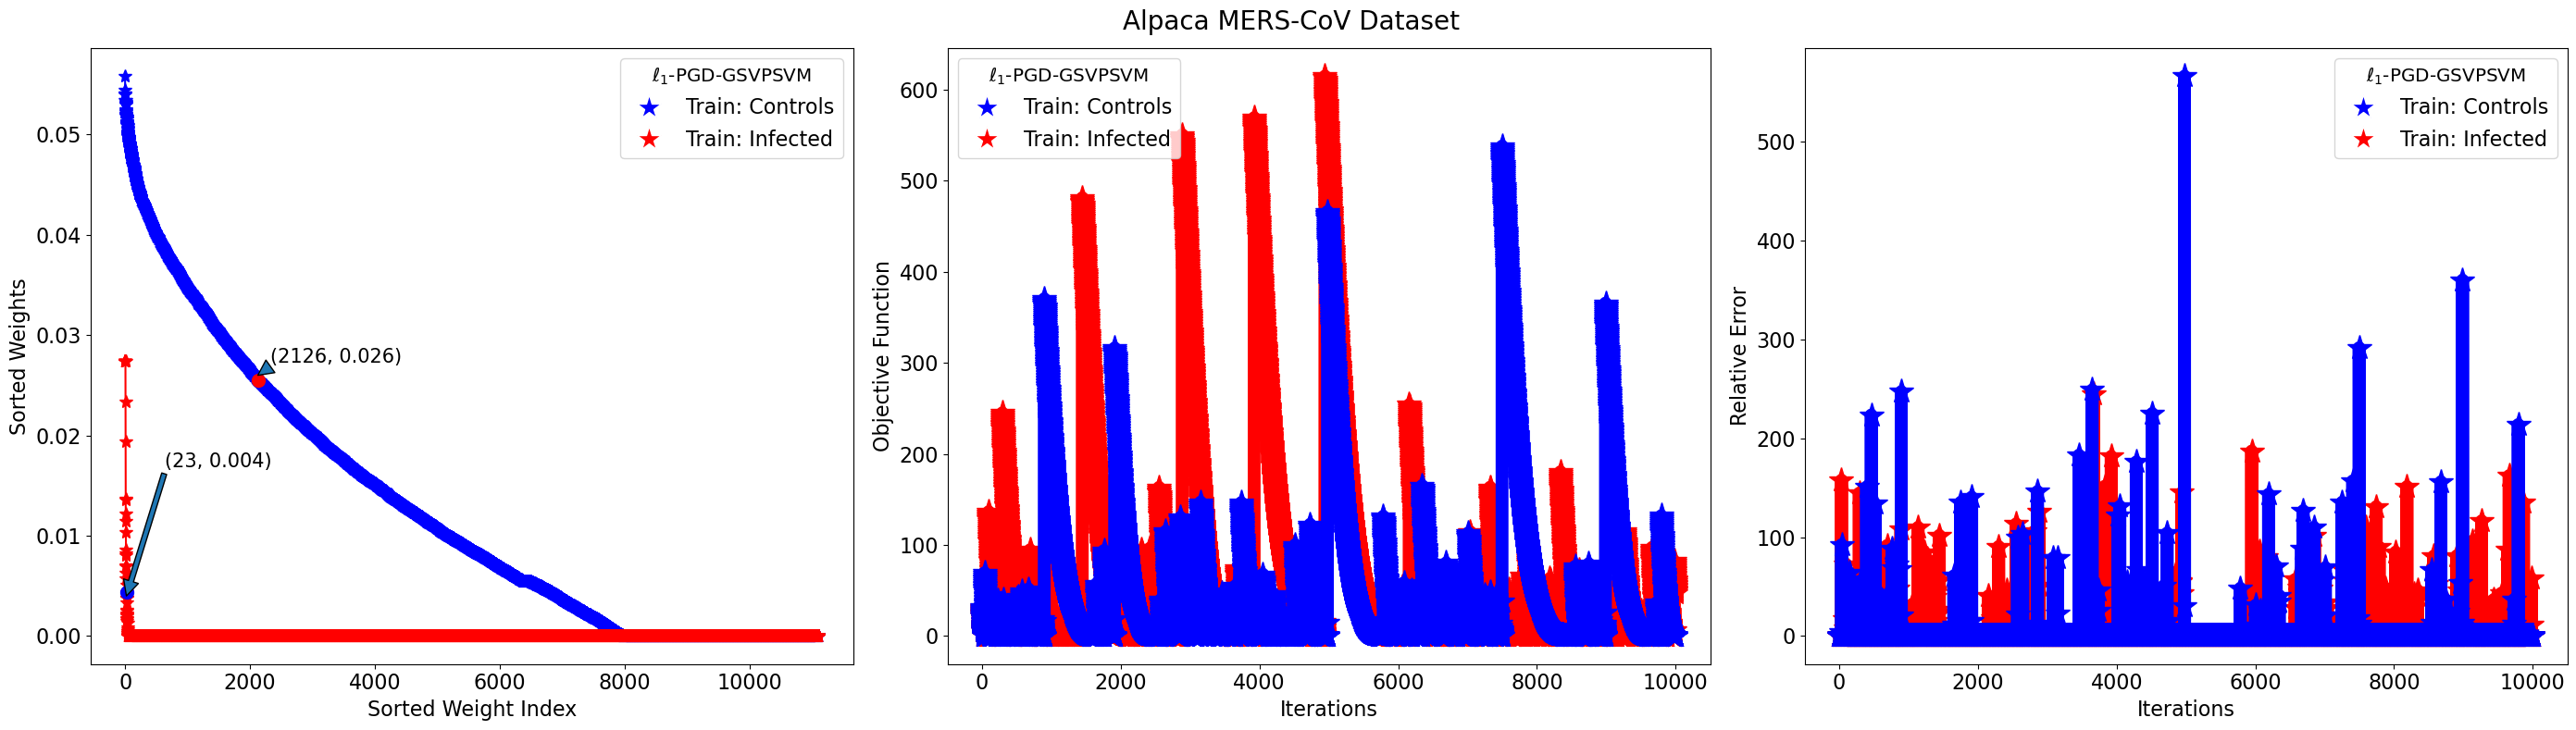

condition satisfied
condition satisfied
   Elbow  Common  Dataset   Bal. Acc.  Specificity    Recall  Precision   TN  \
0      2       2  Diabetes   0.749537     0.762963  0.736111   0.623529  103   

   FP  FN  TP  
0  32  19  53  


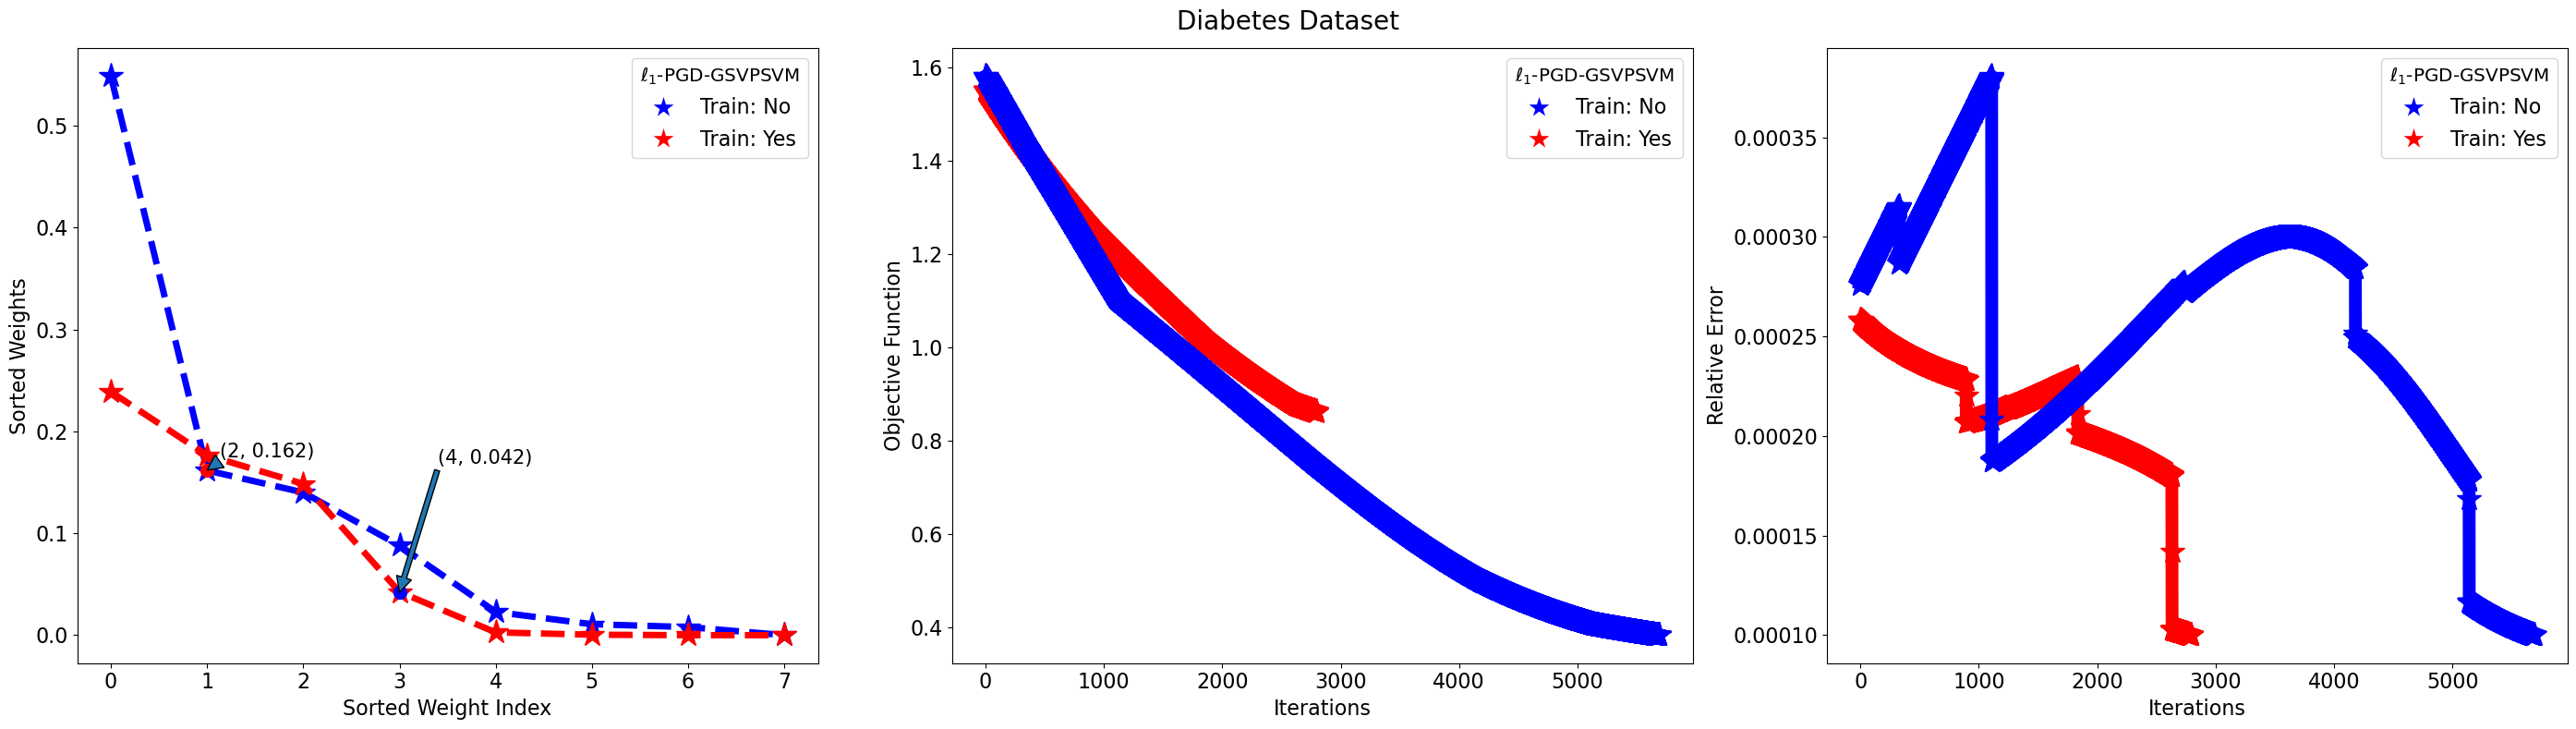

condition satisfied
condition satisfied
   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Heart Disease   0.812382     0.813953  0.810811   0.789474   

   TN  FP  FN  TP  
0  35   8   7  30  


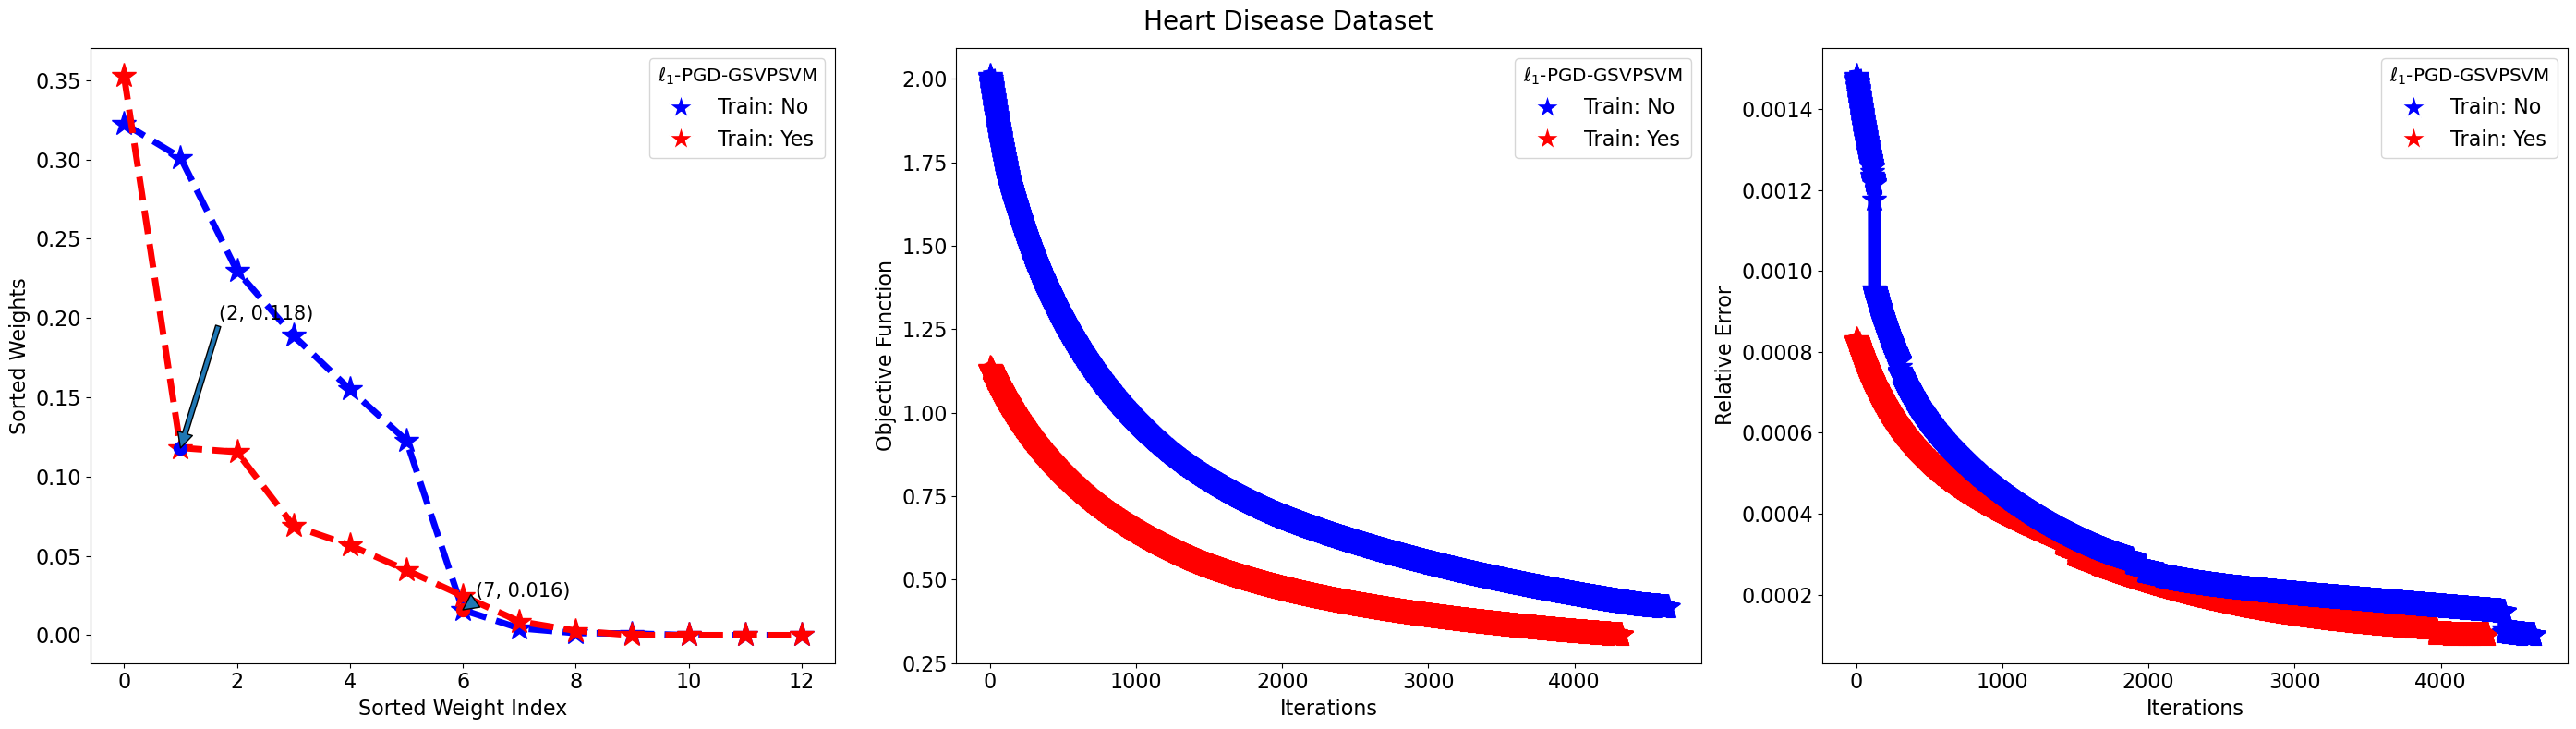

   Elbow  Common       Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0      2       0  Breast Cancer   0.959758     0.989691  0.929825   0.981481   

   TN  FP  FN  TP  
0  96   1   4  53  


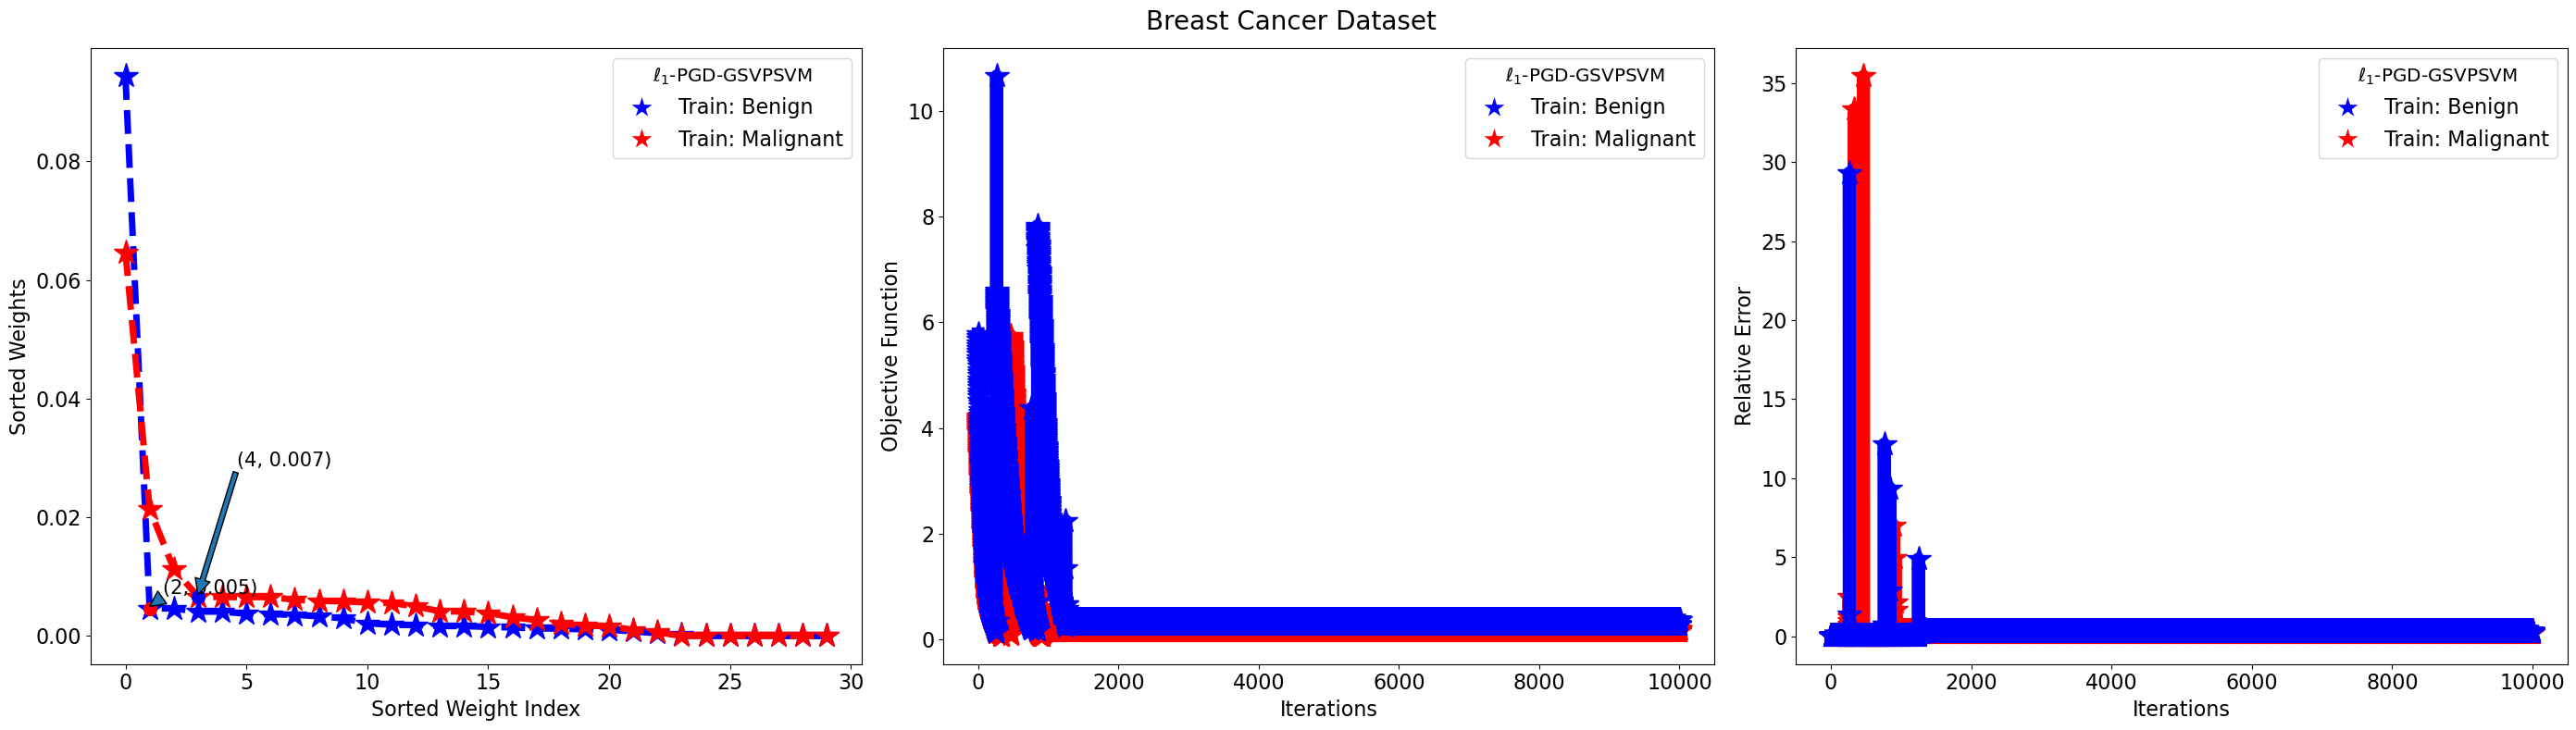

   Elbow  Common        Dataset   Bal. Acc.  Specificity    Recall  Precision  \
0     45       6  Ovarian Cancer   0.954545          1.0  0.909091        1.0   

   TN  FP  FN  TP  
0  25   0   4  40  


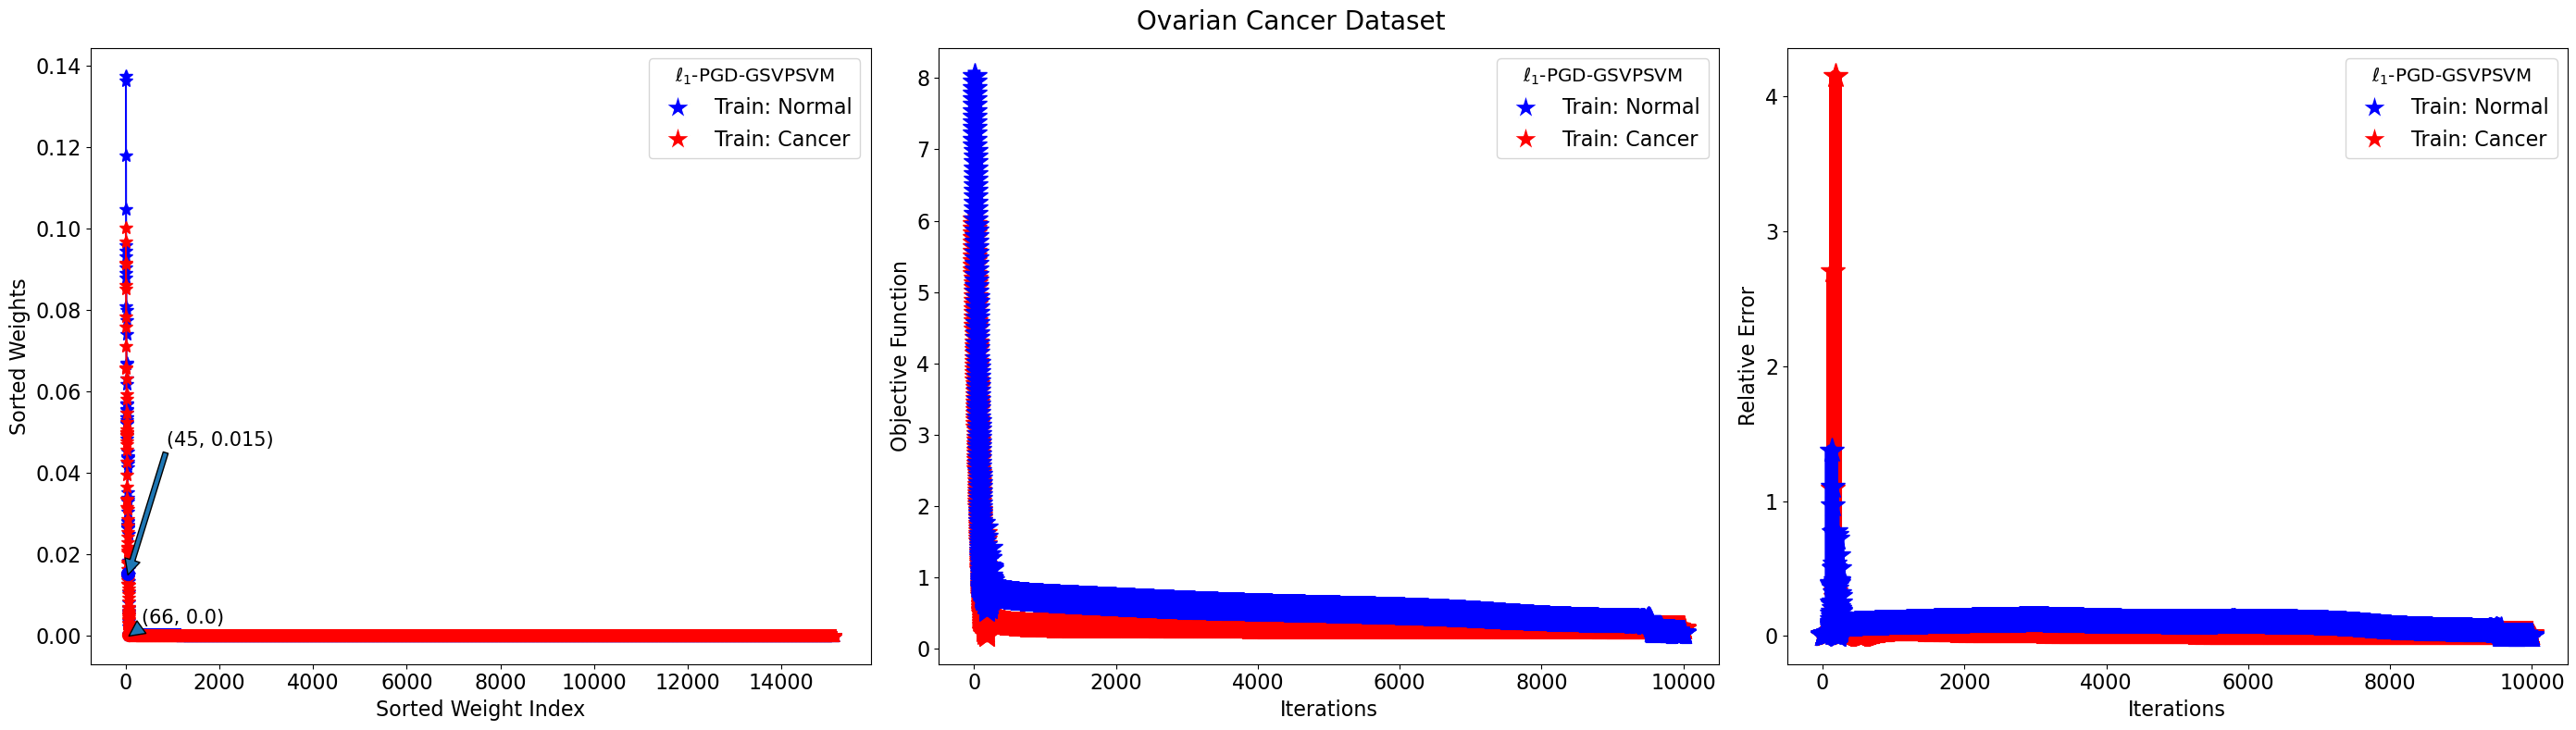

In [2]:
lambd = [(0.334, 0.33466666666666667),(0.21842105263157896, 0.2263157894736842), (0.112, 0.23111111111111113),(0.7894757894736841, 0.7894778947368422), (0.05272631578947369, 0.05282105263157895)
,(0.001, 0.002), (0.001, 0.002)]
step_size = [0.0031622776601683794,0.00031622776601683794, 0.00031622776601683794, 0.0031622776601683794, 0.0031622776601683794,0.1, 0.01]
datum = ['Alpaca Dataset','Diabetes Dataset', 'Heart Disease Dataset', 'Breast Cancer Dataset', 'Ovarian Cancer Dataset', 'Influenza I', 'Influenza II']
datum_list = ['Alpaca','diabetes', 'heart_cleveland', 'breast_cancer', 'Ovarian', 'Influenza_I', 'Influenza_II']
listing = [{'x':'control','y':'Infected'},{'x':'No','y':'Yes'},{'x':'No','y':'Yes'},{'x':'Benign','y':'Malignant'},{'x':'Normal','y':'Cancer'},{'x':'H1N1','y':'H3N2'},{'x':'H1N1','y':'H3N2'}]

for i in range(len(datum)):
    runs_list, _, _ = classification(datum[i], '$\ell_1$-PGD-GSVPSVM', 'npsvm', 'l1', lambd[i], 42, step_size[i], **{'q': 1, 'epsa': 1e-2})
    try:
        top_features(f'heading_{datum_list[i]}', runs_list,**listing[i])
    except FileNotFoundError:
        continue

Here, we examine the performance of the $\ell_1$-PGD-GSVPSVM on unseen datasets.

In [ ]:
datum = ['Alpaca Dataset','Diabetes Dataset', 'Heart Disease Dataset', 'Breast Cancer Dataset', 'Ovarian Cancer Dataset','Influenza I', 'Influenza II']
data = ['Alpaca','diabetes','heart_cleveland','breast_cancer', 'Ovarian','Influenza_I','Influenza_II']
datra = ['Alpaca','Diabetes', 'Heart Disease', 'Breast Cancer', 'Ovarian Cancer','Influenza I', 'Influenza II']
test_model(datum, data, datra)


          Dataset  Bal. Acc.  Specificity    Recall  Precision  TN  FP  FN  TP
0          Alpaca   1.000000     1.000000  1.000000   1.000000   2   0   0   2
1        Diabetes   0.755556     0.733333  0.777778   0.636364  11   4   2   7
2   Heart Disease   1.000000     1.000000  1.000000   1.000000   5   0   0   5
3   Breast Cancer   1.000000     1.000000  1.000000   1.000000  11   0   0   7
4  Ovarian Cancer   1.000000     1.000000  1.000000   1.000000   3   0   0   5
5     Influenza I   0.791667     0.833333  0.750000   0.818182  20   4   6  18
6    Influenza II   0.931201     0.886792  0.975610   0.869565  47   6   1  40
